# Project 2 - Ames Housing Data and Kaggle Challenge

Welcome to Project 2! It's time to start modeling.


### Business problem: 
Our real estate agency in Ames, Iowa, is working on a solution to help our in-house real estate agents in comparative market analysis to determine a fair and competitive offering price. With our model, we plan to support our in-house real estate agents in the following areas:

1) offer proprietary estimate of a property’s value based on the key features of the property

2) a useful reference point in assessing the fairness of a home’s price


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering & Additional Changes](#Feature-Engineering-&-Additional-changes)
- [Data Preparation](#Data-Peparation)
- [Modelling](#Modelling)
- [Improving Model](#Improving-Model)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


###  Datasets available
There are 3 datasets included in the data folder for this project. 
* [`test`](./datasets/test.csv): test data
* [`train`](./datasets/train.csv): train data
* [`sample_sub_reg`](./datasets/sample_sub_reg.csv): sample data for kaggle submission

In [1939]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# 1.  Data Import and Cleaning
__________________________________________________________________________________________________________________________

In [1940]:
#Import CSV 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [1941]:
# test data rows and column numbers are not matching the training data
print("Train data shape", train_data.shape)
print("Test data shape", test_data.shape)

Train data shape (2051, 81)
Test data shape (878, 80)


In [1942]:
#view the training data
train_data.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [1943]:
#view the test data
test_data.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [1944]:
#Saleprice is in training data, but not in the test data
[col for col in train_data.columns if col not in test_data.columns]

['SalePrice']

In [1945]:
#View the column names in the training data
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

# 1.2 Evaluating null values 

While there are many null values in this data, the null values could mean that the data is not available instead of assuming that the data was inputted incorrectly. Since there are many null values in certain columns, it is not reasonable to drop all columns. 

For example: Bsmt Qual (Ordinal): Evaluates the height of the basement

Not all houses will include basements. In this situation, we should keep this data and input 'none' instead. 

In [1946]:
#Check for any columns with null values
nullvalues = train_data.isnull().sum()
print(nullvalues[nullvalues > 0])

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64


There are 22 rows with missing values in Mas Vnr Type and Mas Vnr Area and the 22 missing values match for both columns.
For Mas Vnr Type and Mas Vnr Area with null values, we can assume that these houses do not have Masonry veneer type.
Hence, the type and area is not available. As such, these values will be inputted as 0 instead of removing the null values. 

In [1947]:
#checking to see if the null values for Mas Vnr Type and Mas Vnr Area correspond with each other. 
train_data[train_data[['Mas Vnr Area','Mas Vnr Type']].isnull().any(axis=1)][[ 'Mas Vnr Area', 'Mas Vnr Type']]


Mas Vnr Area Mas Vnr Type
22             NaN          NaN
41             NaN          NaN
86             NaN          NaN
212            NaN          NaN
276            NaN          NaN
338            NaN          NaN
431            NaN          NaN
451            NaN          NaN
591            NaN          NaN
844            NaN          NaN
913            NaN          NaN
939            NaN          NaN
1025           NaN          NaN
1244           NaN          NaN
1306           NaN          NaN
1430           NaN          NaN
1434           NaN          NaN
1606           NaN          NaN
1699           NaN          NaN
1815           NaN          NaN
1820           NaN          NaN
1941           NaN          NaN

In [1948]:
#checking to see if the null values in garage type and garage yr built and garage finish correspond with each other 
train_data[train_data[['Garage Type','Garage Yr Blt', 'Garage Finish']].isnull().any(axis=1)]\
[[ 'Garage Type', 'Garage Yr Blt', 'Garage Finish']]

Garage Type  Garage Yr Blt Garage Finish
28           NaN            NaN           NaN
53           NaN            NaN           NaN
65           NaN            NaN           NaN
79           NaN            NaN           NaN
101          NaN            NaN           NaN
...          ...            ...           ...
1991         NaN            NaN           NaN
2010         NaN            NaN           NaN
2027         NaN            NaN           NaN
2039         NaN            NaN           NaN
2042         NaN            NaN           NaN

[114 rows x 3 columns]

In [1949]:
#e.g. BSMT Qual is missingg 55 values.
#through value counts,there are no counts for the NA values but NA is a category in the variable description
#With the assumption that the null counts could have been NA, the null counts will be readjusted as None instead.
train_data['Bsmt Qual'].value_counts()


TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [1950]:
train_data['Bsmt Qual'].isnull().sum()

55

In [1951]:
#the null values for BsmtFin SF 1 is only 1 count. 
# the null values will be removed 
train_data['BsmtFin SF 1'].isnull().sum()

1

In [1952]:
#e.g.Fence is missing 1651 values
#through value counts,there are no counts for the NA values but NA is a category in the variable description
#With the assumption that the null counts could have been NA, the null counts will be readjusted as None instead.
train_data['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

# 1.3 Decisions on the columns with Null Values 
After looking at each individual column and evaluating the null values - the following below are the decisions I have made for each column.

Rows with one or 2 null values, I will be removing them.
Rows with 

| features | null_values | decision |
| --- | --- | --- |
| Lot_Frontage| 330|Drop column|
|Alley | 1911| Input 'None'|
|Mas Vnr Type | 22 | Input 'None'|
|Mas Vnr Area| 22| Input 0'|
|Bsmt Qual	|55|Input 'None'|
|Bsmt Cond|55|Input 'None'|
|Bsmt Exposure|58|Input 'None'|
|BsmtFin Type 1| 55| Input 'None'|
|BsmtFin SF 1| 1 | Remove row|
|BsmtFin Type 2|56| Input 'None'|
|BsmtFin SF 2|1| Remove row|
|Bsmt Unf SF|1| Remove row|
|Total Bsmt SF|1| Remove row|
|Bsmt Full Bath|2|Remove row|
|Bsmt Half Bath|2|Remove row|
|Fireplace Qu|1000|Input 'None'|
|Garage Type|113|Input 'None'|
|Garage Yr Blt|114|Input 'None'|
|Garage Finish|114|Input 'None'|
|Garage Cars|1| Remove row|
|Garage Area|1| Remove row|
|Garage Qual|114|Input 'None'|
|Garage Cond|114|Input 'None'|
|Pool QC|2042|Input 'None'|
|Fence|1651|Input 'None'|
|Misc Feature|1986|Input 'None'|


In [1953]:
drop_col = ['Lot Frontage']
remove_row = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', \
              'Garage Cars', 'Garage Area']
impute_0 = ['Mas Vnr Area'] 
impute_na = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', \
              'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC',\
             'Fence', 'Misc Feature']

In [1954]:
#drop columns 
[train_data.drop(col, axis=1, inplace=True) for col in drop_col]

#drop rows
train_data.dropna(subset=remove_row, inplace=True)

#Input 0 
train_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[train_data[col].fillna( 'None', inplace = True) for col in impute_na]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# 2 Exploratory Data Analysis
# 2.1 Identifying Categorical Features

In [1955]:
#identify categorical columns
#Filtering out features with dtypes that are 'object'

object_cols = train_data.loc[:, train_data.dtypes == 'O']
object_cols

MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0           RL   Pave  None       IR1          Lvl    AllPub    CulDSac   
1           RL   Pave  None       IR1          Lvl    AllPub    CulDSac   
2           RL   Pave  None       Reg          Lvl    AllPub     Inside   
3           RL   Pave  None       Reg          Lvl    AllPub     Inside   
4           RL   Pave  None       IR1          Lvl    AllPub     Inside   
...        ...    ...   ...       ...          ...       ...        ...   
2046        RL   Pave  None       IR1          HLS    AllPub     Inside   
2047        RL   Pave  None       IR1          Lvl    AllPub     Inside   
2048        RL   Pave  None       Reg          Bnk    AllPub     Inside   
2049        RL   Pave  None       Reg          Lvl    AllPub     Corner   
2050        RL   Pave  None       Reg          Lvl    AllPub     Inside   

     Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  \
0           Gtl       Sawyer        RRAe        Norm      1Fam      2Story   
1           Gtl      SawyerW        Norm        Norm      1Fam      2Story   
2           Gtl        NAmes        Norm        Norm      1Fam      1Story   
3           Gtl       Timber        Norm        Norm      1Fam      2Story   
4           Gtl      SawyerW        Norm        Norm      1Fam      1.5Fin   
...         ...          ...         ...         ...       ...         ...   
2046        Gtl       Timber        Norm        Norm      1Fam      1Story   
2047        Gtl      Edwards        Norm        Norm      1Fam      1Story   
2048        Gtl      Crawfor        Norm        Norm      1Fam      1.5Fin   
2049        Gtl        NAmes        Norm        Norm      1Fam      1Story   
2050        Gtl      Gilbert        Norm        Norm      1Fam      2Story   

     Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual  \
0         Gable   CompShg      HdBoard      Plywood      BrkFace         Gd   
1         Gable   CompShg      VinylSd      VinylSd      BrkFace         Gd   
2         Gable   CompShg      VinylSd      VinylSd         None         TA   
3         Gable   CompShg      VinylSd      VinylSd         None         TA   
4         Gable   CompShg      Wd Sdng      Plywood         None         TA   
...         ...       ...          ...          ...          ...        ...   
2046      Gable   CompShg      VinylSd      VinylSd         None         Gd   
2047      Gable   CompShg      VinylSd      VinylSd         None         TA   
2048      Gable   CompShg      BrkFace        Stone         None         TA   
2049      Gable   CompShg      Plywood      Plywood         None         TA   
2050      Gable   CompShg      VinylSd      VinylSd         None         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
0            TA     CBlock        TA        TA            No            GLQ   
1            TA      PConc        Gd        TA            No            GLQ   
2            Gd     CBlock        TA        TA            No            GLQ   
3            TA      PConc        Gd        TA            No            Unf   
4            TA      PConc        Fa        Gd            No            Unf   
...         ...        ...       ...       ...           ...            ...   
2046         TA      PConc        Gd        TA            Av            GLQ   
2047         TA     CBlock        TA        TA            No            BLQ   
2048         TA     BrkTil        TA        TA            No            Unf   
2049         TA     CBlock        TA        TA            No            Rec   
2050         TA      PConc        TA        TA            No            Unf   

     BsmtFin Type 2 Heating Heating QC Central Air Electrical Kitchen Qual  \
0               Unf    GasA         Ex           Y      SBrkr           Gd   
1               Unf    GasA         Ex           Y      SBrkr           Gd   
2               Unf    GasA        

In [1956]:
#View the columns names for object_cols
object_cols.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Sale Type'],
      dtype='object')

# 2.2 Columns which are not features of a house will be dropped. 

### 1) Sale Condition


In [1957]:
#Sale Condition is not a feature of a house and will be dropped 
object_cols.drop(['Sale Type'], axis = 1, inplace = True)

In [1958]:
#Check to see if Sale Type is still in object_cols
object_cols.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

# 2.3 Plotting of visualisations for categorical features

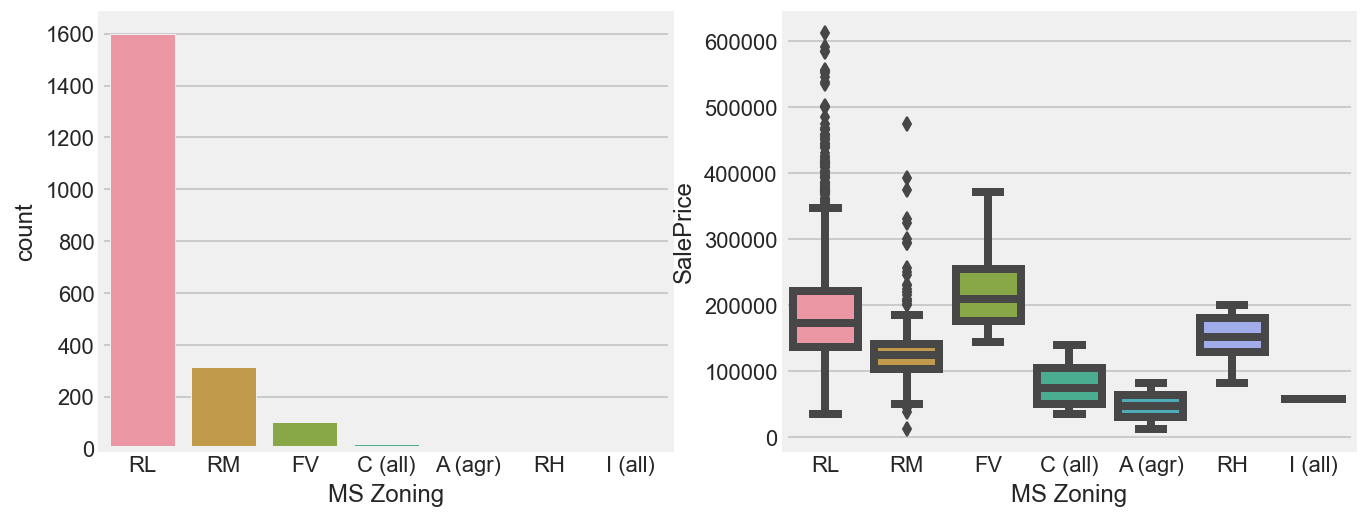

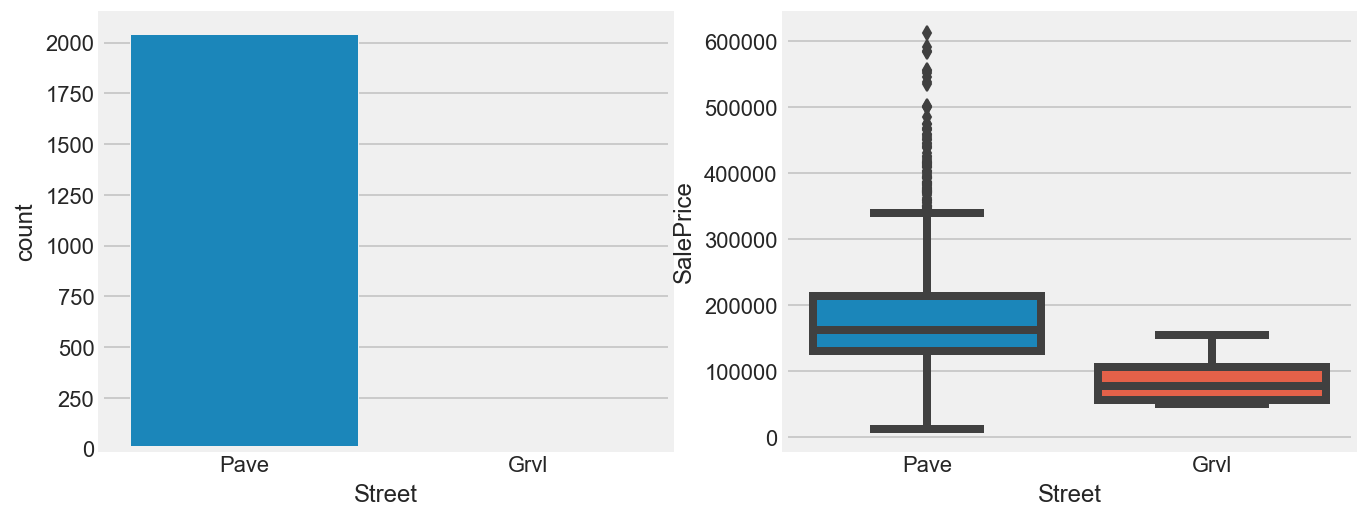

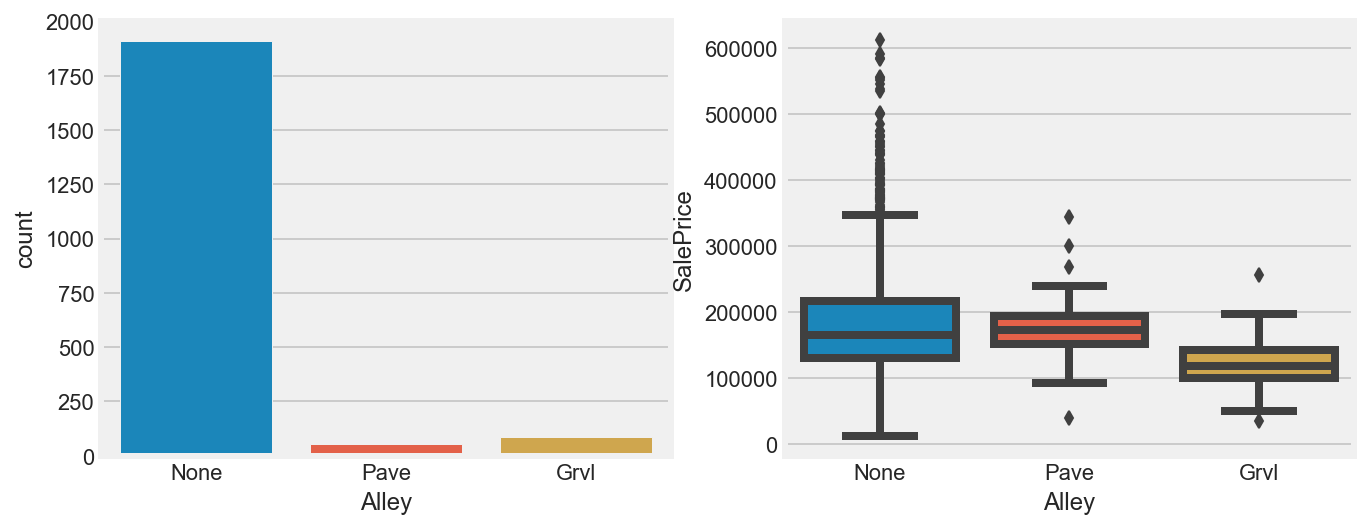

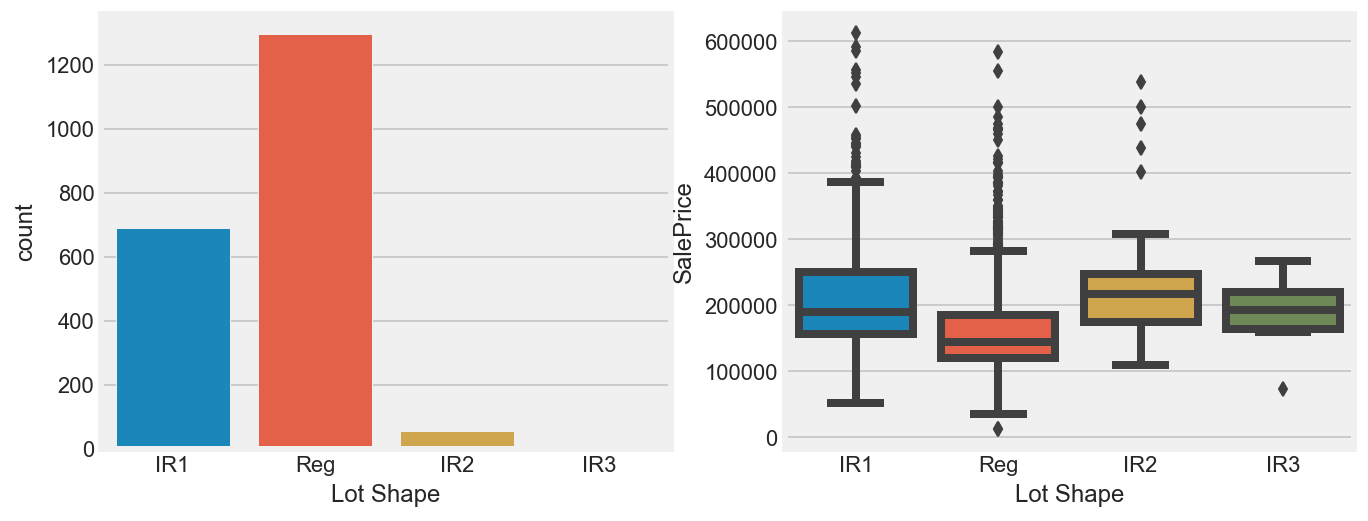

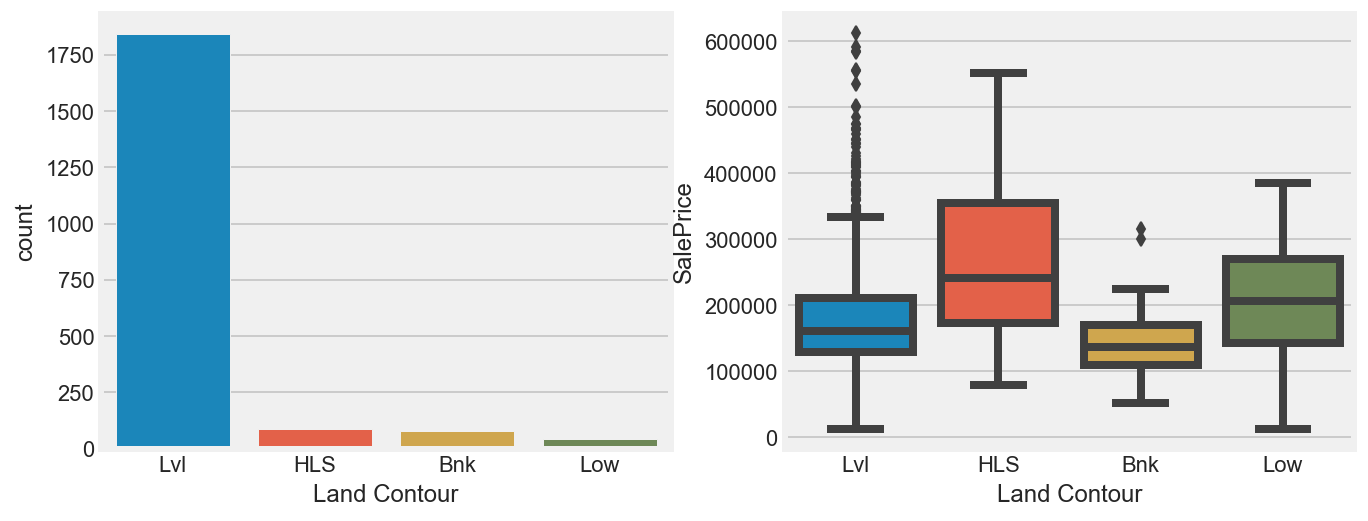

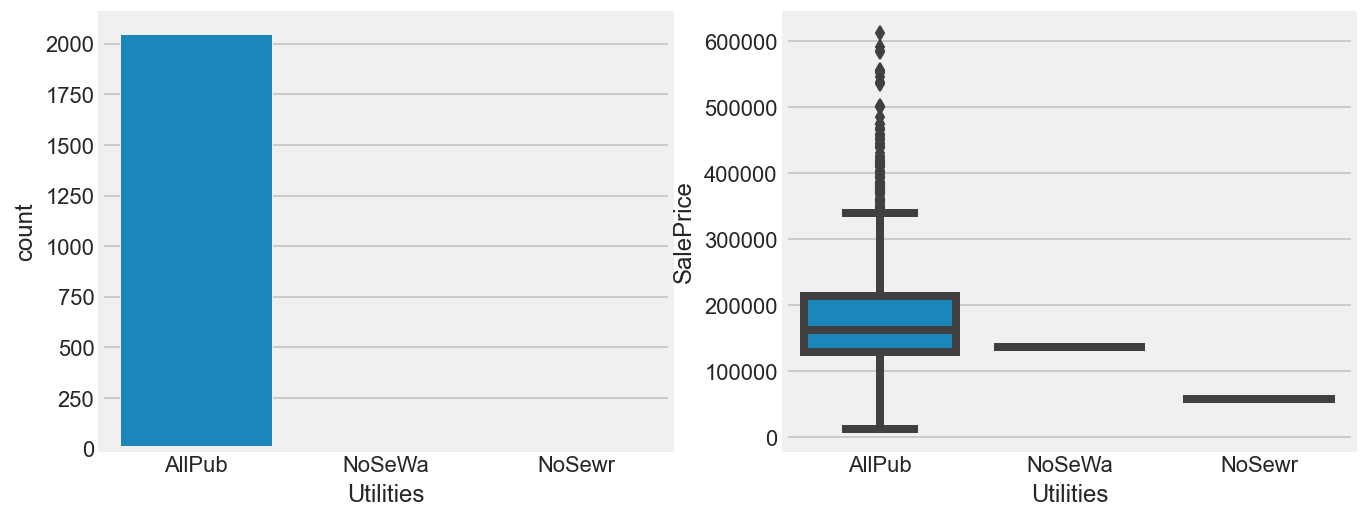

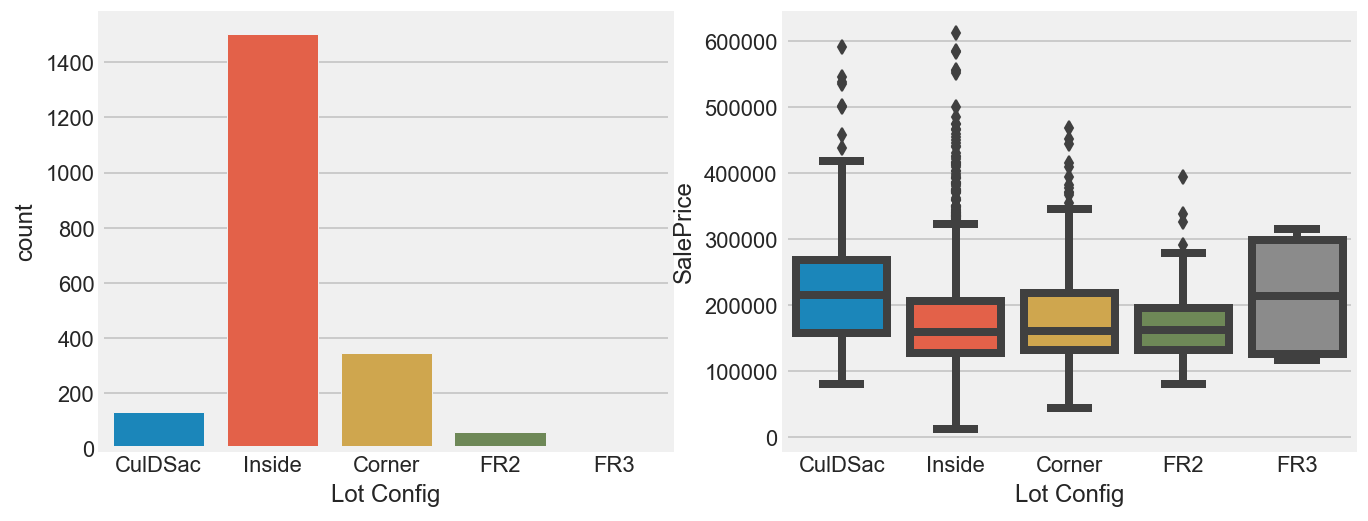

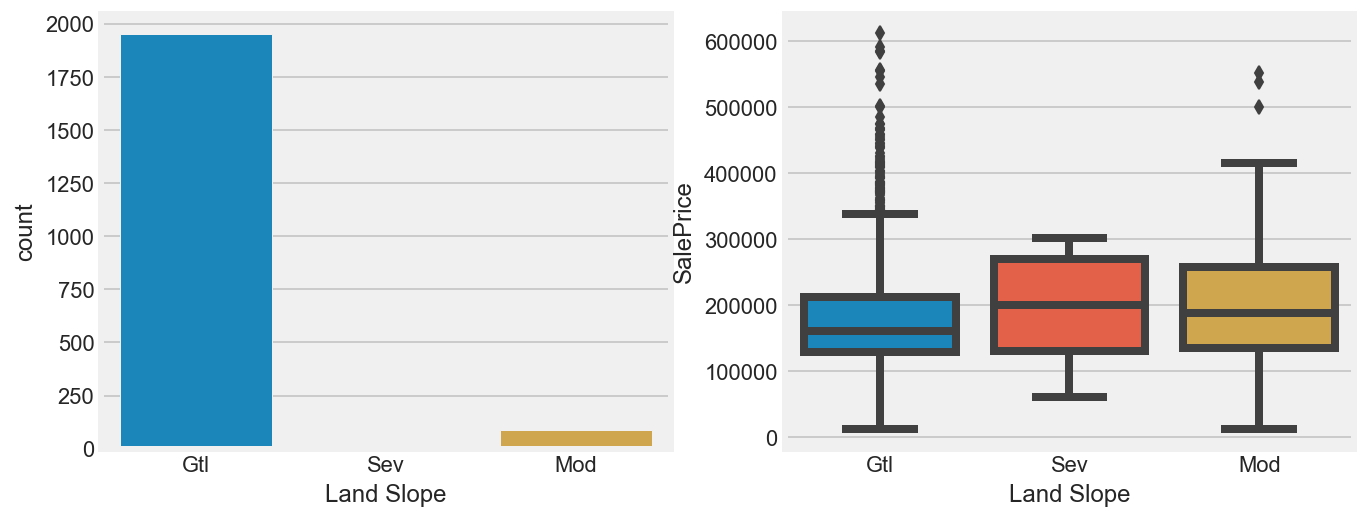

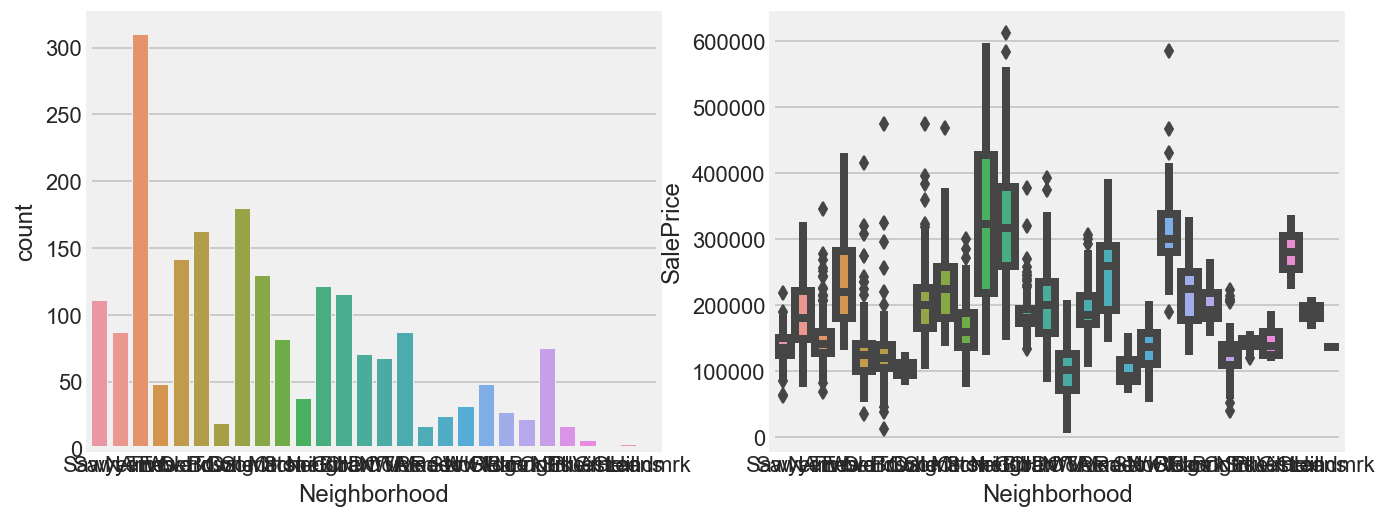

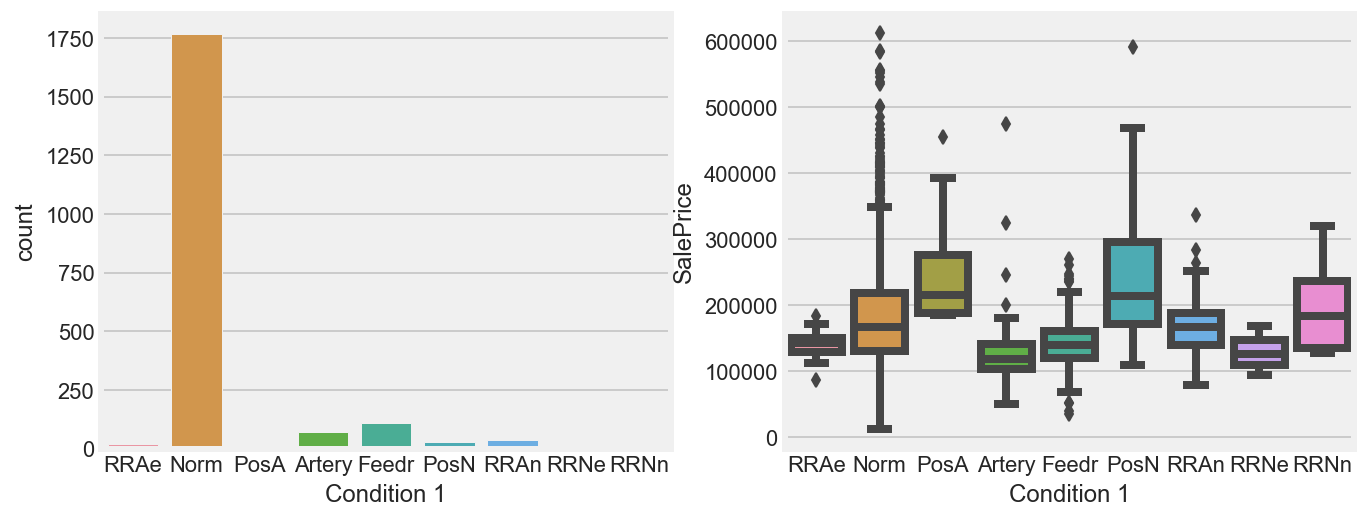

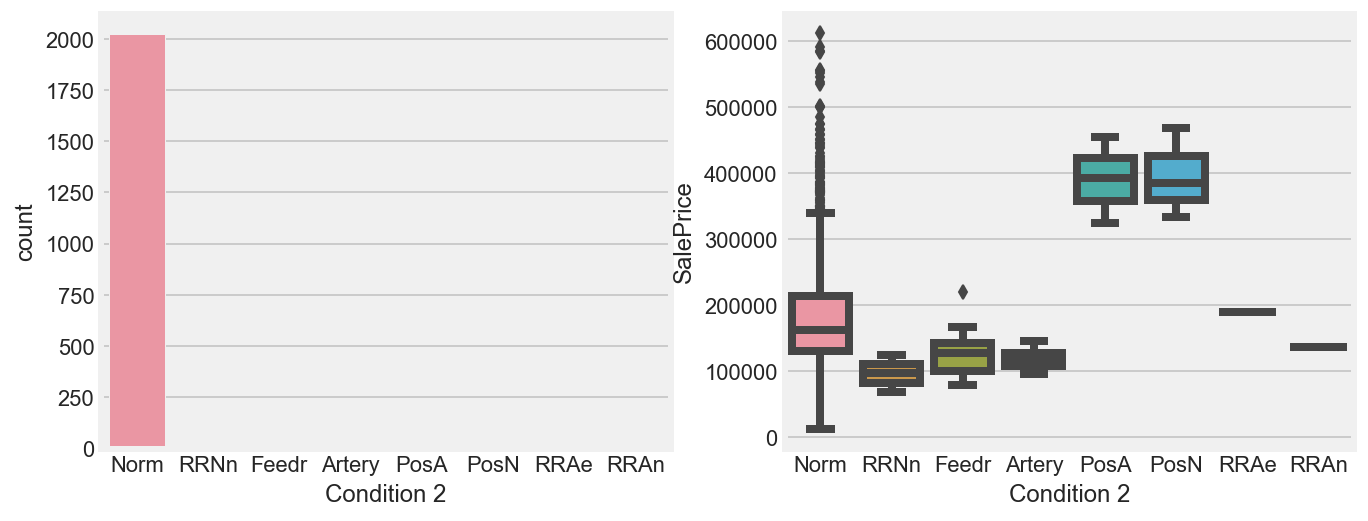

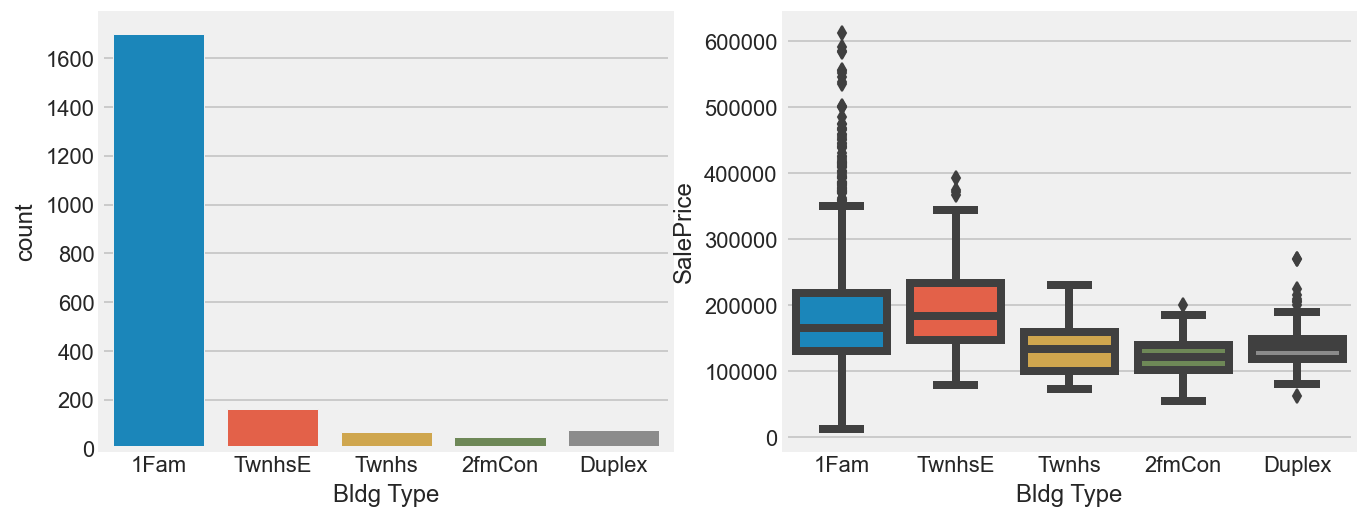

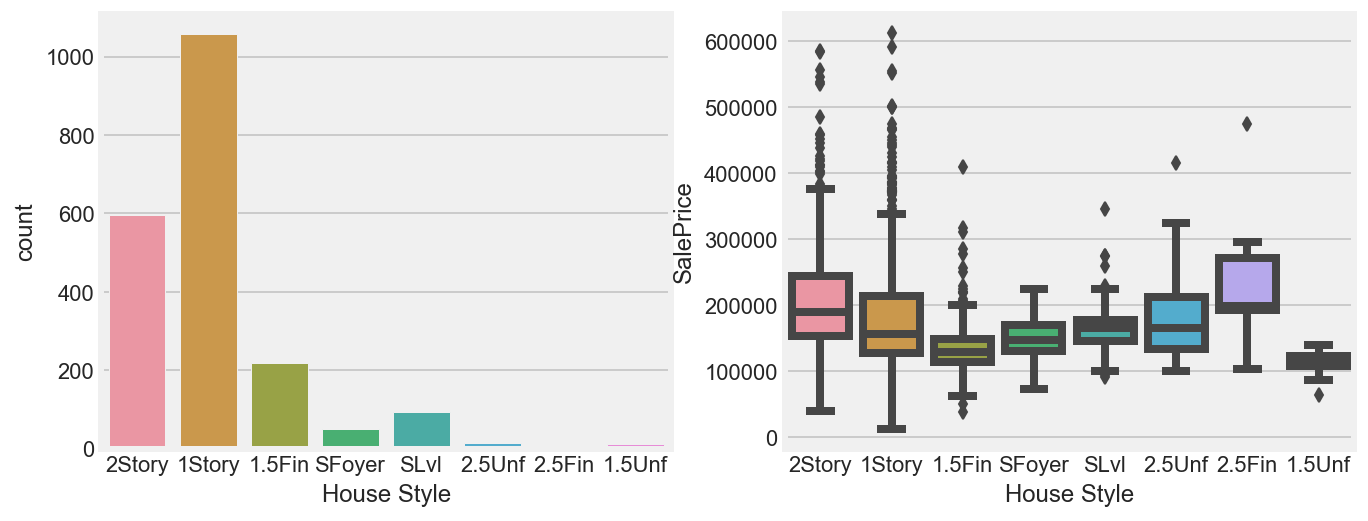

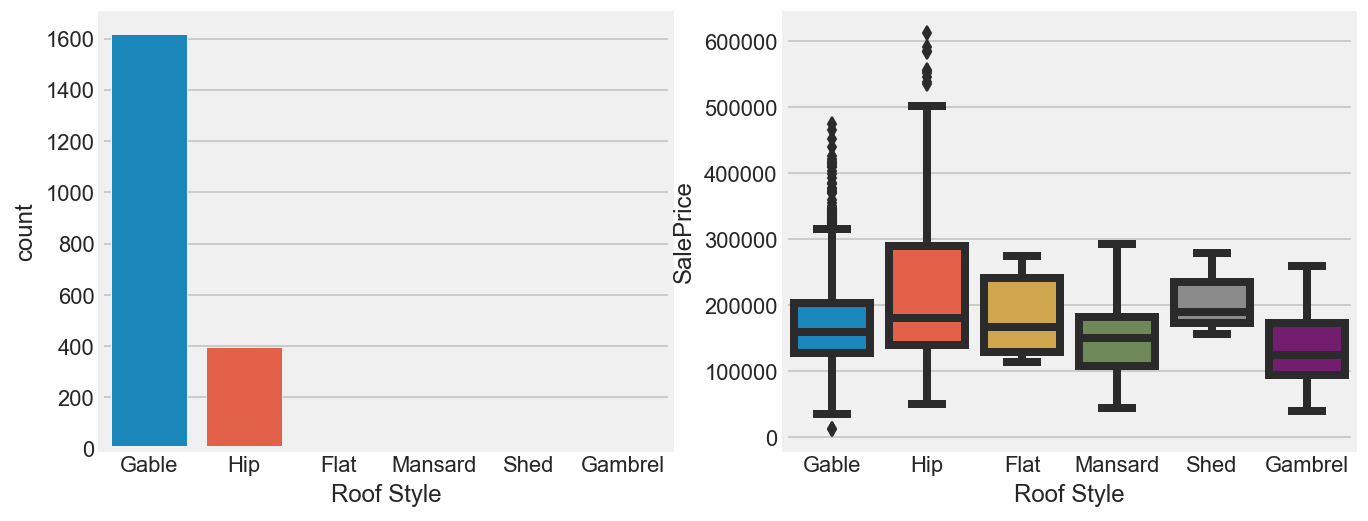

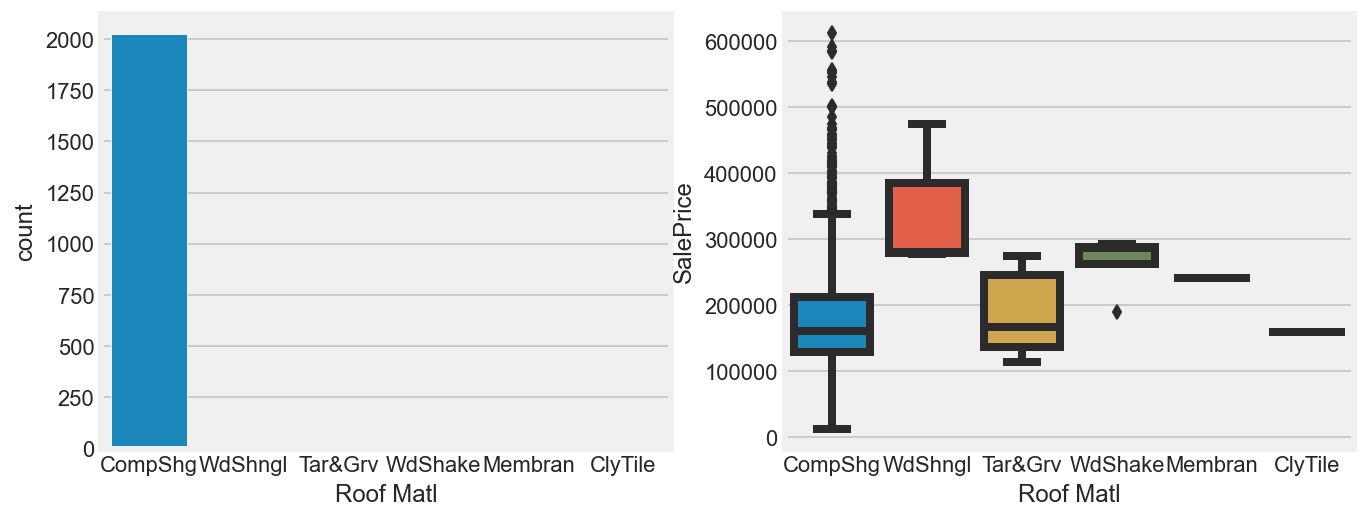

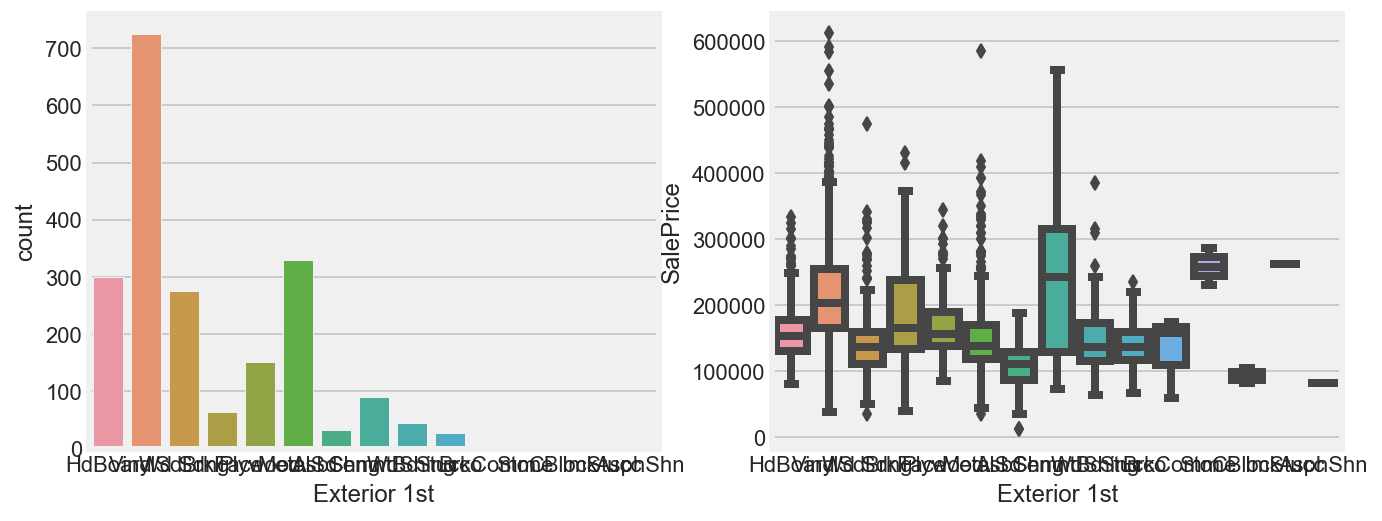

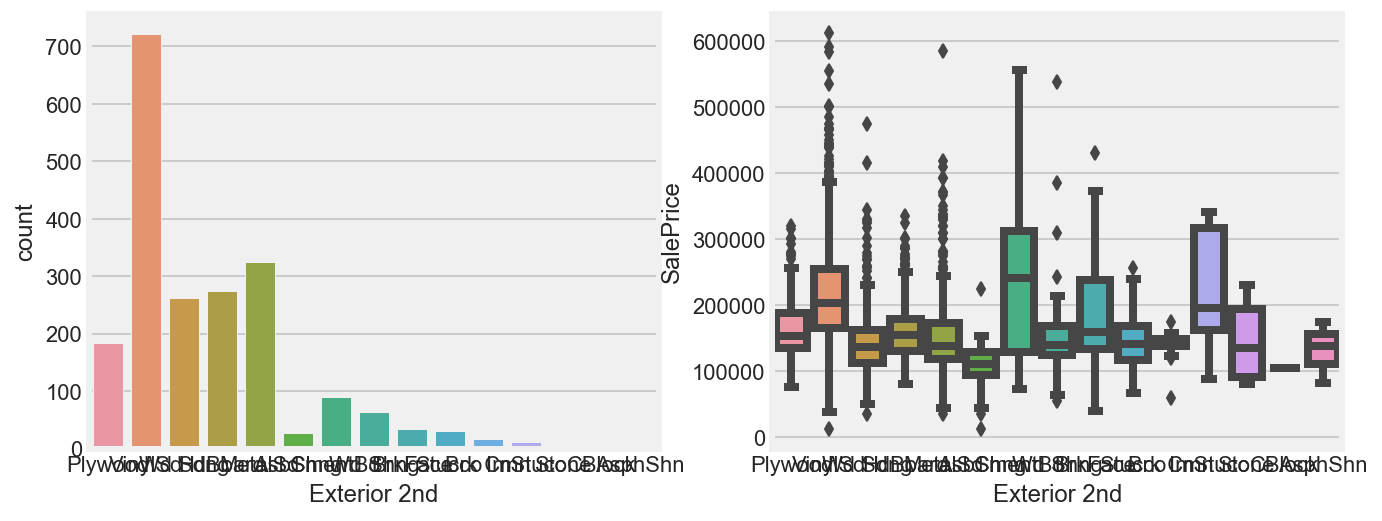

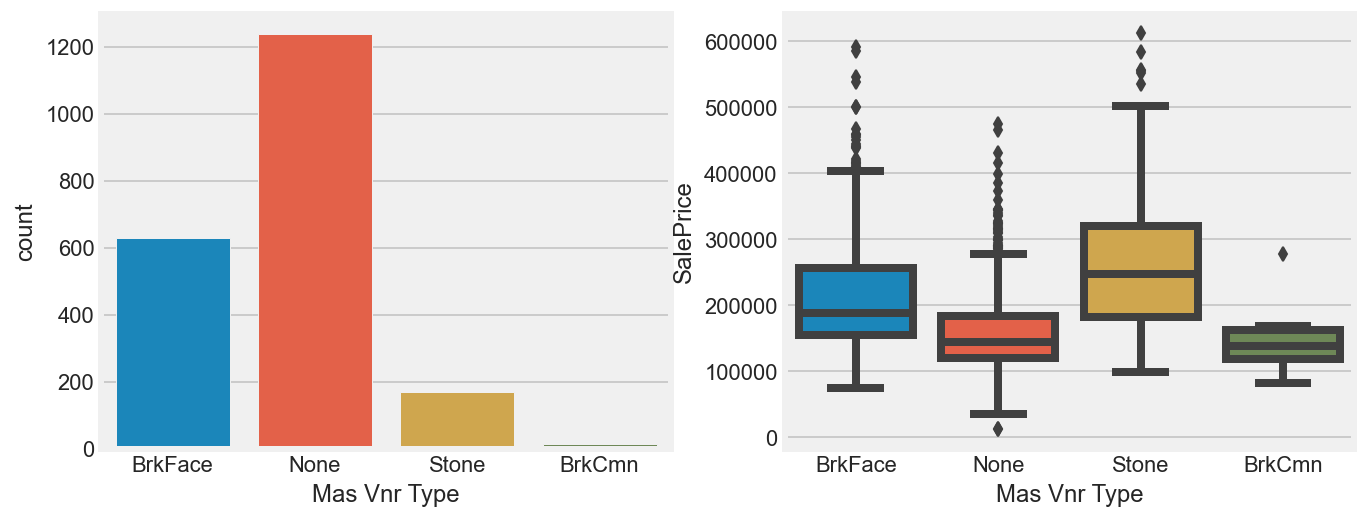

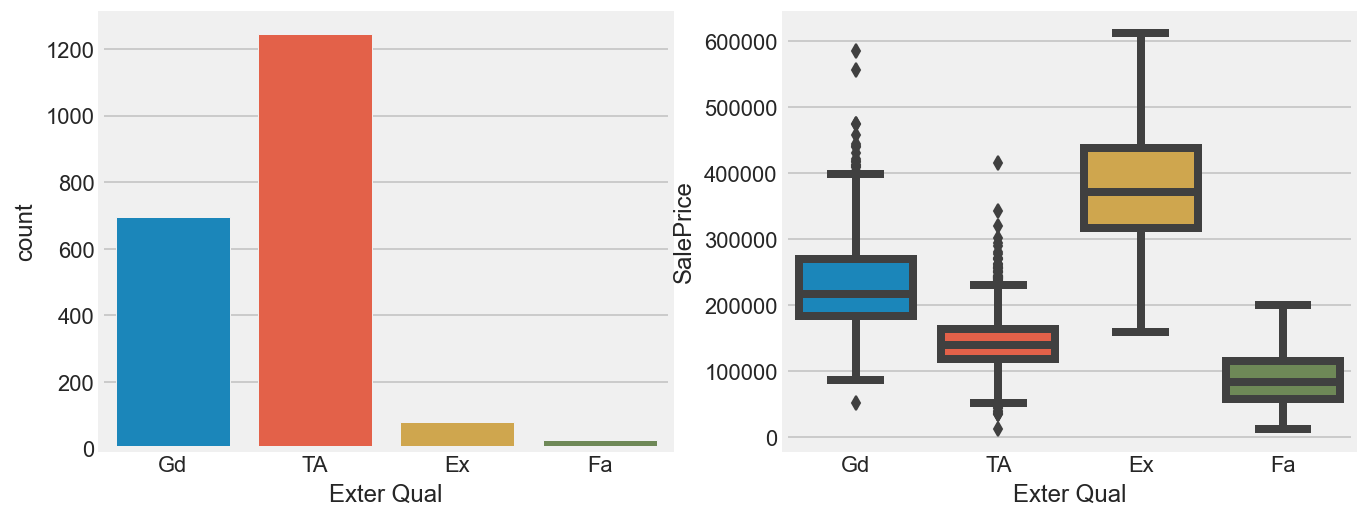

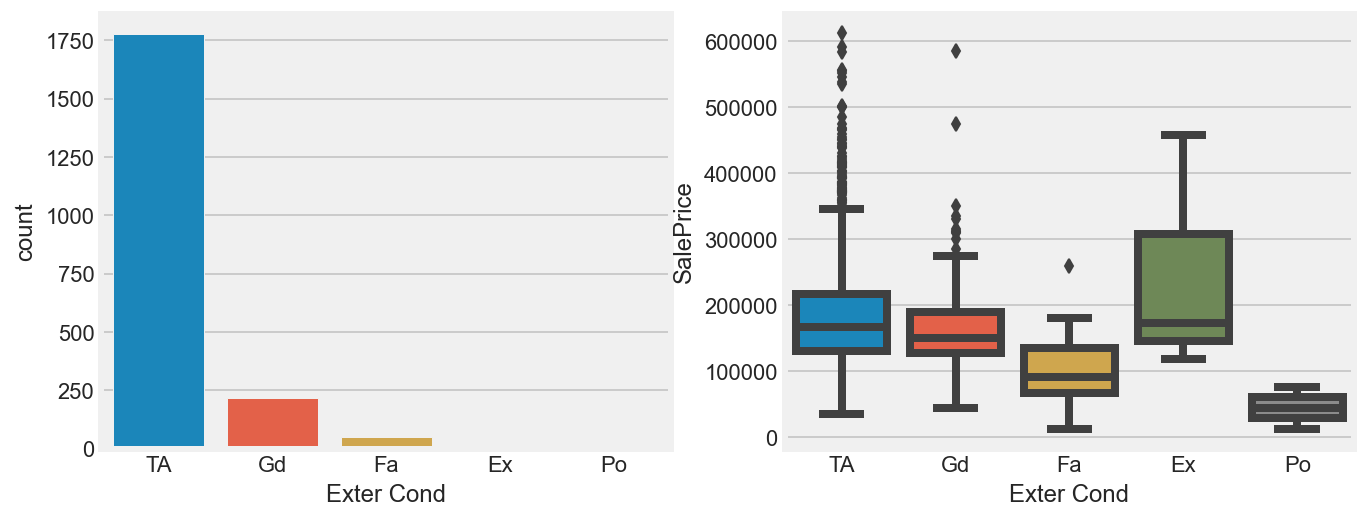

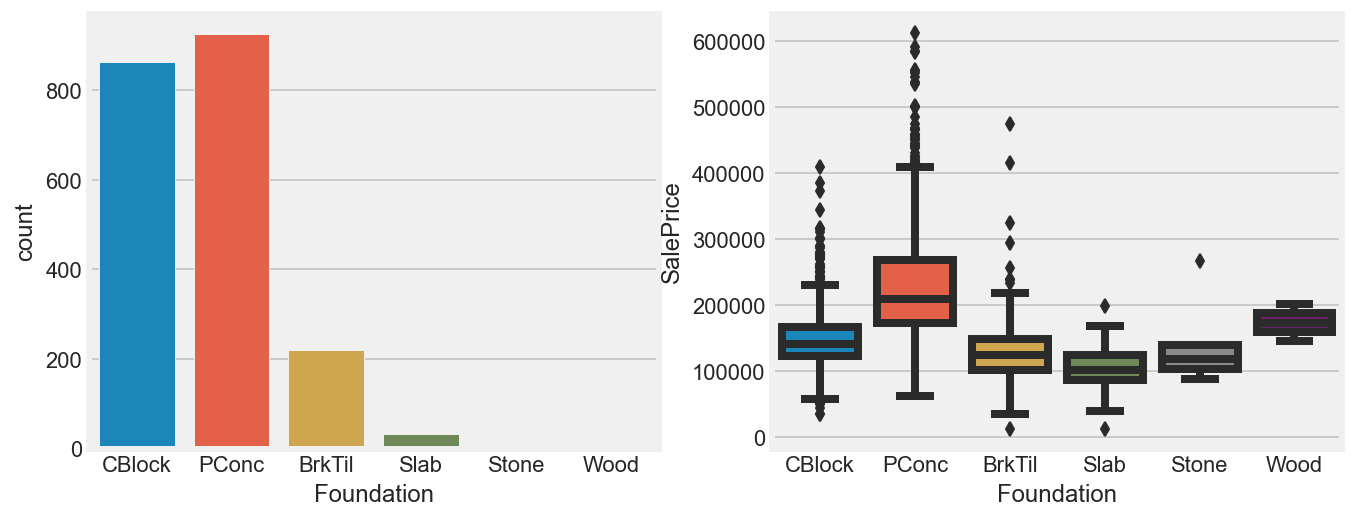

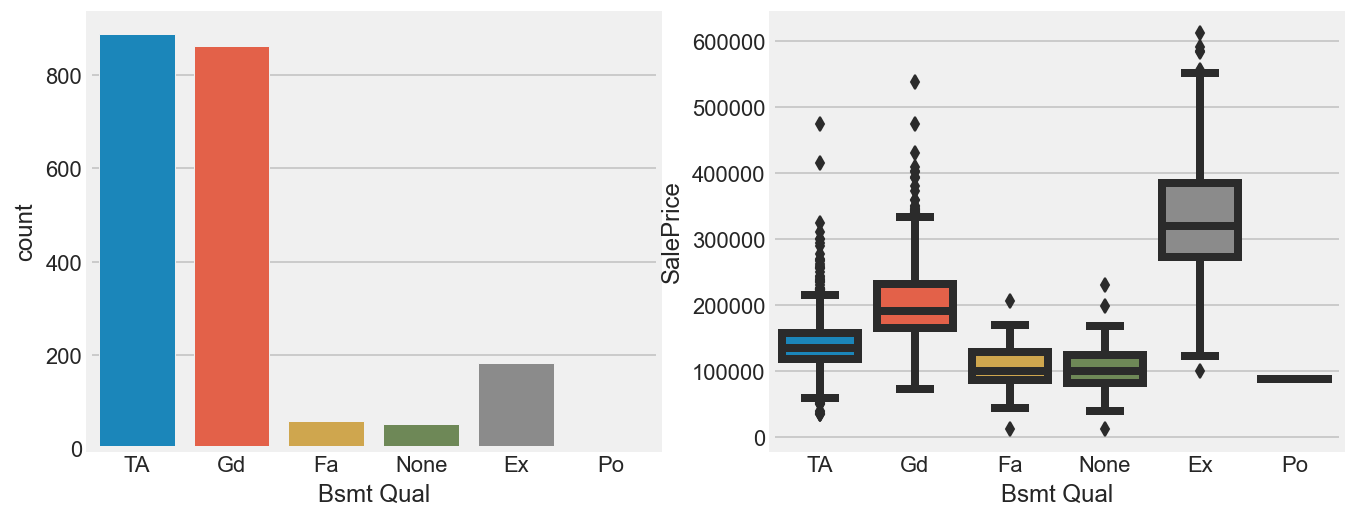

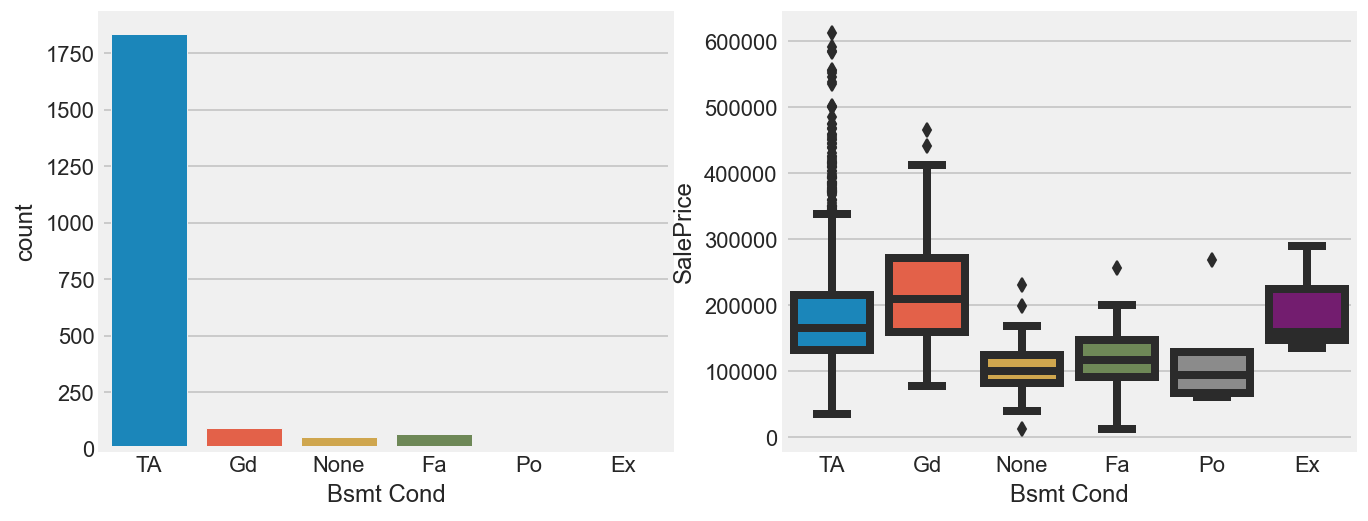

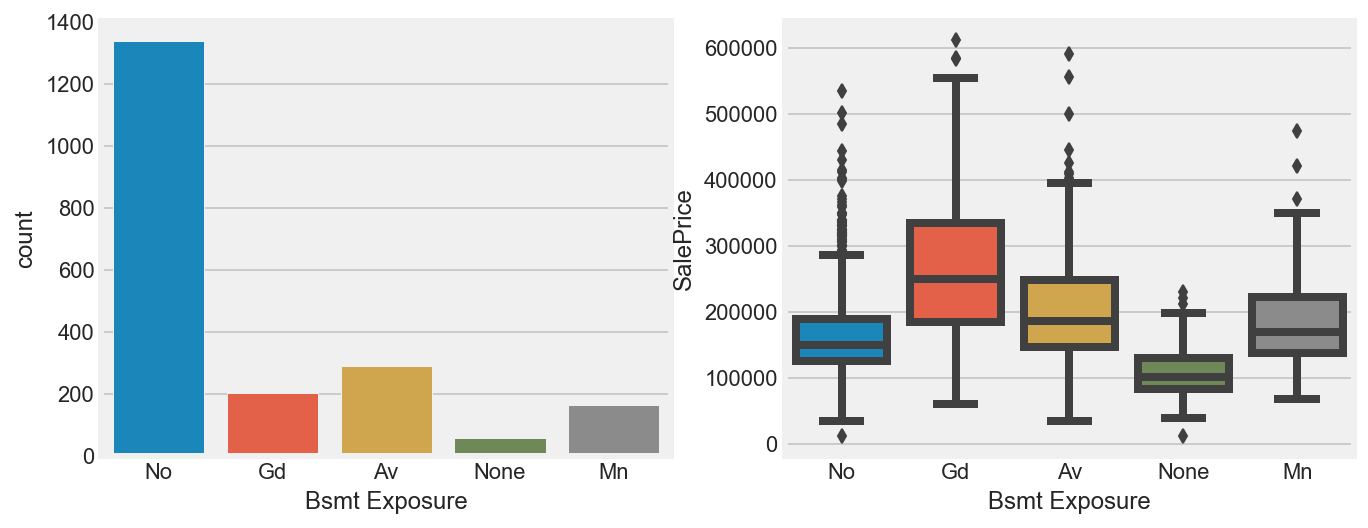

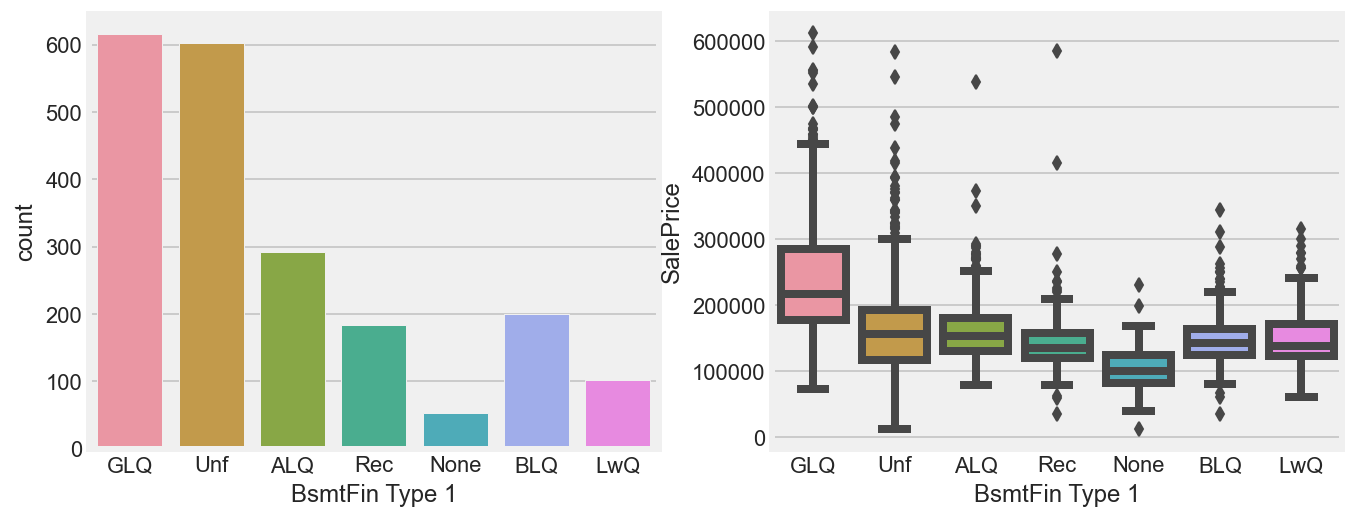

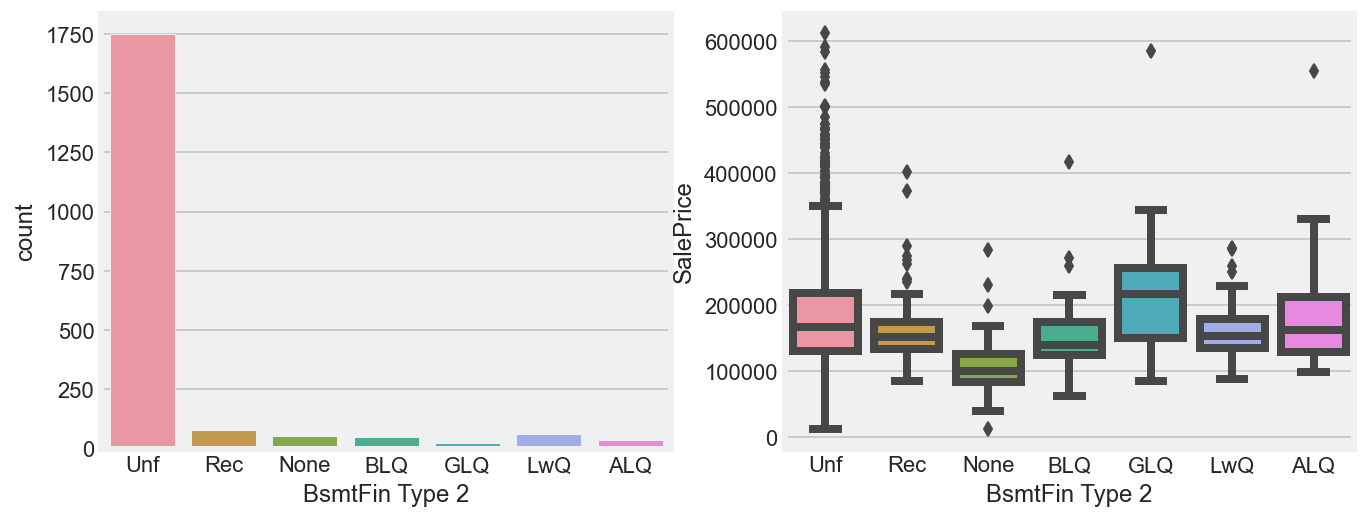

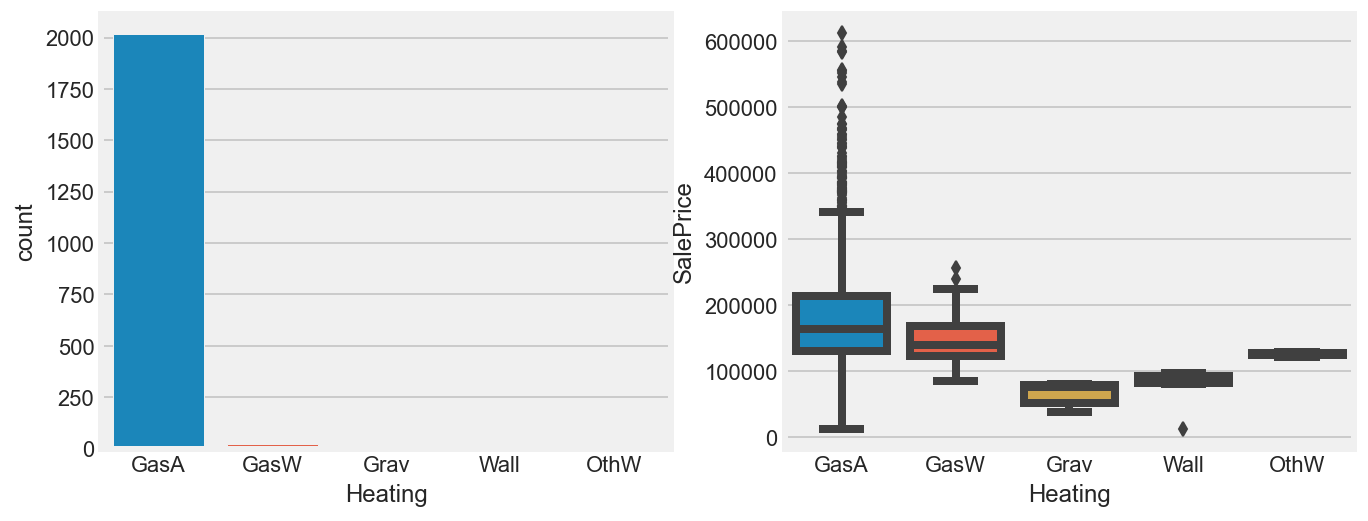

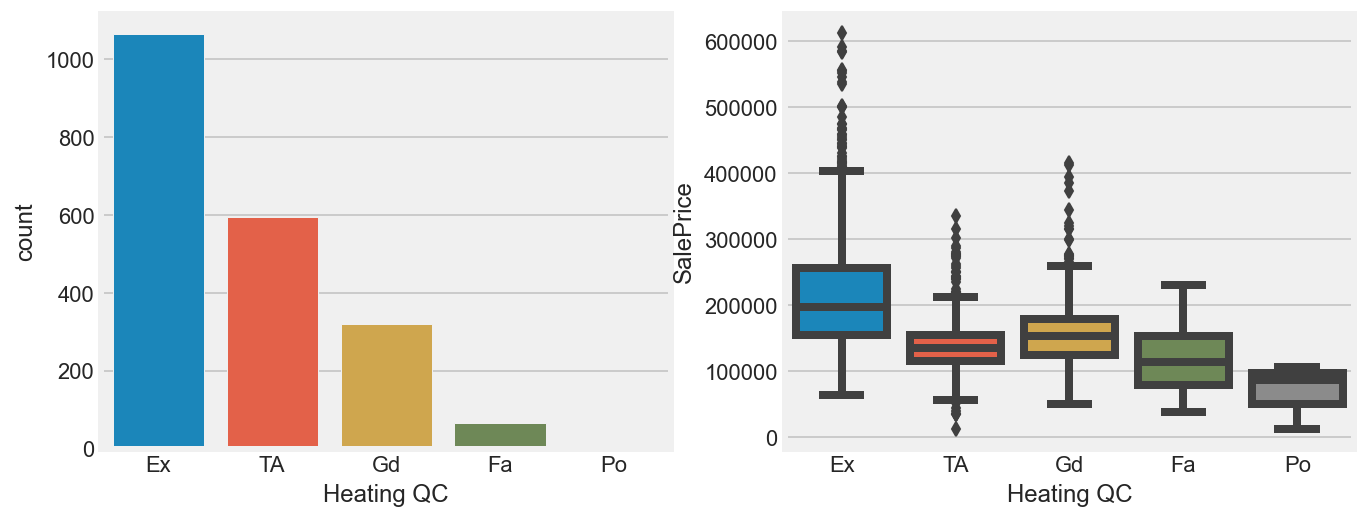

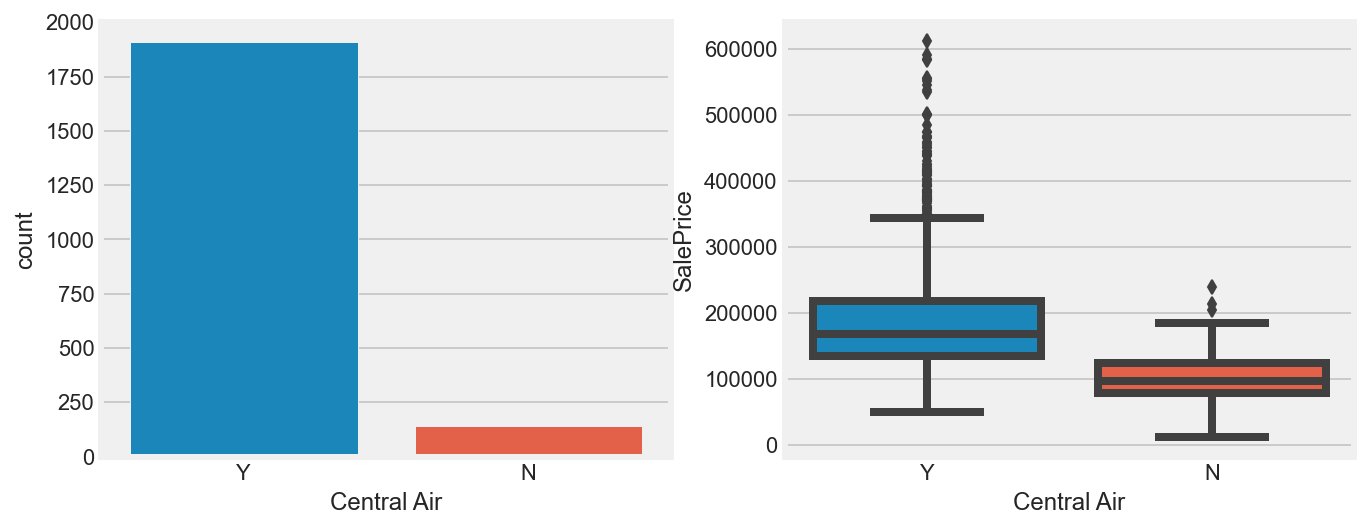

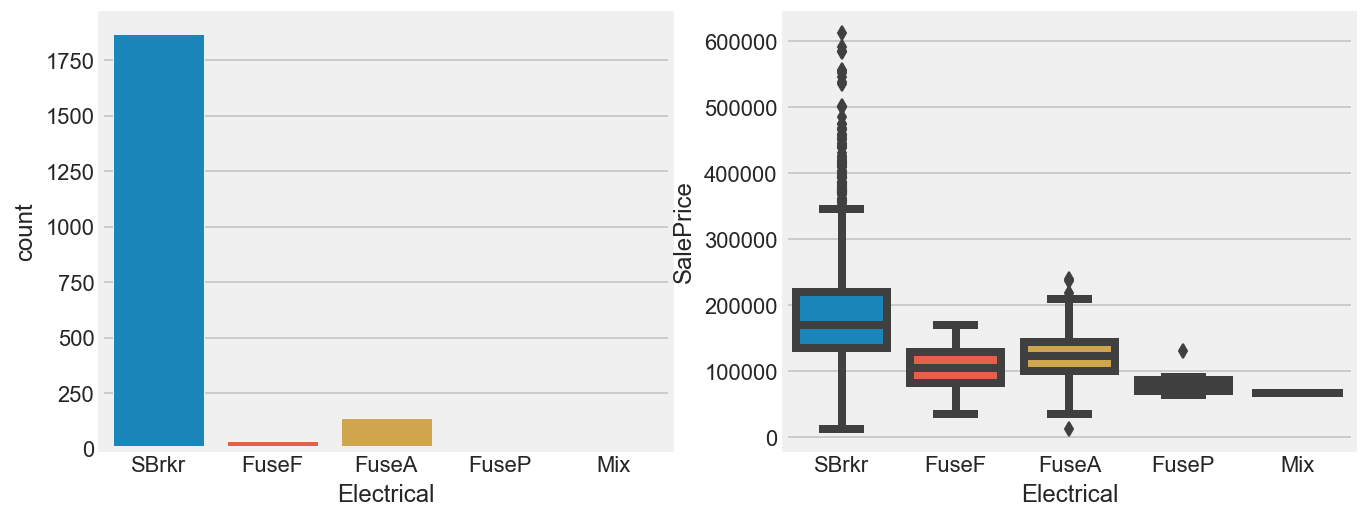

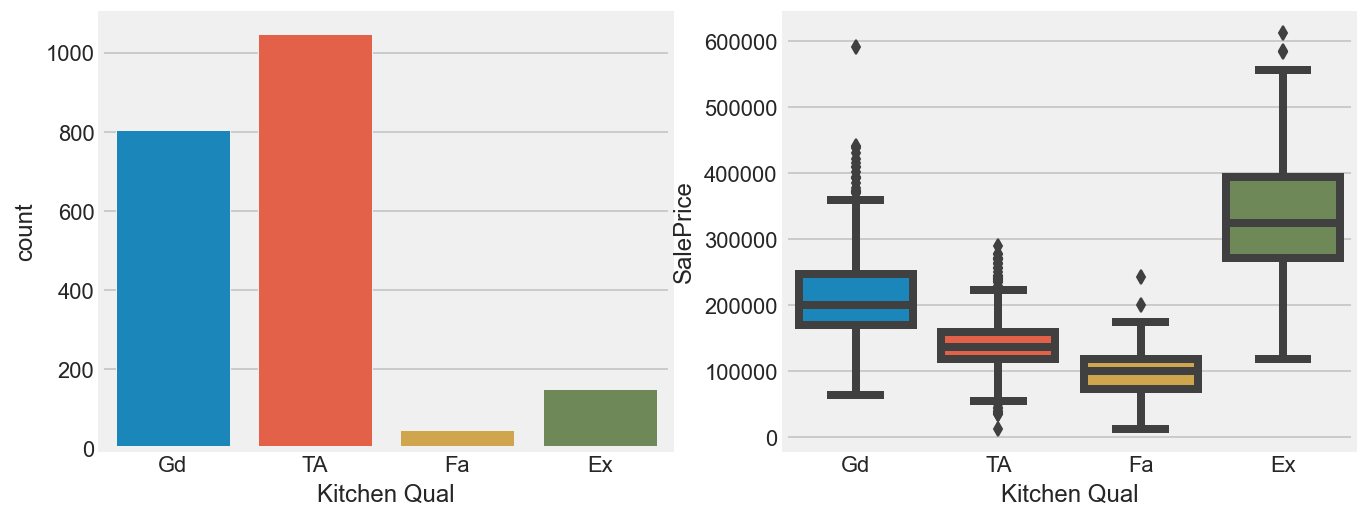

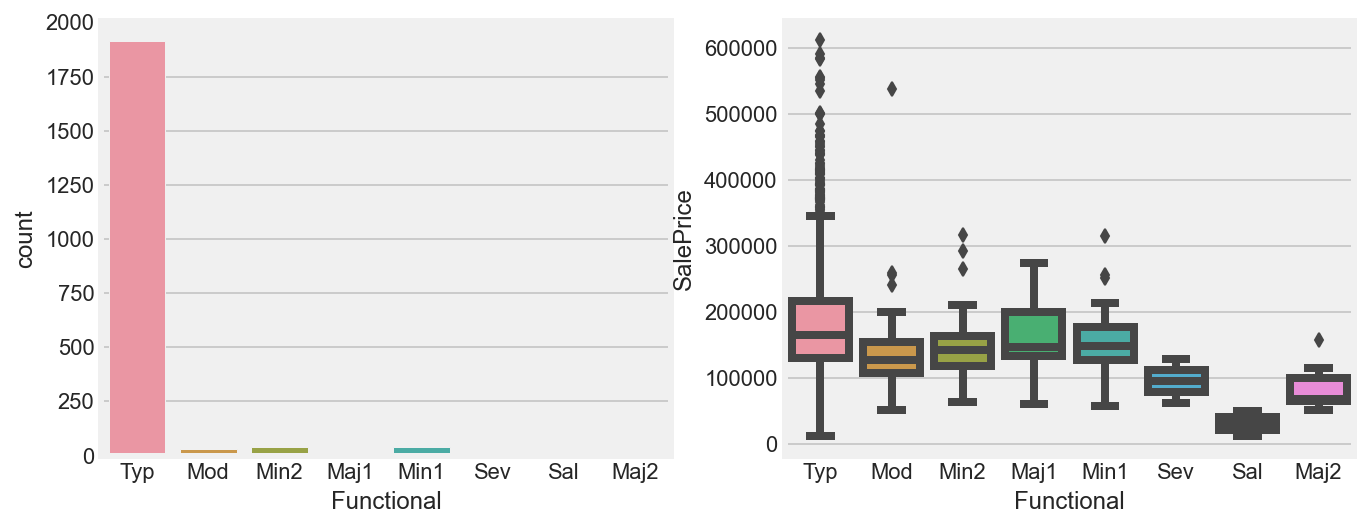

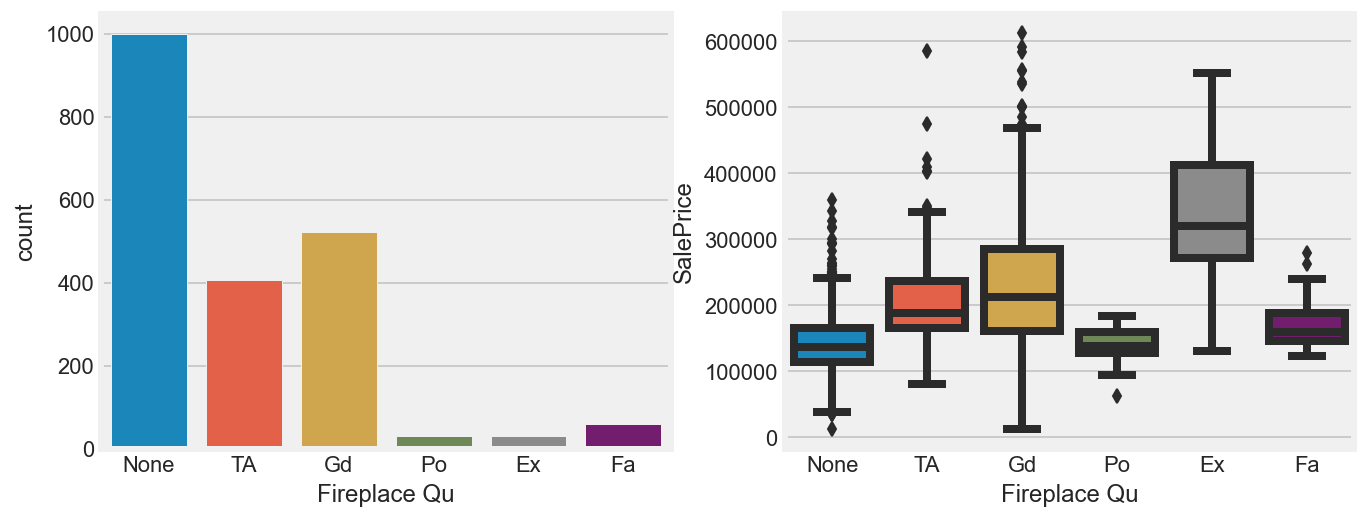

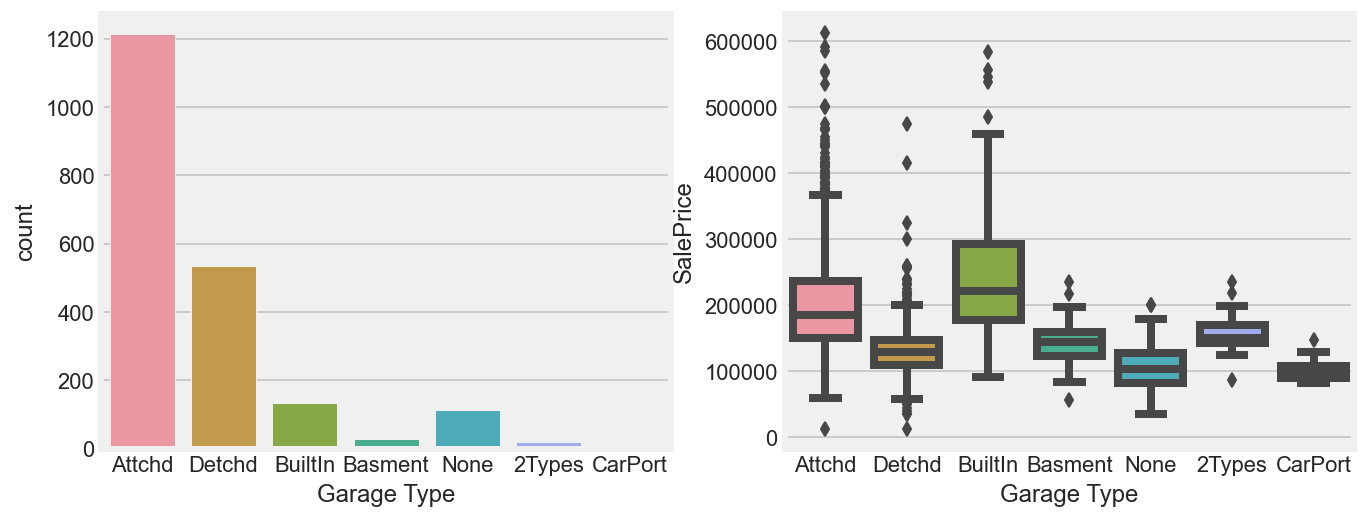

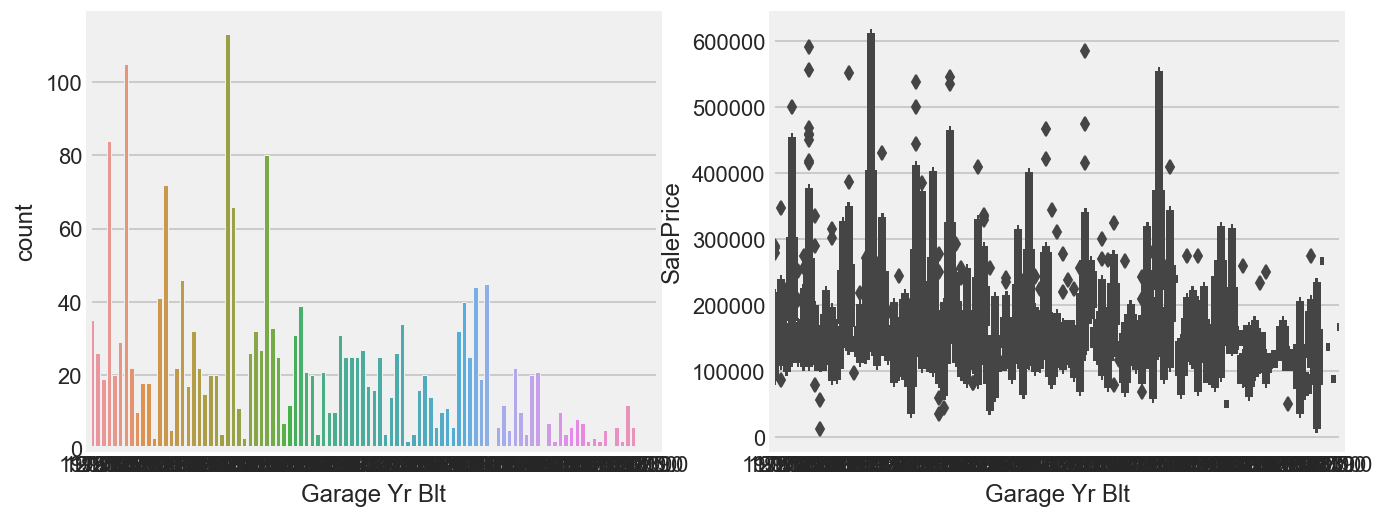

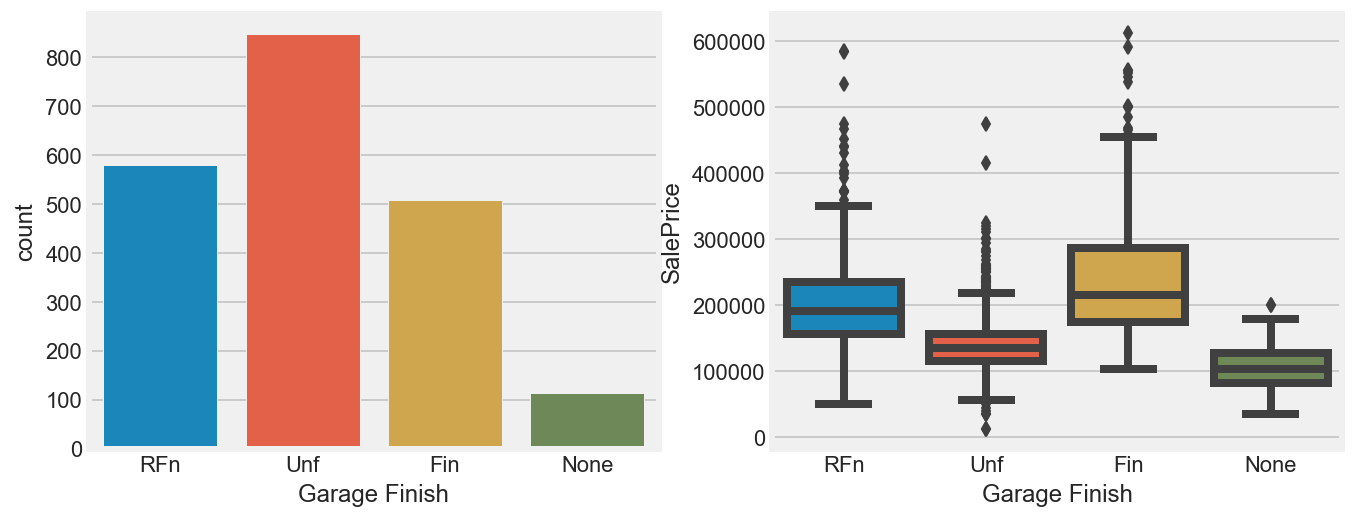

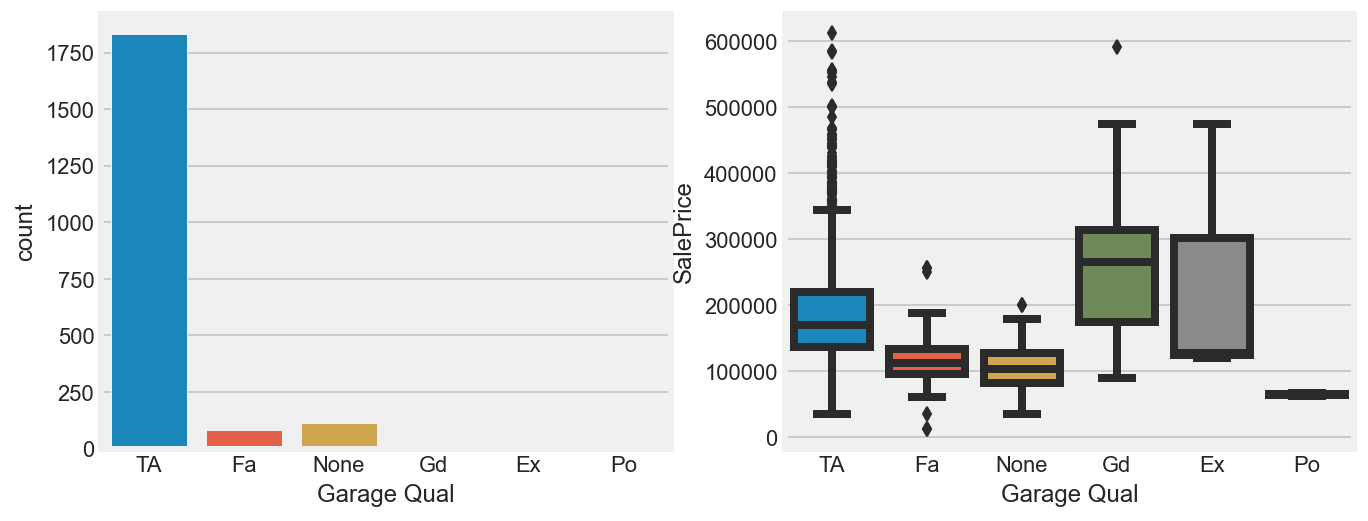

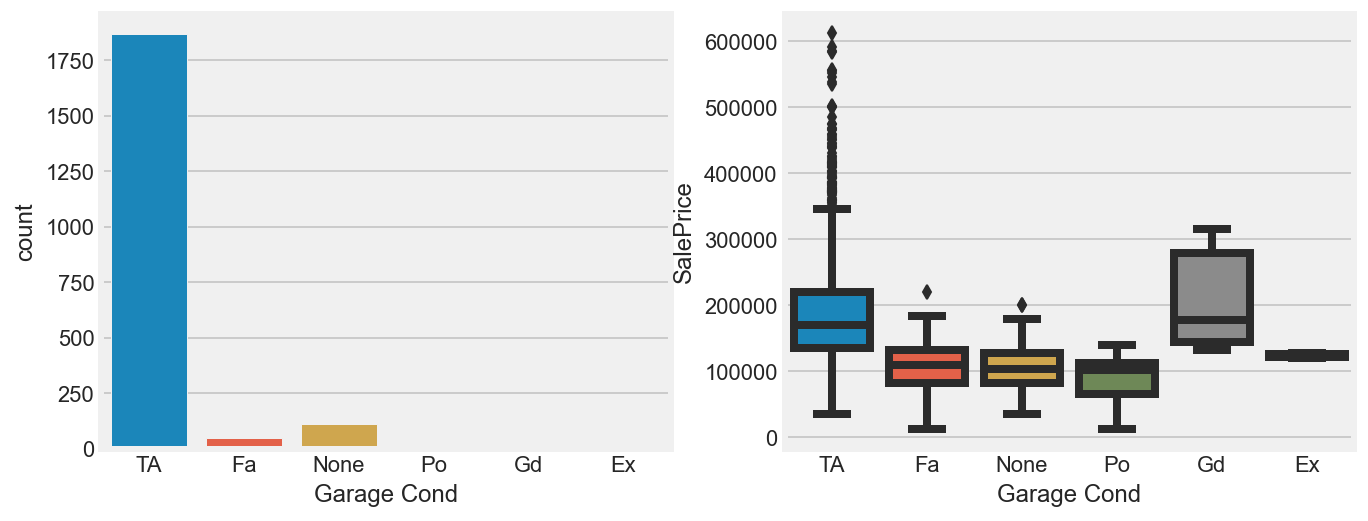

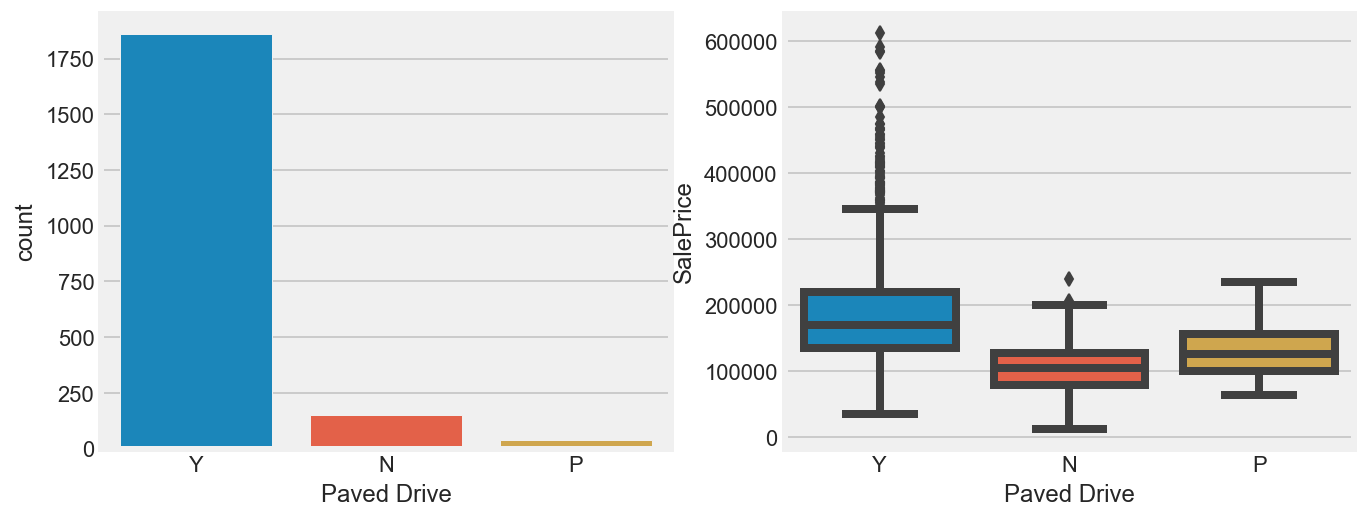

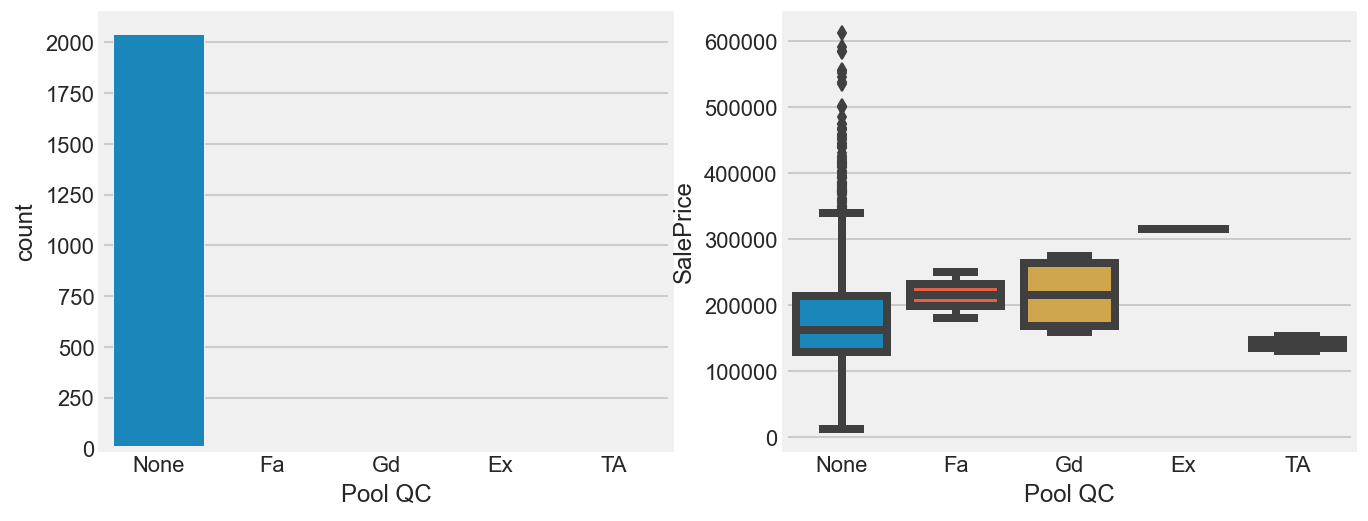

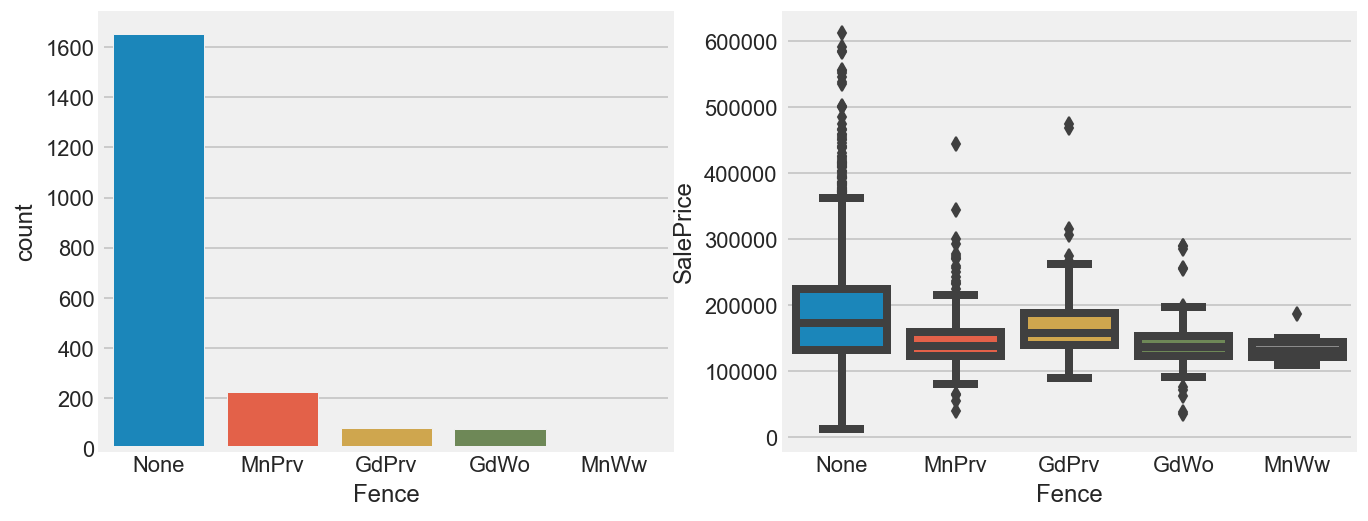

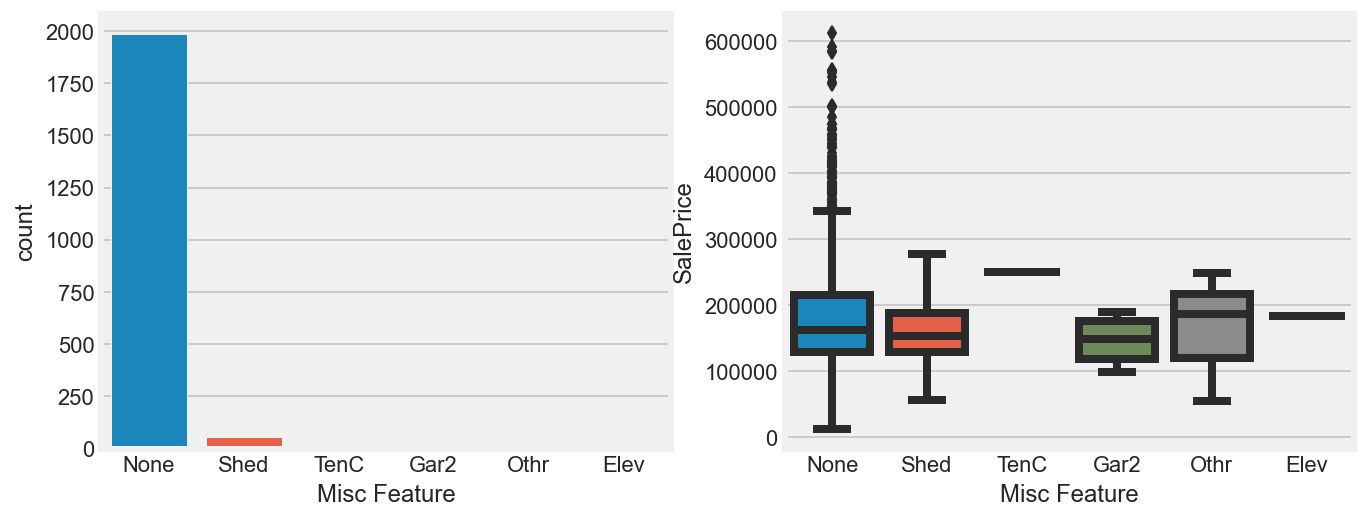

In [1959]:
#Plotting subplots of the categorical columns. 
#countplots will be used to view the counts of each selection within a feature. 
#Boxplots will be used to view the how the different selections within a feature can have an impact on the sale price.

for i in object_cols.columns:
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    sns.countplot(data=train_data, x= i, ax=ax[0])
    sns.boxplot(data=train_data, x=i, y='SalePrice', ax=ax[1]);

### After viewing the countplots and boxplots, these are some decisions made on which categorical  variables to consider in predicting the housing prices, after taking into consideration the bar charts as well as the box plots.





Some of the categorical columns are dominated by a particular type (e.g. in street, and landcontour), with very little representation of the other categories.

| features | reasons for considering this variable |
| --- | --- |
| Neighborhood | The boxplots were able to show that the prices in different neighborhoods vary. The median housing price is much higher in certain neighborhoods as compared to others. Furthermore, the barcharts also show that all the neighborhoods were represented in training data. |
| Condition 1 | While most of the selections in the training data selected 'Norm', it was noticed in the boxplots that when other selections were chosen for example, 'PosN', it can affect the median pricing of the house.|
| Condition 2 | Same as condition 1, while most of the selections in the training data selected 'Norm', it was noticed in the boxplots that when other selections were chosen for example, 'PosN' a nd 'PosA', it can have a positive effect in increasing the median pricing of the house. |
| Kitchen Qual | While most of the kitchens fall under 'Gd' and 'TA', the kitchens under 'Ex' can shift the sales prices much higher. The 25th percentile of the 'Ex' kitchens is already higher than the 75th percentile of 'Gd' kitchens.|
| Fireplace Qu | Through the boxplots, it is observed that different selections under fireplace quality can have a positive impact on the sale price of housing even though more of the houses in the training data do not have fireplaces.|
| Garage Type |Built in garages generally have higher sale prices as compared to other selections according to the box plots.  |
| Garage Qual| Even though most of the counts for garage quality fall under 'typical/ average', the quality of the garage strongly affects the sales prices as seen in the box plots. |
|Pool QC|The boxplots show that the pool quality has an impact on the sale prices. Even though not all houses have pools, the median prices of the houses are much higher for pools with good or excellent ratings. |

In [1960]:
top_cat = train_data[['Neighborhood', 'Condition 1', 'Condition 2', 'Kitchen Qual', 'Fireplace Qu', 'Garage Type',\
                      'Garage Qual', 'Pool QC']]
top_cat.head()

Neighborhood Condition 1 Condition 2 Kitchen Qual Fireplace Qu Garage Type  \
0       Sawyer        RRAe        Norm           Gd         None      Attchd   
1      SawyerW        Norm        Norm           Gd           TA      Attchd   
2        NAmes        Norm        Norm           Gd         None      Detchd   
3       Timber        Norm        Norm           TA         None     BuiltIn   
4      SawyerW        Norm        Norm           TA         None      Detchd   

  Garage Qual Pool QC  
0          TA    None  
1          TA    None  
2          TA    None  
3          TA    None  
4          TA    None

# 2.4 Identifying Numerical features

In [1961]:
#identify categorical columns
#Filtering out features with dtypes that are NOT 'object'

numerical_cols = train_data.loc[:, train_data.dtypes != 'O']
numerical_cols

Id        PID  MS SubClass  Lot Area  Overall Qual  Overall Cond  \
0      109  533352170           60     13517             6             8   
1      544  531379050           60     11492             7             5   
2      153  535304180           20      7922             5             7   
3      318  916386060           60      9802             5             5   
4      255  906425045           50     14235             6             8   
...    ...        ...          ...       ...           ...           ...   
2046  1587  921126030           20     11449             8             5   
2047   785  905377130           30     12342             4             5   
2048   916  909253010           50      7558             6             6   
2049   639  535179160           20     10400             4             5   
2050    10  527162130           60      7500             7             5   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0           1976            2005         289.0         533.0           0.0   
1           1996            1997         132.0         637.0           0.0   
2           1953            2007           0.0         731.0           0.0   
3           2006            2007           0.0           0.0           0.0   
4           1900            1993           0.0           0.0           0.0   
...          ...             ...           ...           ...           ...   
2046        2007            2007           0.0        1011.0           0.0   
2047        1940            1950           0.0         262.0           0.0   
2048        1928            1950           0.0           0.0           0.0   
2049        1956            1956           0.0         155.0         750.0   
2050        1999            1999           0.0           0.0           0.0   

      Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0           192.0          725.0         725         754                0   
1           276.0          913.0         913        1209                0   
2           326.0         1057.0        1057           0                0   
3           384.0          384.0         744         700                0   
4           676.0          676.0         831         614                0   
...           ...            ...         ...         ...              ...   
2046        873.0         1884.0        1728           0                0   
2047        599.0          861.0         861           0                0   
2048        896.0          896.0        1172         741                0   
2049        295.0         1200.0        1200           0                0   
2050        994.0          994.0        1028         776                0   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
0            1479             0.0             0.0          2          1   
1            2122             1.0             0.0          2          1   
2            1057             1.0             0.0          1          0   
3            1444             0.0             0.0          2          1   
4            1445             0.0             0.0          2          0   
...           ...             ...             ...        ...        ...   
2046         1728             1.0             0.0          2          0   
2047          861             0.0             0.0          1          0   
2048         1913             0.0             0.0          1          1   
2049         1200             1.0             0.0          1          0   
2050         1804             0.0             0.0          2          1   

      Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Cars  \
0                 3              1              6           0          2.0   
1                 4              1              8           1          2.0   
2                 3              1              5           0          1.0   
3                 3 

In [1962]:
#columns headers for the numerical features 
numerical_cols.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object')

# 2.5 Numerical columns which are not features of a house will be dropped. 


In [1963]:
#yr sold will be retained to calculate the age of the house when it was sold
non_features = ['Id', 'PID', 'Mo Sold']

In [1964]:
[numerical_cols.drop(col, axis = 1, inplace = True) for col in non_features]

[None, None, None]

In [1965]:
#checking whether the numerical columns that are not considered as features of a house has been dropped and 
#a new additional column - House Age
numerical_cols.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [1966]:
numerical_cols.describe().T

count           mean           std      min        25%  \
MS SubClass      2048.0      57.038574     42.839004     20.0      20.00   
Lot Area         2048.0   10049.675293   6697.167566   1300.0    7500.00   
Overall Qual     2048.0       6.114258      1.426126      1.0       5.00   
Overall Cond     2048.0       5.560547      1.104349      1.0       5.00   
Year Built       2048.0    1971.751465     30.174112   1872.0    1954.00   
Year Remod/Add   2048.0    1984.193848     21.033925   1950.0    1964.75   
Mas Vnr Area     2048.0      98.770996    174.411461      0.0       0.00   
BsmtFin SF 1     2048.0     442.464844    461.319862      0.0       0.00   
BsmtFin SF 2     2048.0      48.005859    165.074675      0.0       0.00   
Bsmt Unf SF      2048.0     568.130859    444.958855      0.0     220.00   
Total Bsmt SF    2048.0    1058.601562    448.999749      0.0     793.00   
1st Flr SF       2048.0    1163.431152    392.294626    334.0     879.00   
2nd Flr SF       2048.0     329.378906    425.680677      0.0       0.00   
Low Qual Fin SF  2048.0       5.520996     51.105842      0.0       0.00   
Gr Liv Area      2048.0    1498.331055    497.948344    334.0    1129.50   
Bsmt Full Bath   2048.0       0.427734      0.522715      0.0       0.00   
Bsmt Half Bath   2048.0       0.063477      0.251763      0.0       0.00   
Full Bath        2048.0       1.576660      0.548553      0.0       1.00   
Half Bath        2048.0       0.371094      0.501083      0.0       0.00   
Bedroom AbvGr    2048.0       2.842773      0.825631      0.0       2.00   
Kitchen AbvGr    2048.0       1.042969      0.209937      0.0       1.00   
TotRms AbvGrd    2048.0       6.435059      1.557145      2.0       5.00   
Fireplaces       2048.0       0.590820      0.637957      0.0       0.00   
Garage Cars      2048.0       1.776855      0.764702      0.0       1.00   
Garage Area      2048.0     473.692871    215.972053      0.0     319.00   
Wood Deck SF     2048.0      93.886230    128.597923      0.0       0.00   
Open Porch SF    2048.0      47.444824     66.393358      0.0       0.00   
Enclosed Porch   2048.0      22.501465     59.738209      0.0       0.00   
3Ssn Porch       2048.0       2.595215     25.247901      0.0       0.00   
Screen Porch     2048.0      16.535645     57.412746      0.0       0.00   
Pool Area        2048.0       2.401367     37.810135      0.0       0.00   
Misc Val         2048.0      51.649902    573.810601      0.0       0.00   
Yr Sold          2048.0    2007.775879      1.312844   2006.0    2007.00   
SalePrice        2048.0  181484.252441  79248.657891  12789.0  129837.50   

                      50%        75%       max  
MS SubClass          50.0      70.00     190.0  
Lot Area           9432.0   11512.75  159000.0  
Overall Qual          6.0       7.00      10.0  
Overall Cond          5.0       6.00       9.0  
Year Built         1974.0    2001.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Mas Vnr Area          0.0     160.00    1600.0  
BsmtFin SF 1        368.0     734.00    5644.0  
BsmtFin SF 2          0.0       0.00    1474.0  
Bsmt Unf SF         475.0     811.00    2336.0  
Total Bsmt SF       995.5    1319.00    6110.0  
1st Flr SF         1093.0    1405.00    5095.0  
2nd Flr SF            0.0     691.75    1862.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Gr Liv Area        1444.0    1728.00    5642.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       8.0  
Kitchen AbvGr         1.0       1.00       3.0  
TotRms AbvGrd         6.0       7.00      15.0  
Fireplaces            1.0       1.00       4.0  
Garage Cars           2.0       2.00       5.0  
Garage Area         480.0     576.00    1418.0  
Wood Deck SF          0.0     168.00    1424.0  
Open Porch SF        27.0      70.

Here are some preliminary observations from the numerical columns

1) The Min Sale Price of a house is `$12,789`,  Max Sale Price is `$611,657` with a mean average Sale Price of `$181,484`.

2) The Min age of a house sold is `-1`, Max age is `136` and the average age is `36`. Since the min age is -1 we can assume that the house was sold before it was fully built. 

3) The Min Total Bsmt SF is `0.0` a nd the Max is `6110` square feet. The min is at 0.0 as some houses do not come with basements                                                        

# 2.6 Plotting preliminary visualisations for numerical columns 
### Heatmap visualisations

#### The top numerical features with strong correlation with prices are Overall Qual, Gr Living Area, Garage Area, Garage Cars, Total Bsmt SF and 1st Flr SF.

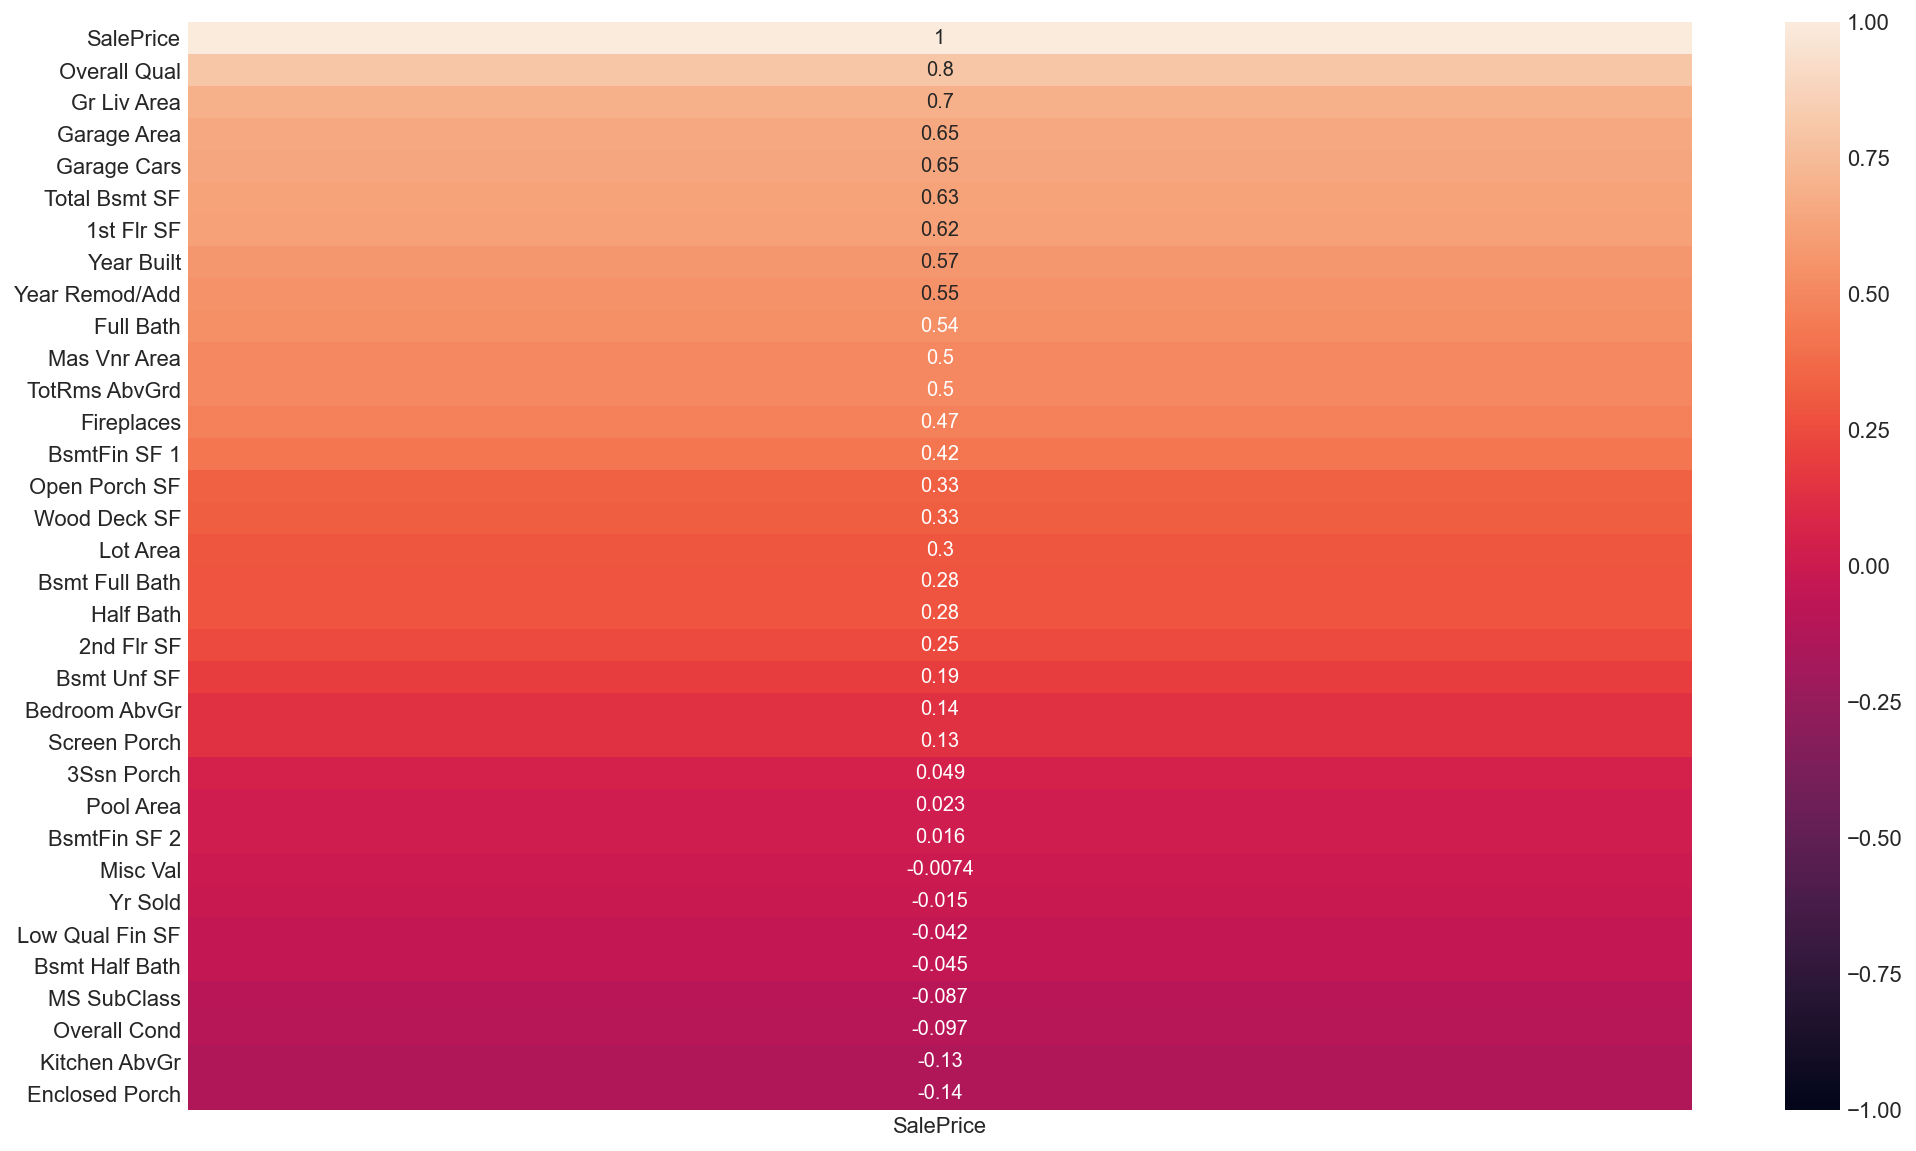

In [1967]:
#Plot the correlation of the numerical features in relation to the sale price, sorted in descending order.
plt.figure(figsize=(15, 10))

sns.heatmap(numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True,vmin=-1, vmax=1 );

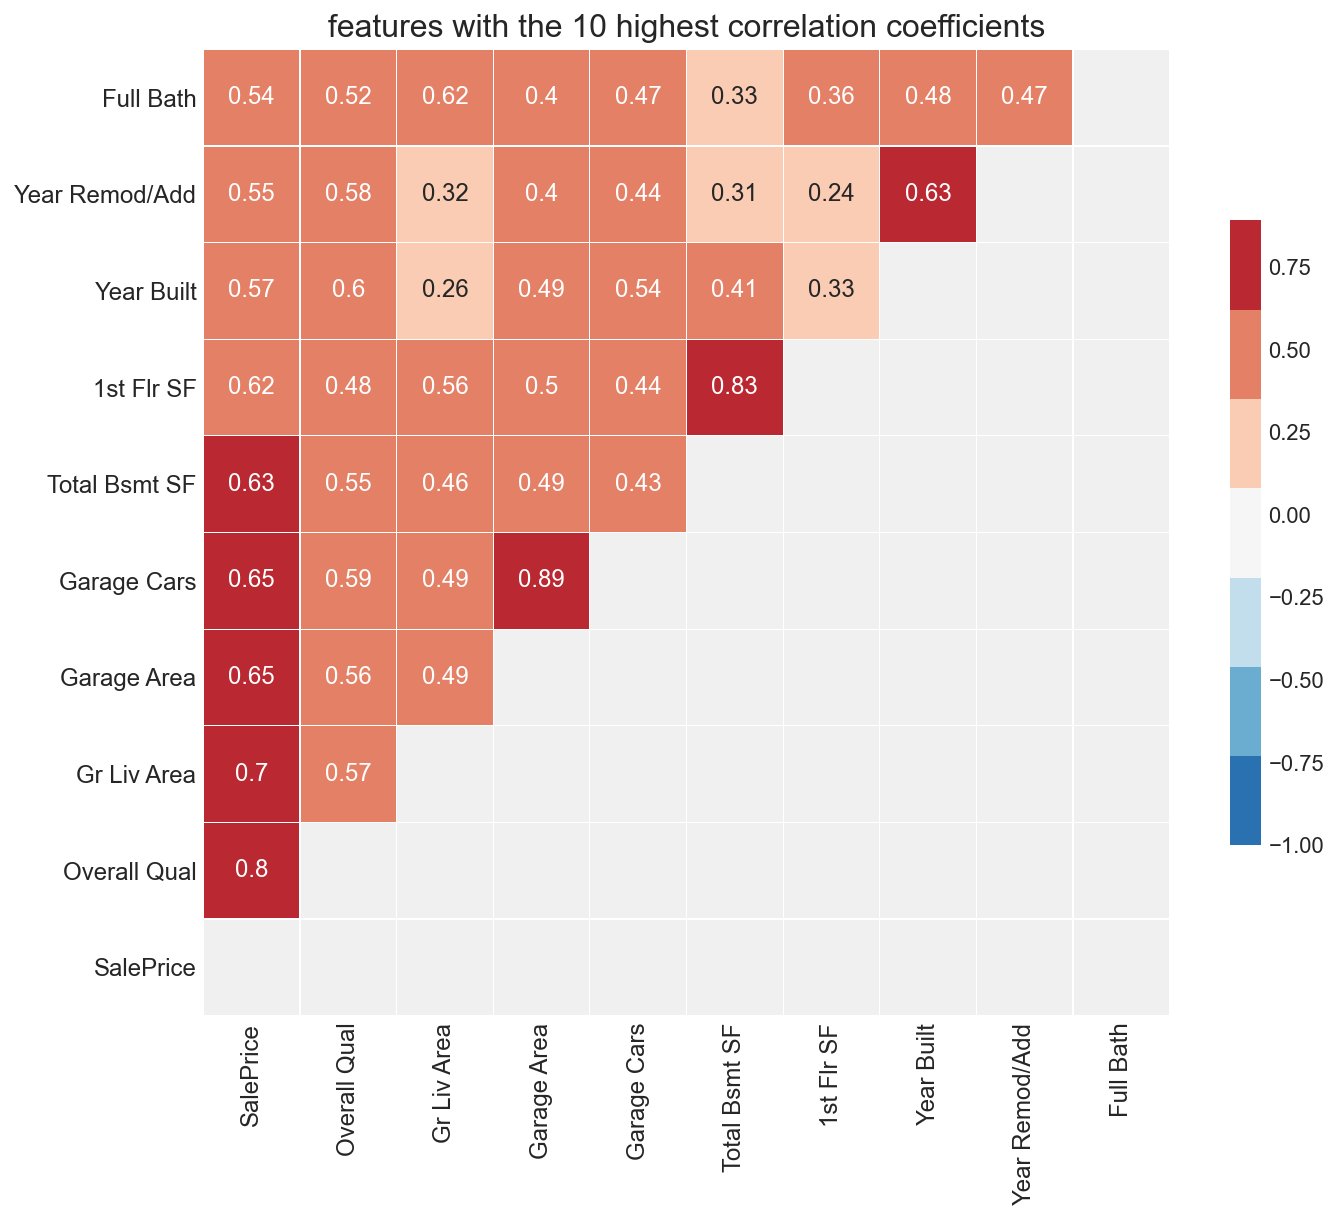

In [1968]:
#create a heatmap of the top 10 features with highest correlation
corr_cols = numerical_cols.corr().nlargest(10, 'SalePrice').index

# create heatmap
mask = np.zeros_like(numerical_cols[corr_cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(numerical_cols[corr_cols].corr(), 
            annot=True, 
            square= True, 
            mask = mask,
            cmap=sns.color_palette("RdBu_r", 7),
            annot_kws={'size': 12},
            cbar_kws={"shrink": 0.5},
            linewidth = 0.1,
            yticklabels=corr_cols.values, 
            xticklabels=corr_cols.values,
            vmin = -1)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.tick_params(labelsize=12)
plt.title('features with the 10 highest correlation coefficients', fontsize=16)
plt.tight_layout()

Multicollinearity was observed for these variables.

1) Garage Cars and Garage Area

2) 1st Flr SF and Total Bsmt SF

3) Year Remod/Add anf Year Built

Future decisions will be made during the feature engineering.

### Scatterplot Visualisations


From the scatterplots below, one can see a strong positive linear relationship between SalePrice and several of the features, for e.g., Overall Qual, Year Built, Total Bsmt SF, 1st Flr SF, GR Liv Area, totrmsabvgrd, Garage Area.

Outliers were also observed in a few features:

1) Lot Frontage

2) Lot Area

3) BsmtFin SF 2

4) Total Bsmt SF

5) BsmtFin SF 1

6) Mas Vnr Area

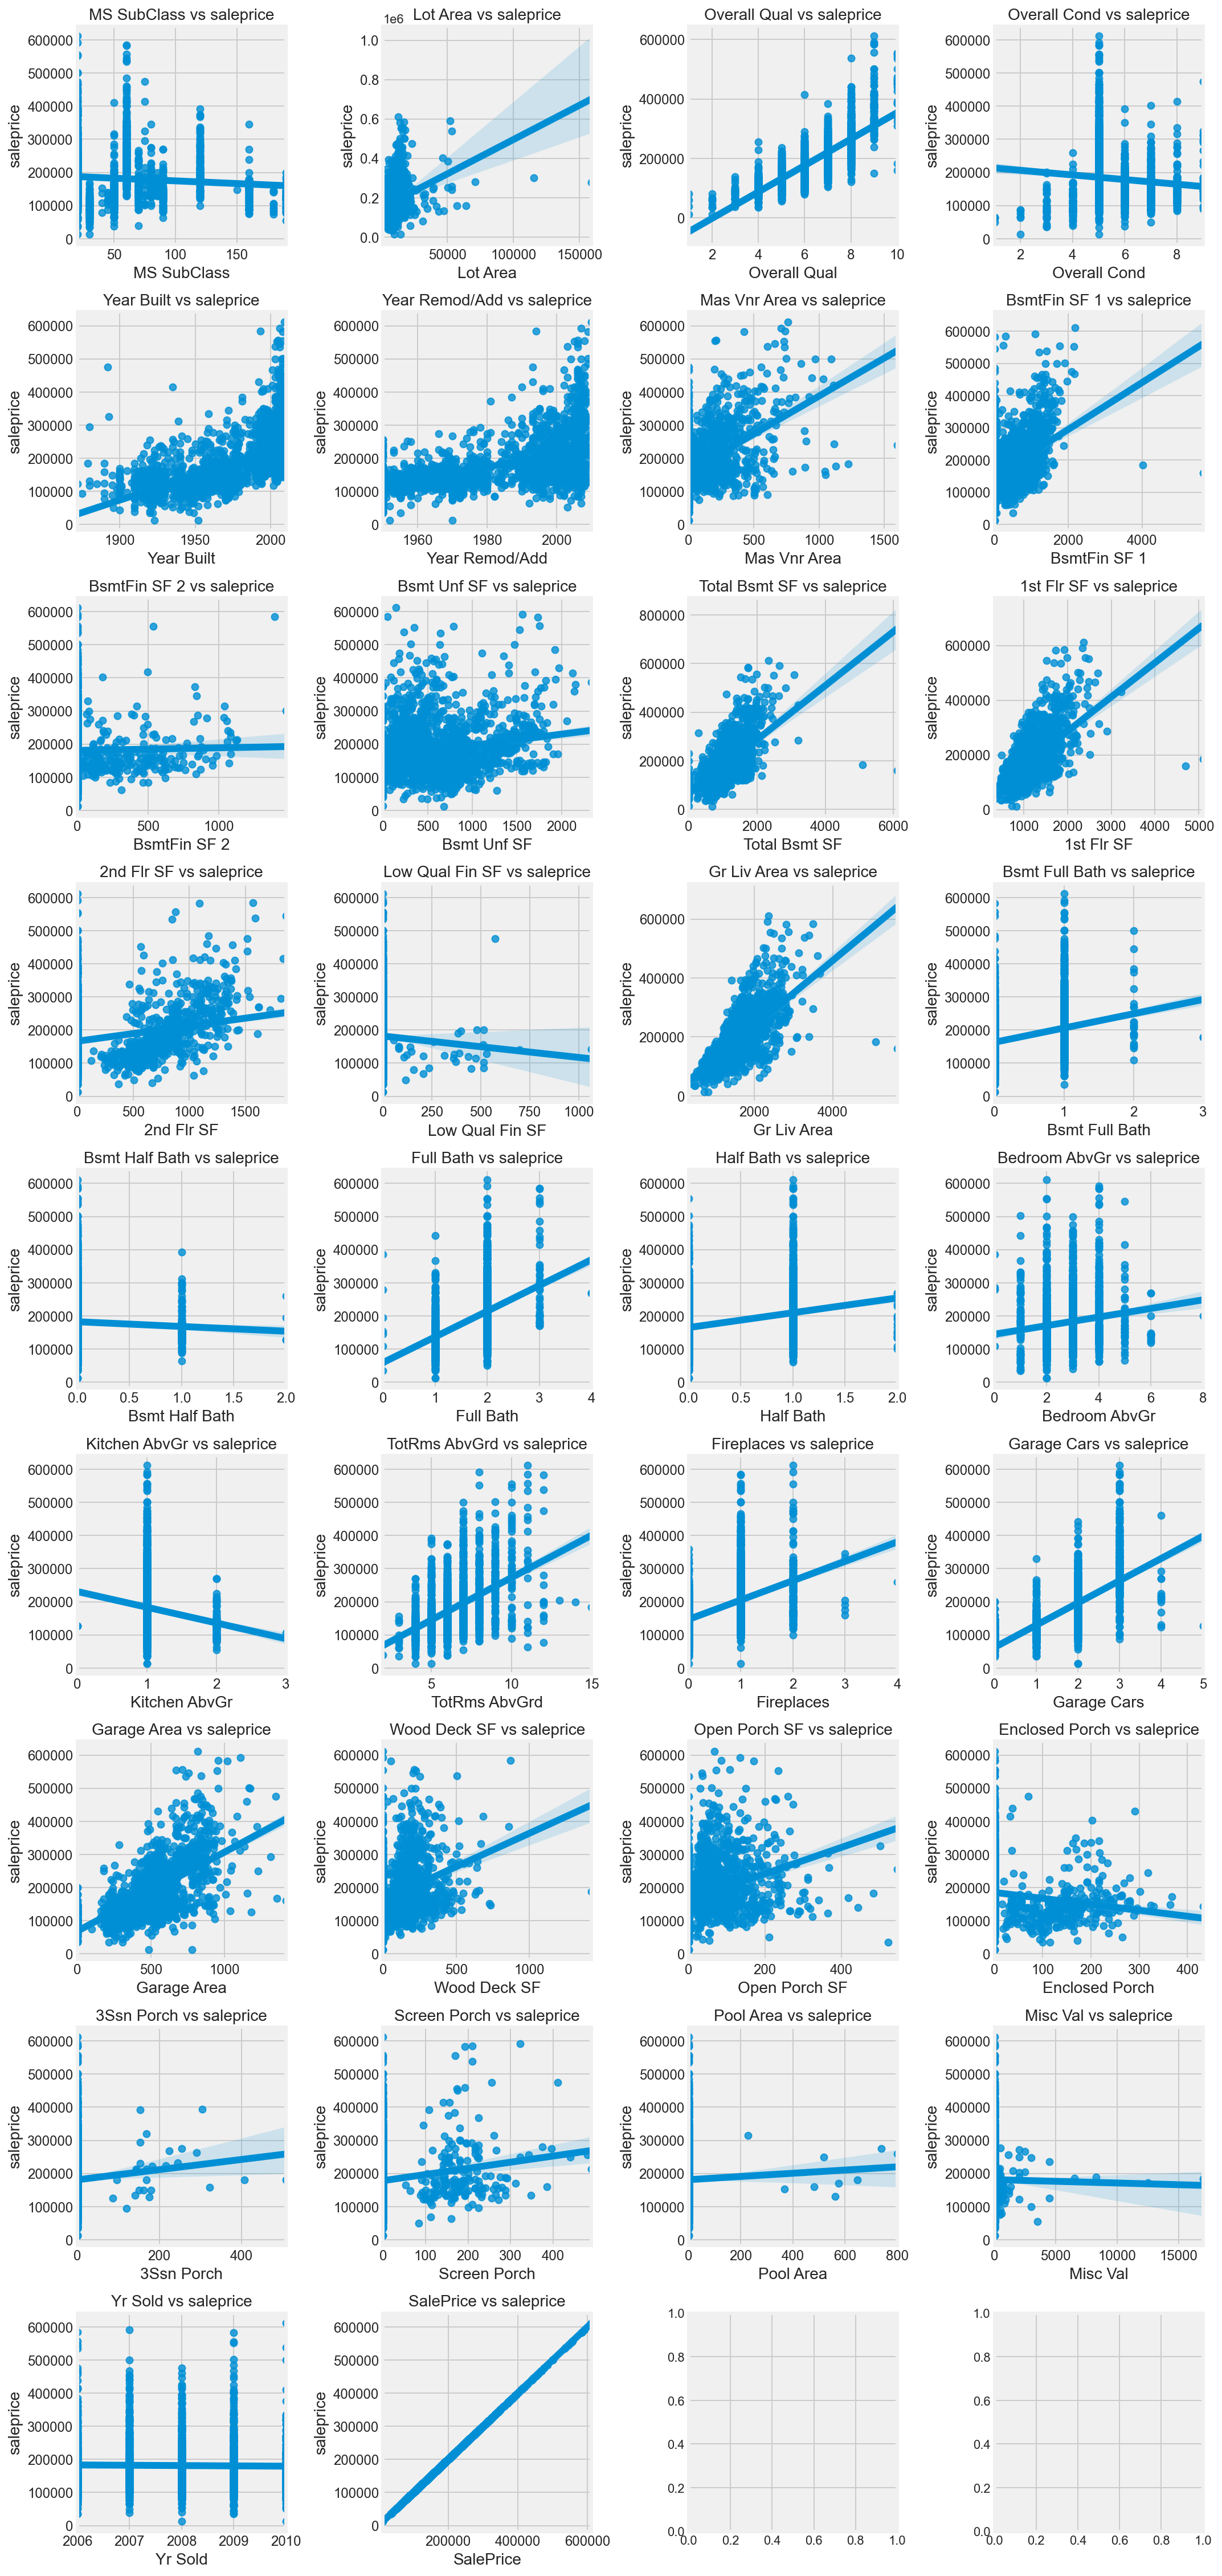

In [1969]:
#create subplots of scatter plots to observe relationships of the numerical features with sale price 
nrows = int(np.ceil(len(numerical_cols.columns)/4)) 
fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, column in enumerate(numerical_cols.columns): 
    sns.regplot(y=train_data.SalePrice, x=train_data[column],ax=ax[i])
    ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
    ax[i].tick_params(labelsize=12)
    ax[i].set_xlabel(column, fontsize=14)
    ax[i].set_ylabel('saleprice', fontsize=14)
plt.tight_layout()

# 3.  Feature Engineering & Additional changes 

Now that we filled in the missing data, clean the data and did a preliminary visualization, we can create some new variables from the existing ones.

1) Looking at the correlations of the categorical features, it was observed that Total Bsmt SF, 1st flr sf have very high positive correlation. I decided to create a new column named `Total SF` to include `Total Bsmt SF`, `1st Flr SF`and `2nd Flr SF`.

2) Create a new column called `House Age` to determine when the houses were sold after being built.

3) Create a new column called `Age Remod` to determine when the houses were sold after remod.

4) `Garage Area` and `Garage Cars` have the same correlation(0.65). Assuming that the the number of cars in a garage is very much dependent on the garage area, I have decided to remove `Garage Cars` and retain `Garage Area` as a feature. 

# 3.1  Creating a additional column - House Age, Total SF

In [1970]:
#Add new columns 
train_data["House Age"] = train_data["Yr Sold"] - train_data["Year Built"]
train_data["Total SF"] = (train_data["Total Bsmt SF"] + train_data["1st Flr SF"] + train_data["2nd Flr SF"]) 
train_data["Age Remod"] = train_data["Yr Sold"] - train_data ["Year Remod/Add"]

In [1971]:
train_data.isnull().sum()

Id             0
PID            0
MS SubClass    0
MS Zoning      0
Lot Area       0
              ..
Sale Type      0
SalePrice      0
House Age      0
Total SF       0
Age Remod      0
Length: 83, dtype: int64

In [1972]:
#Drop column 
train_data.drop("Garage Cars", axis = 1, inplace = True)

In [1973]:
#Checking for new columns and dropped columns 
numerical_cols = train_data.loc[:, train_data.dtypes != 'O']
[numerical_cols.drop(col, axis = 1, inplace = True) for col in non_features]
numerical_cols.head()


MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0           60     13517             6             8        1976   
1           60     11492             7             5        1996   
2           20      7922             5             7        1953   
3           60      9802             5             5        2006   
4           50     14235             6             8        1900   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0            2005         289.0         533.0           0.0        192.0   
1            1997         132.0         637.0           0.0        276.0   
2            2007           0.0         731.0           0.0        326.0   
3            2007           0.0           0.0           0.0        384.0   
4            1993           0.0           0.0           0.0        676.0   

   Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0          725.0         725         754                0         1479   
1          913.0         913        1209                0         2122   
2         1057.0        1057           0                0         1057   
3          384.0         744         700                0         1444   
4          676.0         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Area  Wood Deck SF  \
0              1              6           0        475.0             0   
1              1              8           1        559.0             0   
2              1              5           0        246.0             0   
3              1              7           0        400.0           100   
4              1              6           0        484.0             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   Misc Val  Yr Sold  SalePrice  House Age  Total SF  Age Remod  
0         0     2010     130500         34    2204.0          5  
1         0     2009     220000         13    3035.0         12  
2         0     2010     109000         57    2114.0          3  
3         0     2010     174000          4    1828.0          3  
4         0     2010     138500        110    2121.0         17

# 3.2 Heatmap visualization with new numerical features

Creating a heatmap with the newly added columns to find out the top numerical variables affecting sale price, the top 5 variables are 

1) Overall Qual

2) Total SF

3) Gr Liv Area

4) Garage Area

5) Year Built 

*Please note that `Total Bsmt SF` and `1st Flr SF` was not included as we have `Total SF` as one of the top variables. 

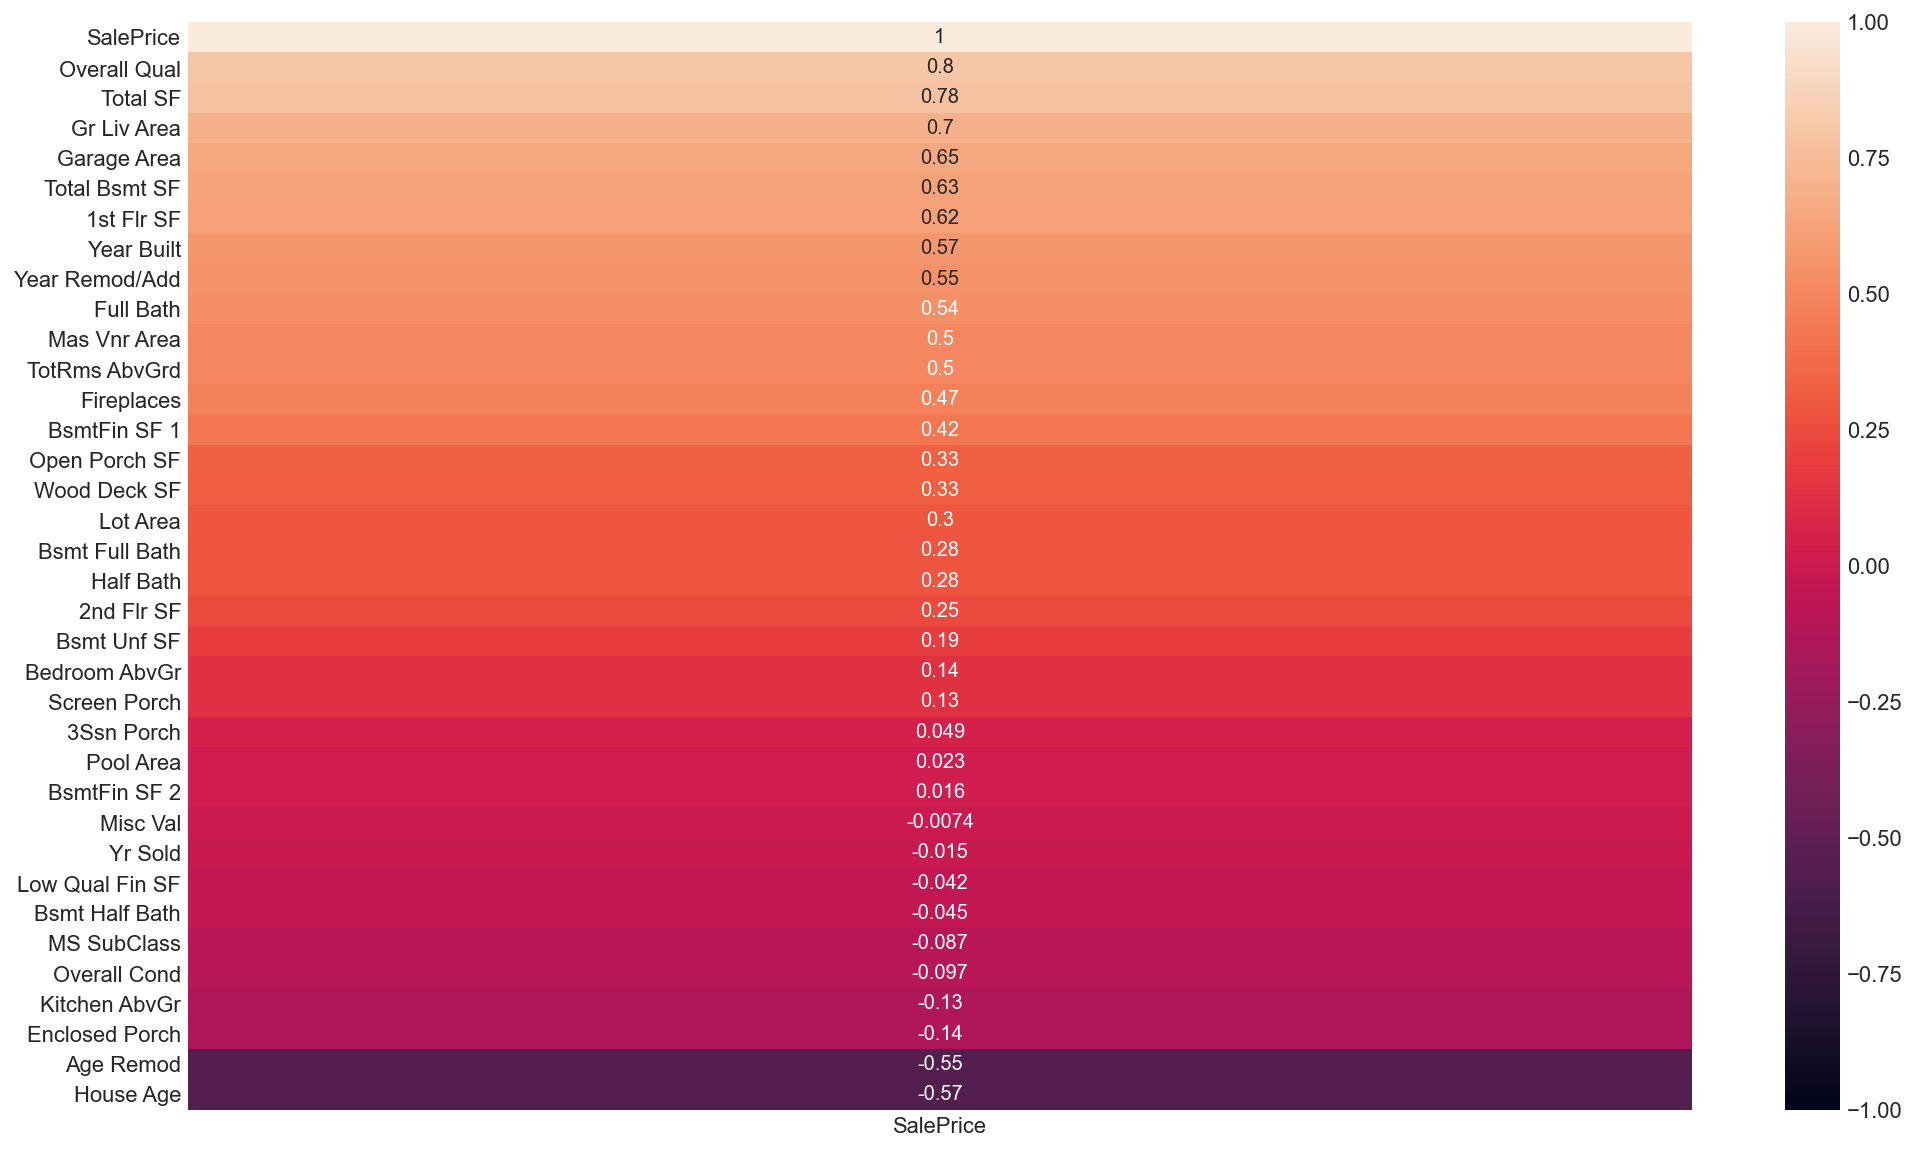

In [1974]:
#Plot the correlation of the numerical features in relation to the sale price, sorted in descending order.
plt.figure(figsize=(15, 10))

sns.heatmap(numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True,vmin=-1, vmax=1 );

# 3.3 Scatterplot with top variables 

In [1975]:
#Create a subset of the top variables with the highest correlation to plot a scatter plot
top_df = train_data[['Overall Qual', 'Total SF', 'Gr Liv Area', 'Garage Area', 'Year Built']]
top_df.head()

Overall Qual  Total SF  Gr Liv Area  Garage Area  Year Built
0             6    2204.0         1479        475.0        1976
1             7    3035.0         2122        559.0        1996
2             5    2114.0         1057        246.0        1953
3             5    1828.0         1444        400.0        2006
4             6    2121.0         1445        484.0        1900

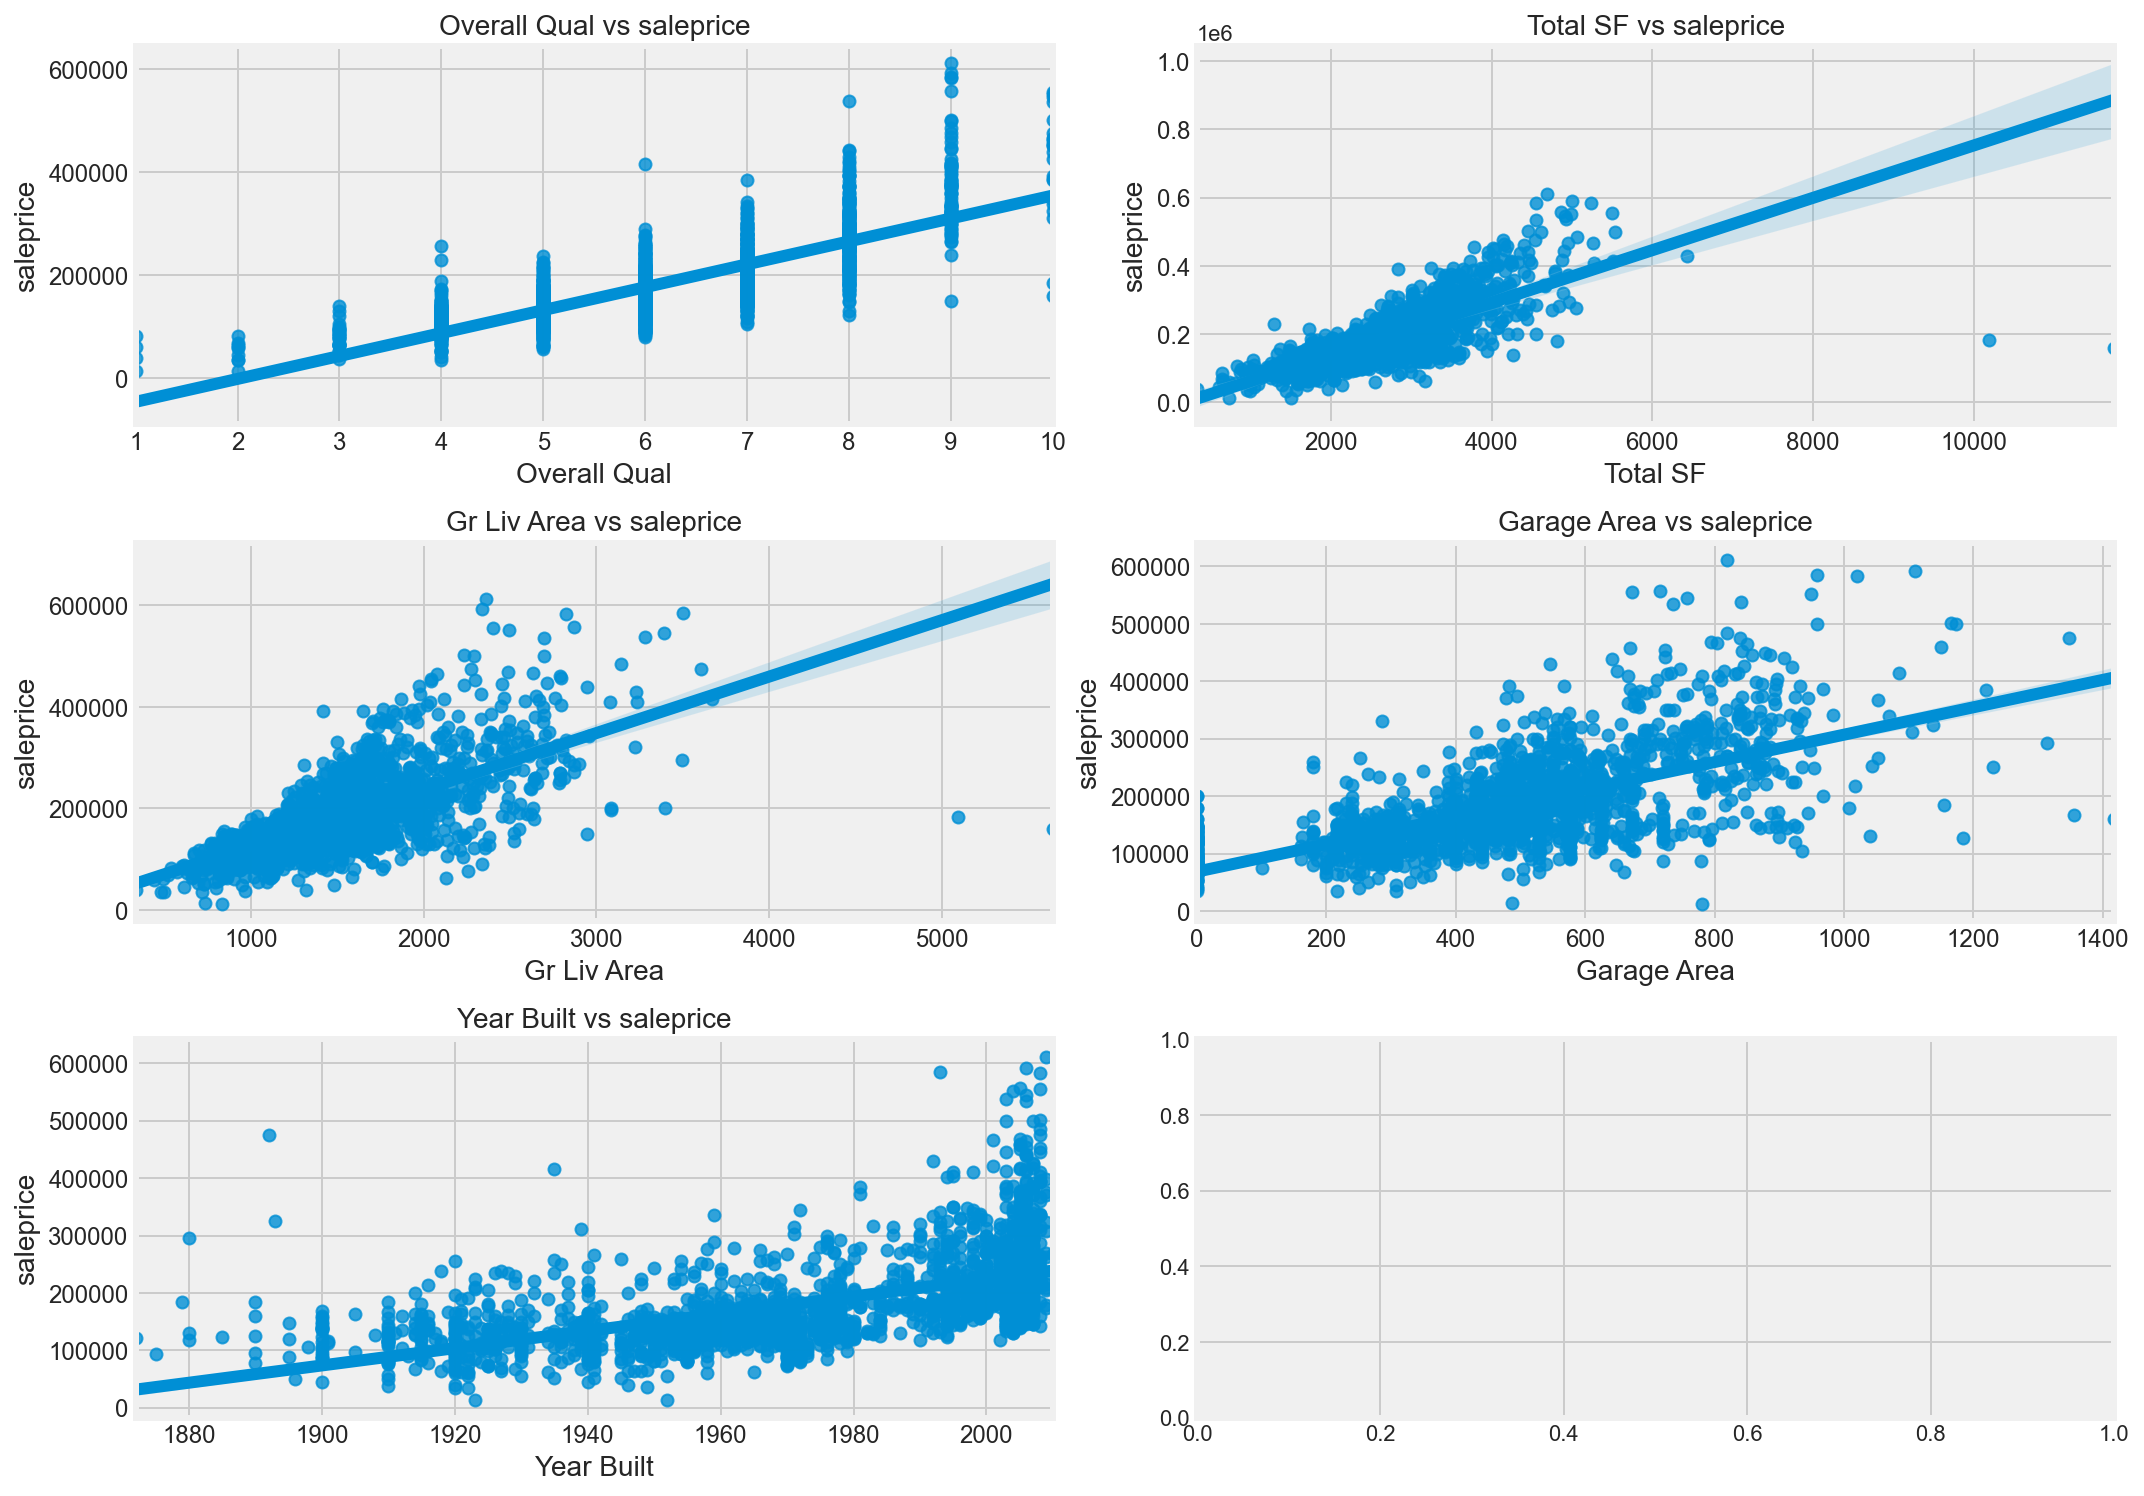

In [1976]:
#Plot a subplot of scatterplots with the top variables. 

nrows = int(np.ceil(len(top_df.columns)/2)) 
fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows*3.5)) 
ax = ax.ravel() 

for i, column in enumerate(top_df.columns):
    sns.regplot(y=train_data.SalePrice, x=train_data[column], ax = ax[i])
    ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
    ax[i].tick_params(labelsize=12)
    ax[i].set_xlabel(column, fontsize=14)
    ax[i].set_ylabel('saleprice', fontsize=14)
plt.tight_layout();


Outliers were observed for both `Gr Liv Area` and `Total SF`. The two outliers of both `Gr Liv Area` and `Total SF` has an are very far apart from the regression line. 

The two points from `Gr Liv Area` and `Total SF` will be removed from the training set so that they do not skew the predictions.

In [1977]:
top_df.describe()

Overall Qual      Total SF  Gr Liv Area  Garage Area   Year Built
count   2048.000000   2048.000000  2048.000000  2048.000000  2048.000000
mean       6.114258   2551.411621  1498.331055   473.692871  1971.751465
std        1.426126    808.977415   497.948344   215.972053    30.174112
min        1.000000    334.000000   334.000000     0.000000  1872.000000
25%        5.000000   2005.750000  1129.500000   319.000000  1954.000000
50%        6.000000   2455.000000  1444.000000   480.000000  1974.000000
75%        7.000000   2993.500000  1728.000000   576.000000  2001.000000
max       10.000000  11752.000000  5642.000000  1418.000000  2010.000000

In [1978]:
#remove rows where Gr Liv Area > 5000
#remove rows where Total SF > 10000
train_data.drop(train_data.loc[train_data['Gr Liv Area']>5000].index, inplace=True)
train_data.drop(train_data.loc[train_data['Total SF']>10000].index, inplace=True)

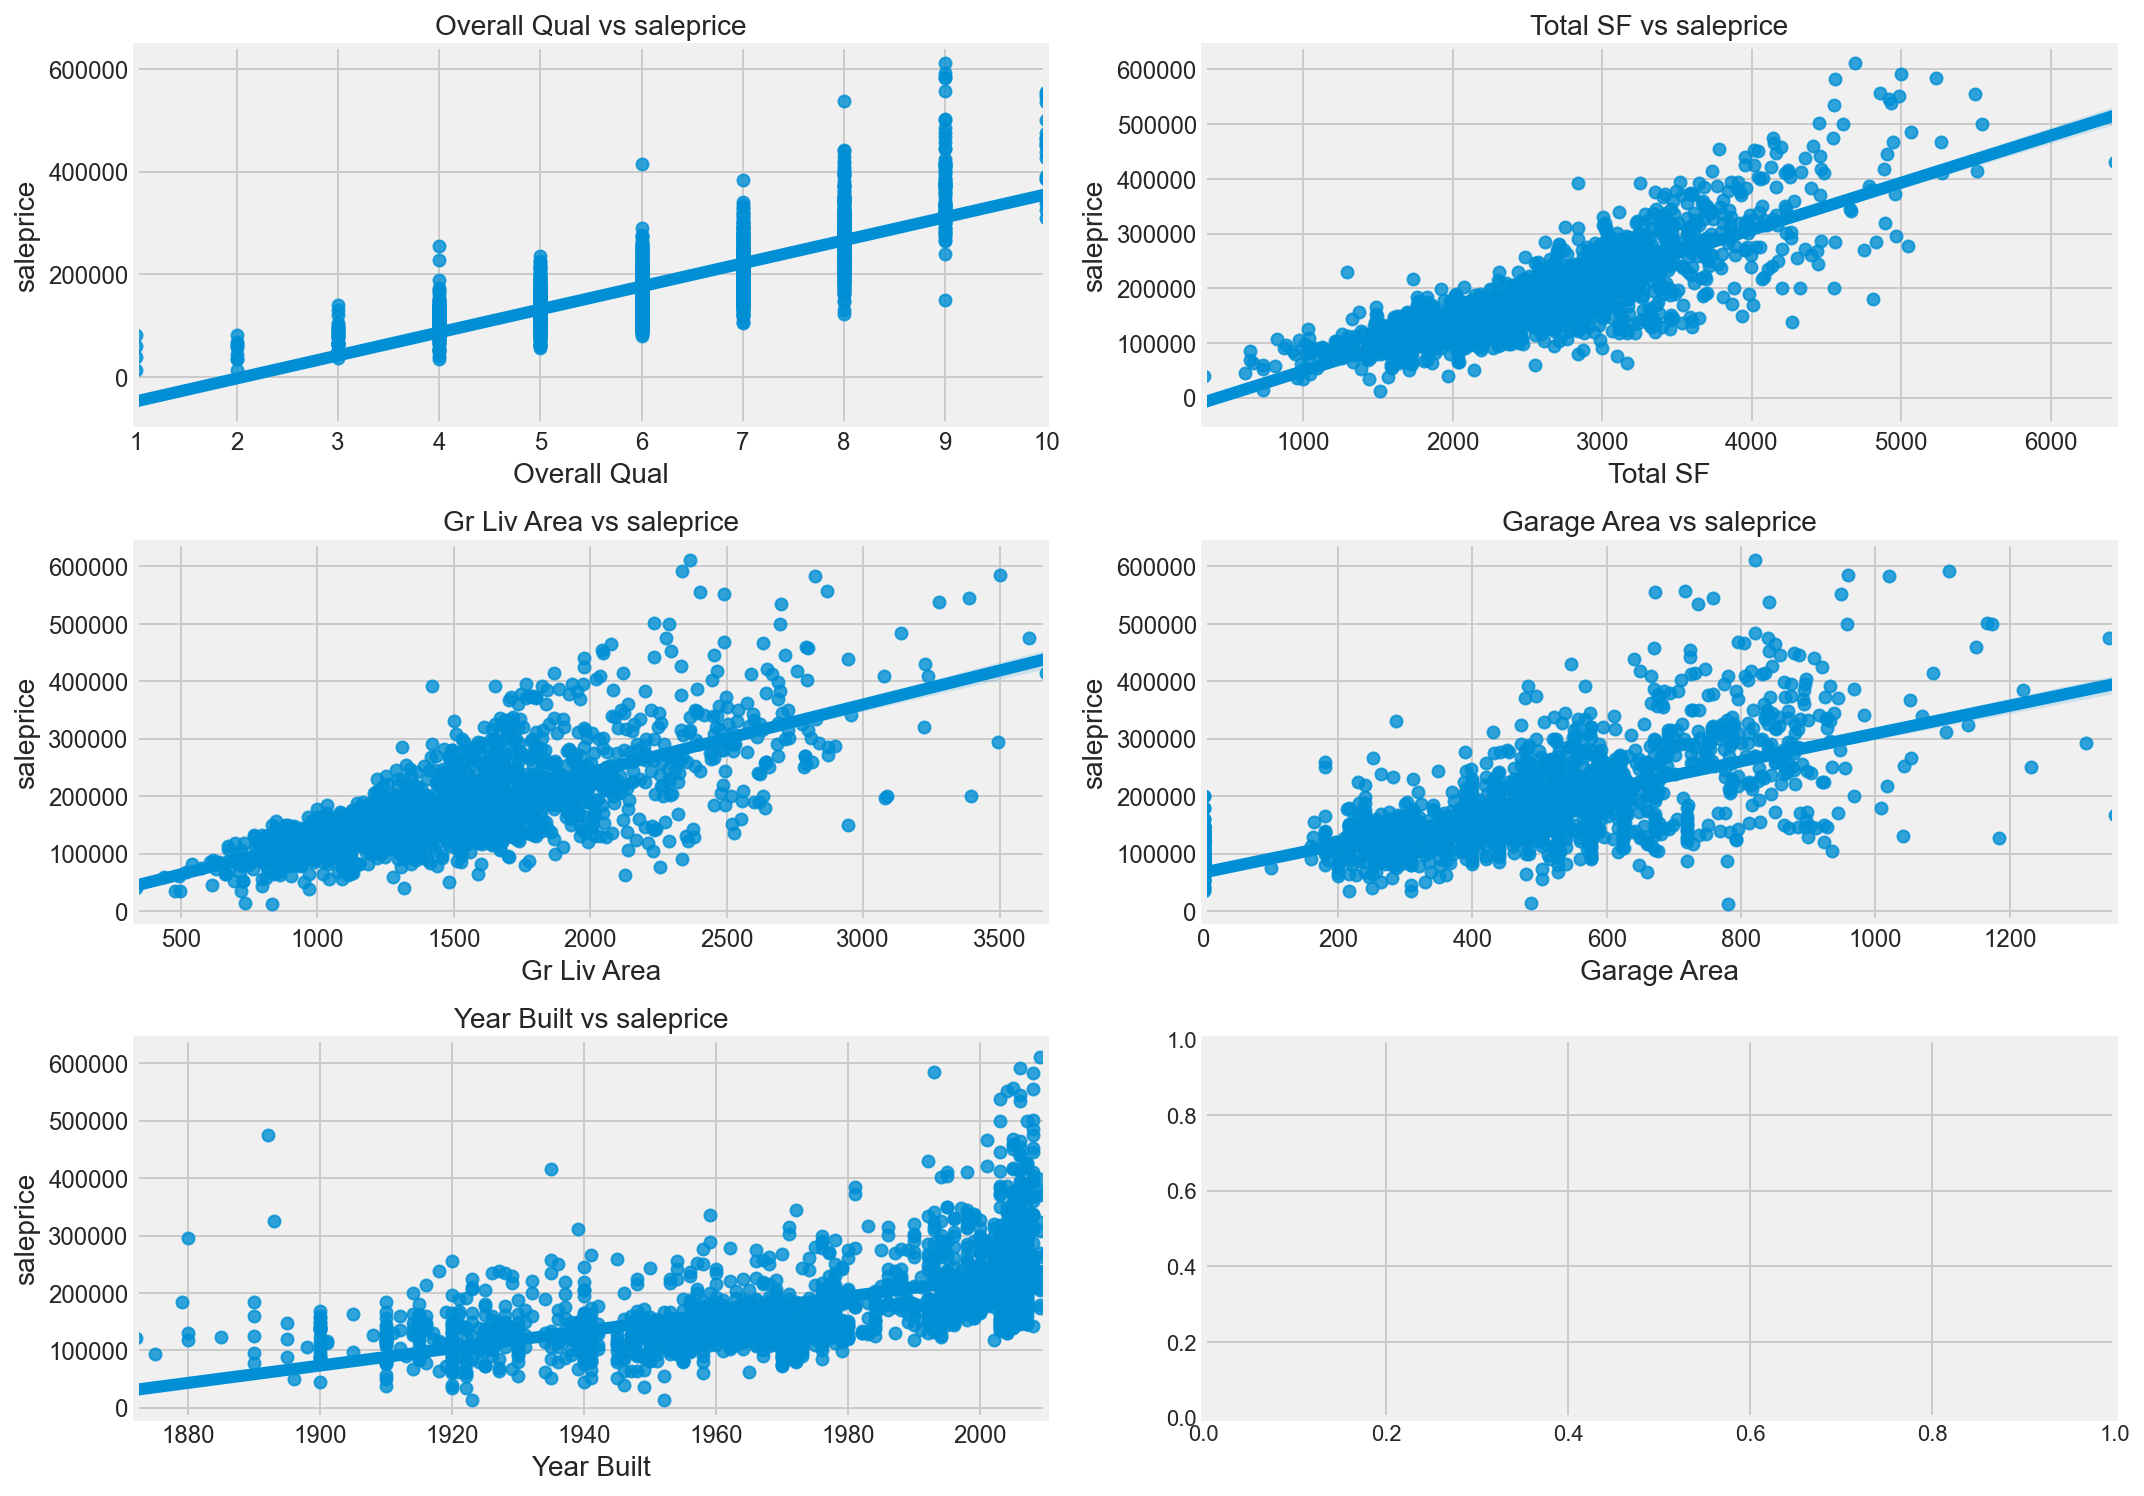

In [1979]:
#Plot scatterplots with the top variables after outliers have been removed. 

nrows = int(np.ceil(len(top_df.columns)/2)) 
fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows*3.5)) 
ax = ax.ravel() 

for i, column in enumerate(top_df.columns):
    sns.regplot(y=train_data.SalePrice, x=train_data[column], ax = ax[i])
    ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
    ax[i].tick_params(labelsize=12)
    ax[i].set_xlabel(column, fontsize=14)
    ax[i].set_ylabel('saleprice', fontsize=14)
plt.tight_layout();


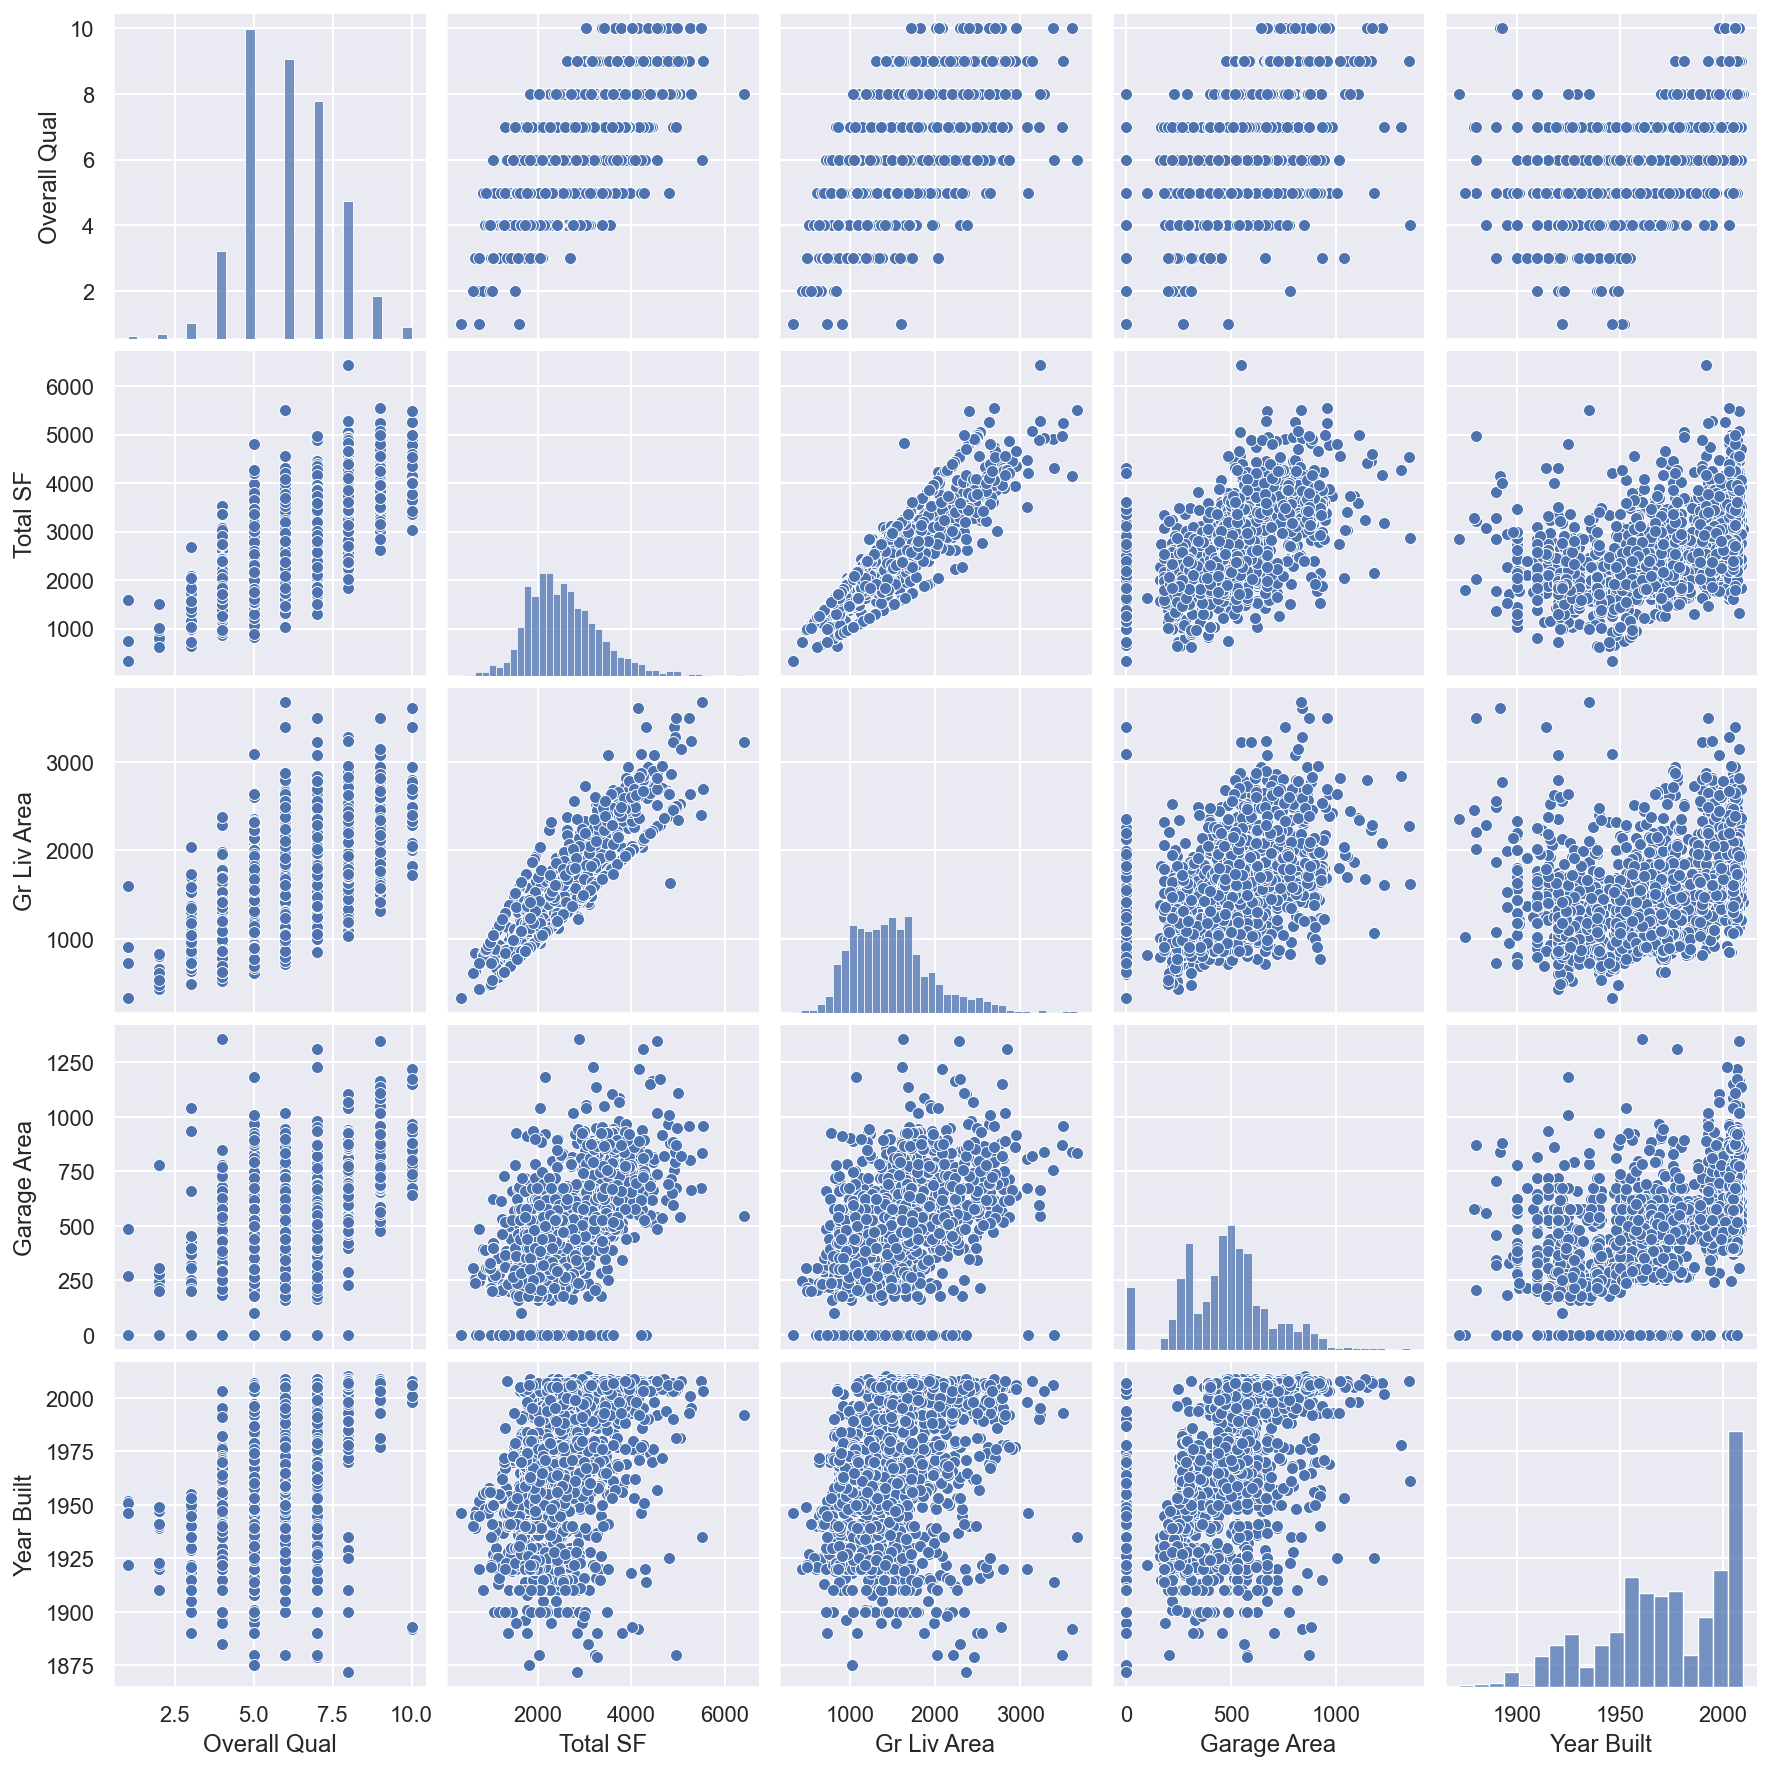

In [1980]:
#pairplot top variables with SalePrice

sns.set()
cols = ['Overall Qual' , 'Total SF', 'Gr Liv Area', 'Garage Area', 'Year Built']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

# 3.4 Analyzing the distribution of the housing sale prices

### Histogram


A histogram of the sale prices was plotted to view the distribution of sale prices. The distribution of the sale prices are skewed to the right and it is observed that the mean is generally to the right of the median. There is a long right-tail observed in sale prices 

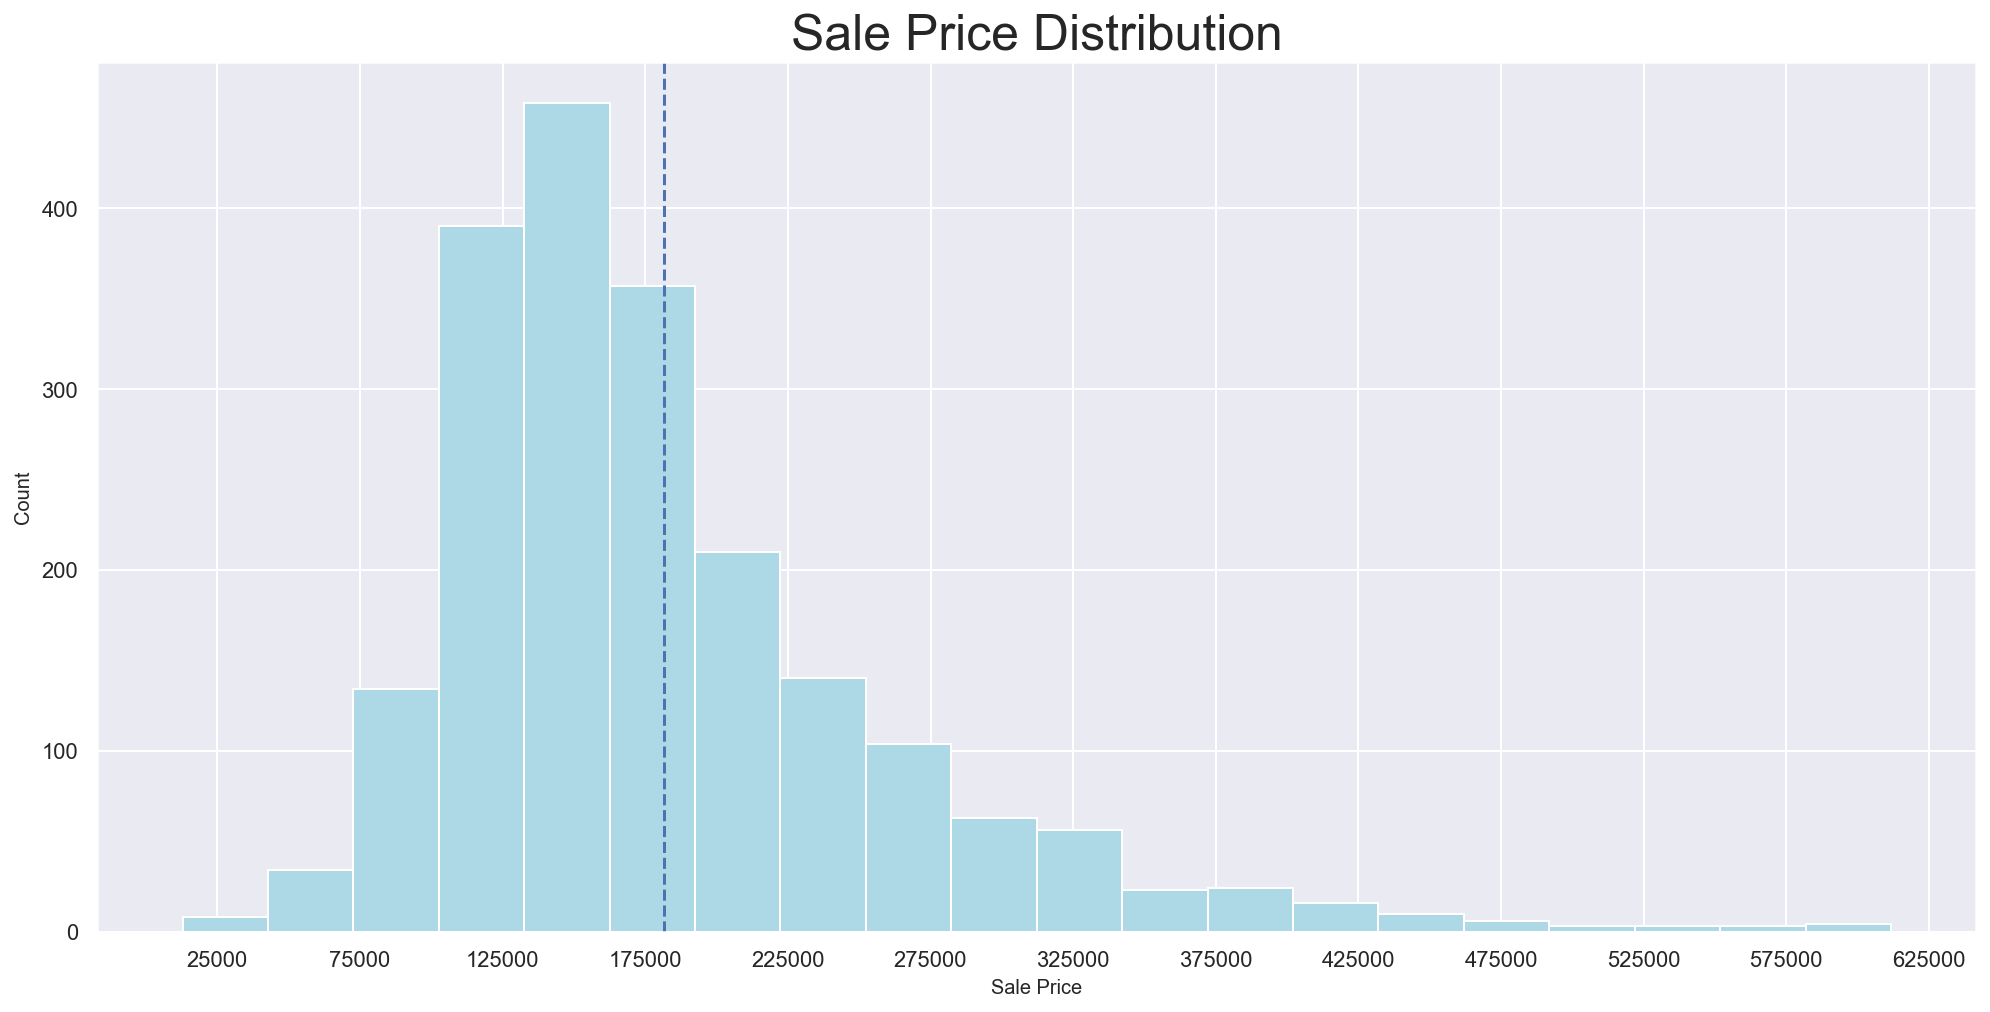

In [1981]:
#Plot distribution of Sale Price
plt.figure(figsize=(15,8))

plt.title("Sale Price Distribution", fontsize=25)

plt.xlabel("Sale Price", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.xticks(range(25000, 625001, 50000))

plt.hist(train_data['SalePrice'], bins=20, color='lightblue')
plt.axvline(np.mean(train_data['SalePrice']), linestyle='dashed');

When the SalePrice does not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data.

In [1982]:
# log SalePrice
train_data.loc[:,'SalePrice'] = np.log(train_data['SalePrice'])

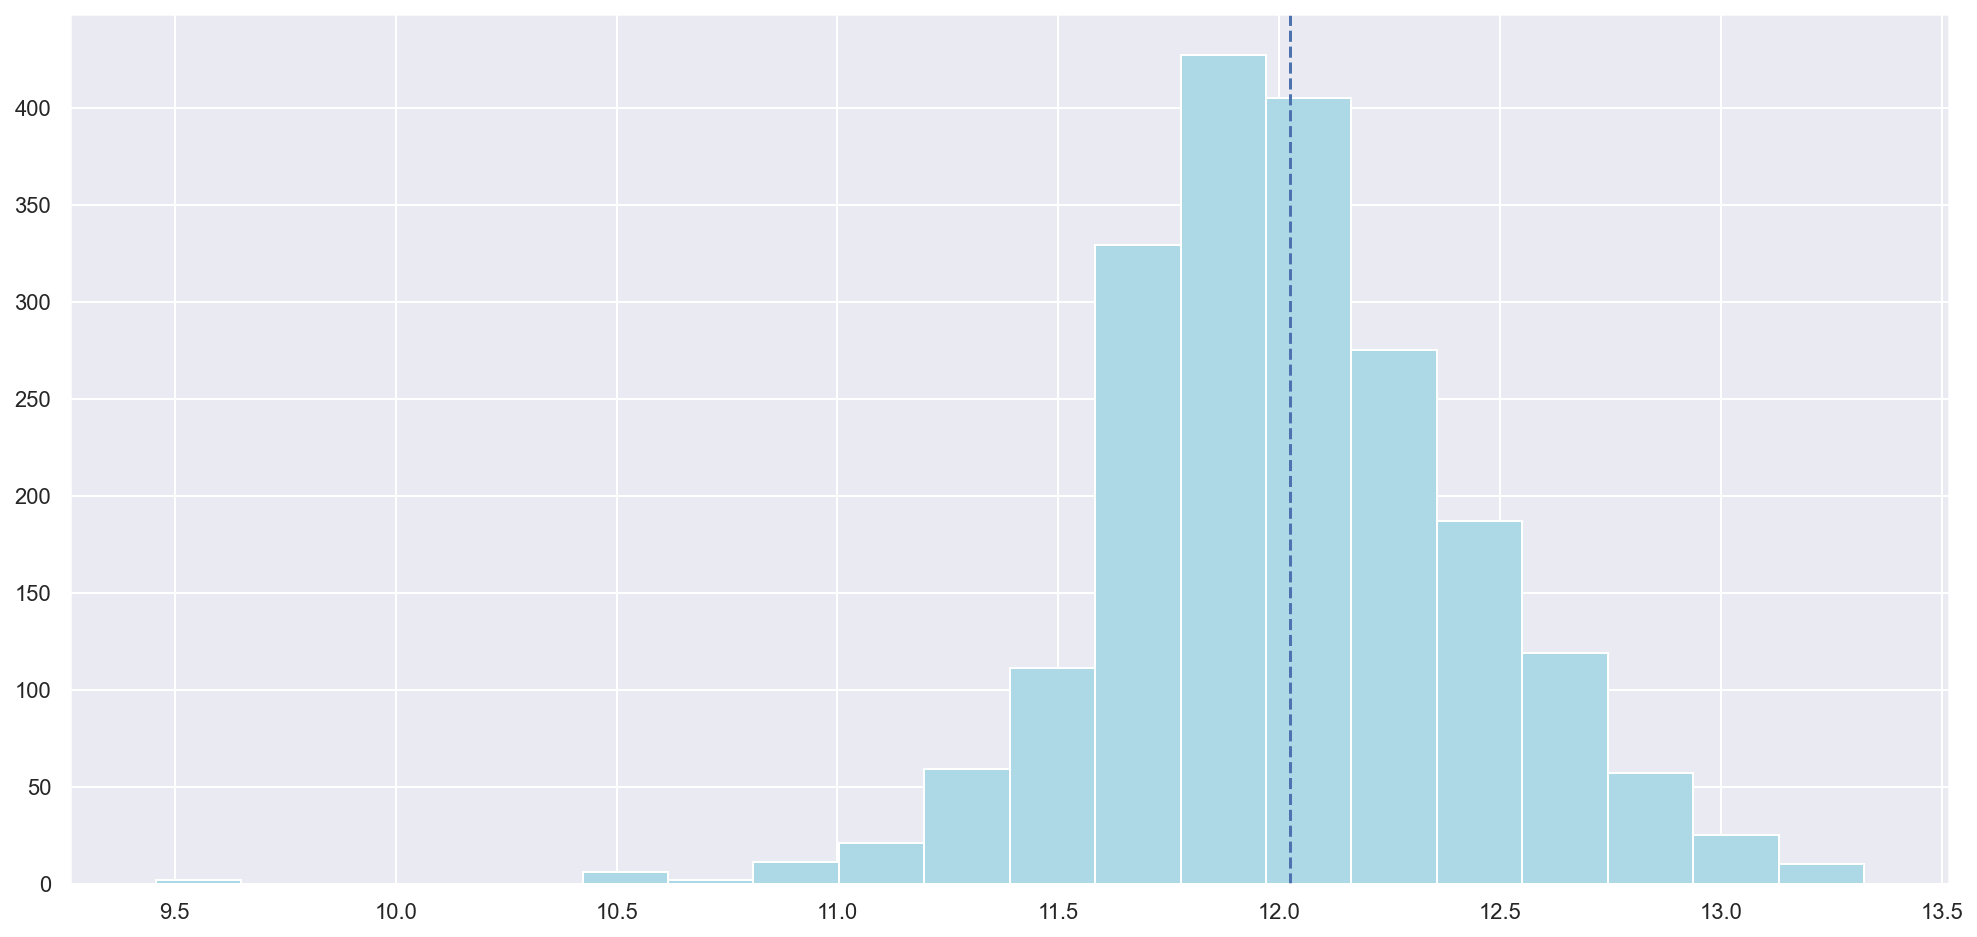

In [1983]:
#Plot the distribution of log SalePrice
plt.figure(figsize=(15,8))

plt.hist(train_data['SalePrice'], bins=20, color='lightblue')
plt.axvline(np.mean(train_data['SalePrice']), linestyle='dashed')

# 4. Data Preparation

Data will be prepared before modelling. 

In [1984]:
#Import train and test data CSV for prediction 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [1985]:
train_data.shape

(2051, 81)

In [1986]:
test_data.shape

(878, 80)

In [1987]:
test_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [1988]:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

# 4.1 Clean and transform data, feature engineering

In [1989]:
remove_row = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', \
              'Garage Cars', 'Garage Area']

drop_col = ['Lot Frontage','PID', 'Mo Sold', 'Garage Yr Blt', 'Year Remod/Add', 'Year Built', 'Garage Cars',\
           'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Sale Type']
#reasons for dropping columns 
# Year Built & 'Garage Yr Blt': New variable created - "House Age"
# Year Remod/Add: New variable created - "Age Remod"
# Garage Cars: Similar correlation to Garage Area
# Bsmt Variables: New variable created - Total SF
#Sale Type: Not a feature of the house


input_0 = ['Mas Vnr Area'] 
input_na = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', \
              'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC',\
          'Fence', 'Misc Feature']

In [1990]:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [1991]:
#Training Data cleaning 

#drop rows
train_data.dropna(subset=remove_row, inplace=True)

#Input 0 
train_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[train_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
train_data["House Age"] = train_data["Yr Sold"] - train_data["Year Built"]
train_data["Total SF"] = (train_data["Total Bsmt SF"] + train_data["1st Flr SF"] + train_data["2nd Flr SF"]) 

#Remove outliers
train_data.drop(train_data.loc[train_data['Gr Liv Area']>5000].index, inplace=True)
train_data.drop(train_data.loc[train_data['Total SF']>10000].index, inplace=True)

#drop columns 
train_data = train_data[train_data.columns[~train_data.columns.isin(drop_col)]]

In [1992]:
#Test data cleaning
#The test data will also be cleaned as well but the outliers and rows will not be removed as 
#Kaggle submission requires a certain number of rows for submission

#Input 0 
test_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[test_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
test_data["House Age"] = test_data["Yr Sold"] - test_data["Year Built"]
test_data["Total SF"] = (test_data["Total Bsmt SF"] + test_data["1st Flr SF"] + test_data["2nd Flr SF"]) 

#drop columns 
test_data = test_data[test_data.columns[~test_data.columns.isin(drop_col)]]

In [1993]:
test_data.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed

In [1994]:
print(test_data.shape, train_data.shape)

(878, 71) (2046, 72)


In [1995]:
#Saleprice is in training data, but not in the test data
[col for col in train_data.columns if col not in test_data.columns]

['SalePrice']

# 4.2  One-hot encoding

Categorical variables will be hot-encoded

In [1996]:
categorical_cols = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature']

In [1997]:
#one-hot encoding categorical features of a house 
train_dummies = pd.get_dummies(train_data, columns = categorical_cols)
test_dummies = pd.get_dummies(test_data, columns = categorical_cols)

# 4.3 Drop features with little variance 

Features with low variance will be removed for dimensionality reduction as a feature with low variance cannot explain much of the variance in SalePrice

In [1998]:
low_variance = train_dummies.var().sort_values(ascending=False)
low_variance = low_variance[low_variance.values < 0.002]

In [1999]:
low_variance.index

Index(['Roof Matl_WdShake', 'Misc Feature_Gar2', 'Heating QC_Po',
       'Condition 2_PosN', 'Misc Feature_Othr', 'Exterior 2nd_AsphShn',
       'Condition 1_RRNe', 'Exterior 1st_BrkComm', 'Roof Style_Shed',
       'Pool QC_Gd', 'Garage Qual_Ex', 'Neighborhood_Greens',
       'Condition 2_PosA', 'Bsmt Cond_Ex', 'MS Zoning_A (agr)',
       'Utilities_AllPub', 'Pool QC_Fa', 'Foundation_Wood', 'Heating_OthW',
       'Exterior 1st_Stone', 'Exterior 1st_CBlock', 'Condition 2_RRNn',
       'Exter Cond_Po', 'Garage Cond_Ex', 'Functional_Sal', 'Garage Qual_Po',
       'Neighborhood_GrnHill', 'Functional_Sev', 'Pool QC_TA',
       'Exterior 2nd_CBlock', 'Utilities_NoSeWa', 'Utilities_NoSewr',
       'Exterior 1st_ImStucc', 'Pool QC_Ex', 'Bsmt Qual_Po',
       'Neighborhood_Landmrk', 'Exterior 1st_AsphShn', 'Roof Matl_Membran',
       'MS Zoning_I (all)', 'Condition 2_RRAn', 'Condition 2_RRAe',
       'Electrical_Mix', 'Misc Feature_TenC'],
      dtype='object')

In [2000]:
#4 columns will be dropped
len(low_variance)

43

In [2001]:
#columns with low varaiance dropped
train_dummmies = train_dummies.drop(columns = low_variance.index)

In [2002]:
#Align final_train and final_test
final_train, final_test = train_dummies.align(test_dummies, join='left', axis=1)

In [2003]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 287)


In [2004]:
# drop sale price from final_test
final_test = final_test.drop(columns = 'SalePrice')

In [2005]:
# fill null dummy variables
final_test = final_test.fillna(0)

In [2006]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 286)


## Save final dataframes as CSV files 

In [2007]:
# Save final training data
final_train.to_csv('./final_dataset/final_train.csv', index=False)

# Save final test data
final_test.to_csv('./final_dataset/final_test.csv', index=False)

# 5. Modelling

In [2008]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics

sns.set_style()

pd.set_option('display.max_columns', None)

%matplotlib inline

# 5.1 Baseline Prediction 
Before working on the models, I tried using the predicions based on the average sale price of the listings in the train_data file. The average sale price is `$181493`. Using this average sale price, I submitted this prediction into Kaggle and the RMSE score it produced was `83945.99`. 

Using the Kaggle RMSE of `83945.99`, we will be able to utilise it while we are creating the regression models. The aim will be to minimize the RMSE as much as possible. The smaller the RMSE, the better our model predictions.

In [2009]:
#average sale price 
train_data['SalePrice'].mean()

181493.59677419355

# 5.2 Train Test Split Training Data

In [2010]:
X = final_train.drop(columns = 'SalePrice')
y = final_train[['SalePrice']]

print(X.shape)
print(y.shape)

# train test split
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)   

(2046, 286)
(2046, 1)
(1636, 286)
(1636, 1)
(410, 286)
(410, 1)


In [2011]:
test_df = pd.read_csv('./final_dataset/final_test.csv')

# 5.3 StandardScaler, fit, and transform

Scaling data for regularised regression

In [2012]:
ss = StandardScaler()

In [2013]:
ss.fit(X_train)

StandardScaler()

In [2014]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
X_sub = ss.transform(test_df)

In [2015]:
X_train_sc.shape

(1636, 286)

In [2016]:
X_test_sc.shape

(410, 286)

In [2017]:
X_sub.shape

(878, 286)

In [2018]:
#Instantiate
lr = LinearRegression()
ridge = Ridge()
ridgecv = RidgeCV()
lassocv = LassoCV()
en = ElasticNetCV()

# 5.4 Linear Regression 

In [2019]:
#fit
lr.fit(X_train, y_train)

LinearRegression()

In [2020]:
lr.score(X_test, y_test)

0.9181190187227168

In [2021]:
# Generate predictions
y_pred_lr_train = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lr_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lr_train))
print('\n')
# Testing on test data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lr))

Training Set
Predicted Train RMSE: 19119.711576378388
Predicted Train r2: 0.9421784977403324


Test Set
Predicted Test RMSE: 22387.652434986456
Predicted Test r2: 0.9181190187227168


In [2022]:
lr_predictions = pd.DataFrame(lr.predict(test_df))
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.9067919451399458

In [2023]:

# Generate csv
lr_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lr_predictions[0]})

lr_submission.to_csv('./final_dataset/lr_submission.csv', index=False)

The linear regression test results are performing worse than the training set.

__Kaggle RMSE Score = 26319.84916__

# 5.5 Ridge CV

In [2024]:

r_alpha = np.logspace(0,5,100)

# Instantiate model.
ridgecv = RidgeCV(alphas = r_alpha, cv= 5)

In [2025]:
#fit
ridgecv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [2026]:
# Generate predictions
y_pred_ridgecv_train = ridgecv.predict(X_train_sc)
y_pred_ridgecv = ridgecv.predict(X_test_sc)

# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_ridgecv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_ridgecv_train))
print('\n')
# Testing on test data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridgecv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_ridgecv))

Training Set
Predicted Train RMSE: 19610.955922862628
Predicted Train r2: 0.9391691023954134


Test Set
Predicted Test RMSE: 21773.302787446337
Predicted Test r2: 0.9225512253531988


In [2027]:
ridge_predictions = pd.DataFrame(ridgecv.predict(X_sub))
cross_val_score(ridgecv, X_train_sc, y_train, cv=5).mean()

0.9146078820484977

In [2028]:

# Generate csv
ridge_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': ridge_predictions[0]})

ridge_submission.to_csv('./final_dataset/ridge_submission.csv', index=False)

In [2029]:
#ridge_predictions

The  test results are performing worse than the training set.

__Kaggle RMSE Score = 26518.07449__

# 5.6 Lasso CV

In [2030]:
#Instantiate model
lassocv = LassoCV()
# Fit model using optimal alpha.
lassocv.fit(X_train_sc, y_train)


LassoCV()

In [2031]:
# Here is the optimal value of alpha which will be used in the model tuning 
lassocv.alpha_

379.2137113196995

In [2032]:
cv=RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
#r2

#abs
abs(cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean())

22369.137537163177

In [2033]:
# Generate predictions
y_pred_lassocv_train = lassocv.predict(X_train_sc)
y_pred_lassocv = lassocv.predict(X_test_sc)

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lassocv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lassocv_train))
print('\n')
# Testing on unseen data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lassocv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lassocv))

Training Set
Predicted Train RMSE: 19929.564862935375
Predicted Train r2: 0.9371764706700595


Test Set
Predicted Test RMSE: 21320.51410837086
Predicted Test r2: 0.9257389180588734


In [2034]:
lasso_predictions = pd.DataFrame(lassocv.predict(X_sub))

In [2035]:

# Generate csv
lasso_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lasso_predictions[0]})

lasso_submission.to_csv('./final_dataset/lasso_submission.csv', index=False)

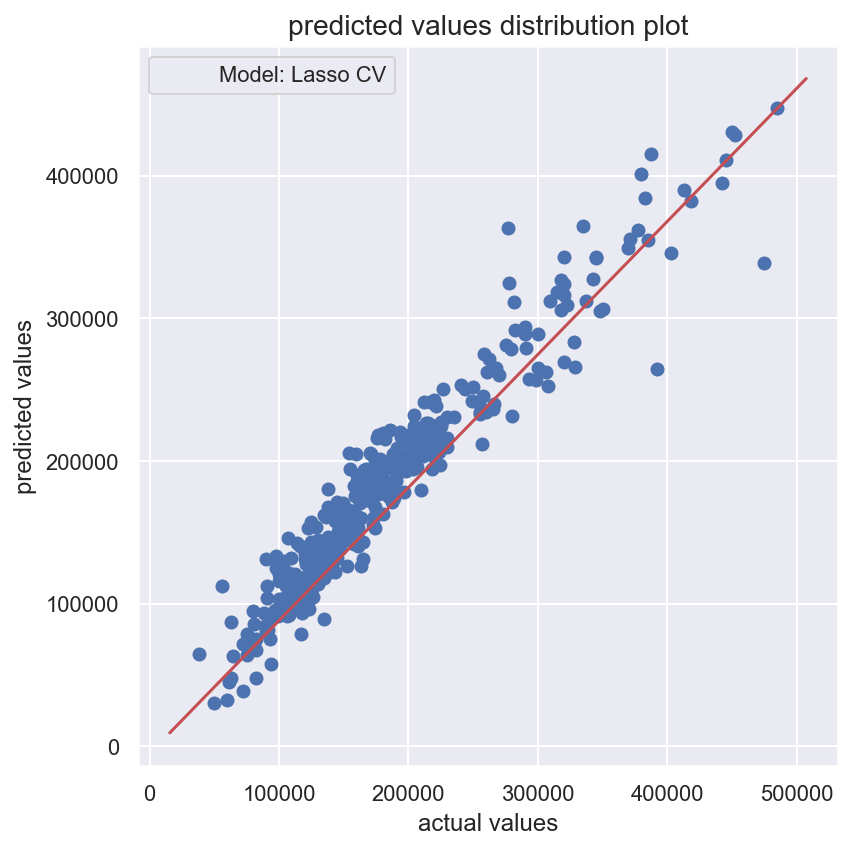

In [2036]:
# plot ypred vs ytrue
fig, ax = plt.subplots(figsize=(6.0, 6.0))
ax.scatter(y_test['SalePrice'], y_pred_lassocv)
ax.set_title('predicted values distribution plot',fontsize=14)
ax.set_xlabel('actual values',fontsize=12)
ax.set_ylabel('predicted values',fontsize=12)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c="r")
plt.plot([], [], ' ', label="Model: Lasso CV")
plt.legend()
plt.tight_layout()

__Kaggle RMSE score : 25538.77144__



# 5.7 Elastic Net

In [2037]:
#instantiate model
en.fit(X_train_sc, y_train)

ElasticNetCV()

In [2038]:
# Generate predictions
y_pred_en_train = en.predict(X_train_sc)
y_pred_en = en.predict(X_test_sc)

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_en_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_en_train))
print('\n')
# Testing on unseen data|
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_en)))
print('Predicted Test r2:', r2_score(y_test, y_pred_en))

Training Set
Predicted Train RMSE: 67466.59700829863
Predicted Train r2: 0.2800467313534941


Test Set
Predicted Test RMSE: 66495.1406388333
Predicted Test r2: 0.27765321425528044


In [2039]:
en_predictions = pd.DataFrame(en.predict(X_sub))
cross_val_score(en, X_train_sc, y_train, cv=5).mean()

0.2741459351907925

In [2040]:
# Generate csv
en_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': en_predictions[0]})

en_submission.to_csv('./final_dataset/en_submission.csv', index=False)

__Kaggle RMSE Score: 72604.75605__

## Overall Conclusion for initial modelling 

The Lasso Regression Model was the best model to test my training data because it was able to manage well unknown data according to the 𝑅2 score. The scatter plot of the predicted saleprice and actual sale price has a generally strong linear relationship except for two outliers.

# 6. Improving Model

## 6.1 Improving the model by tuning the hyperparameters

In [2041]:
#Changing the alpha and max_iter
#Instantiate model
lassocv = LassoCV(n_alphas = 369, max_iter=70)
lassocv.fit(X_train_sc, y_train)

LassoCV(max_iter=70, n_alphas=369)

In [2042]:
#optimal alpha
lassocv.alpha_

372.65613404868975

In [2043]:
# Generate predictions
y_pred_lassocv_train = lassocv.predict(X_train_sc)
y_pred_lassocv = lassocv.predict(X_test_sc)

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lassocv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lassocv_train))
print('\n')
# Testing on unseen data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lassocv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lassocv))

Training Set
Predicted Train RMSE: 19905.000554224174
Predicted Train r2: 0.9373312422898937


Test Set
Predicted Test RMSE: 21317.637831096472
Predicted Test r2: 0.9257589533219593


In [2044]:
cv=RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
#r2

#abs
abs(cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean())

22369.093285156716

In [2045]:
lasso_predictions = pd.DataFrame(lassocv.predict(X_sub))

In [2046]:
# Generate csv
lasso_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lasso_predictions[0]})

lasso_submission.to_csv('./final_dataset/lasso_pt1_submission.csv', index=False)

__Kaggle RMSE score : 25421.58717__

## Improving model through feature selection 
Relooking the Lasso model to view the most important features 

In [2047]:
#coefficients of features in the lasso model
coef= sorted(abs(lassocv.coef_), reverse = True)

Text(0.5, 1.0, 'Top 25 Housing Features')

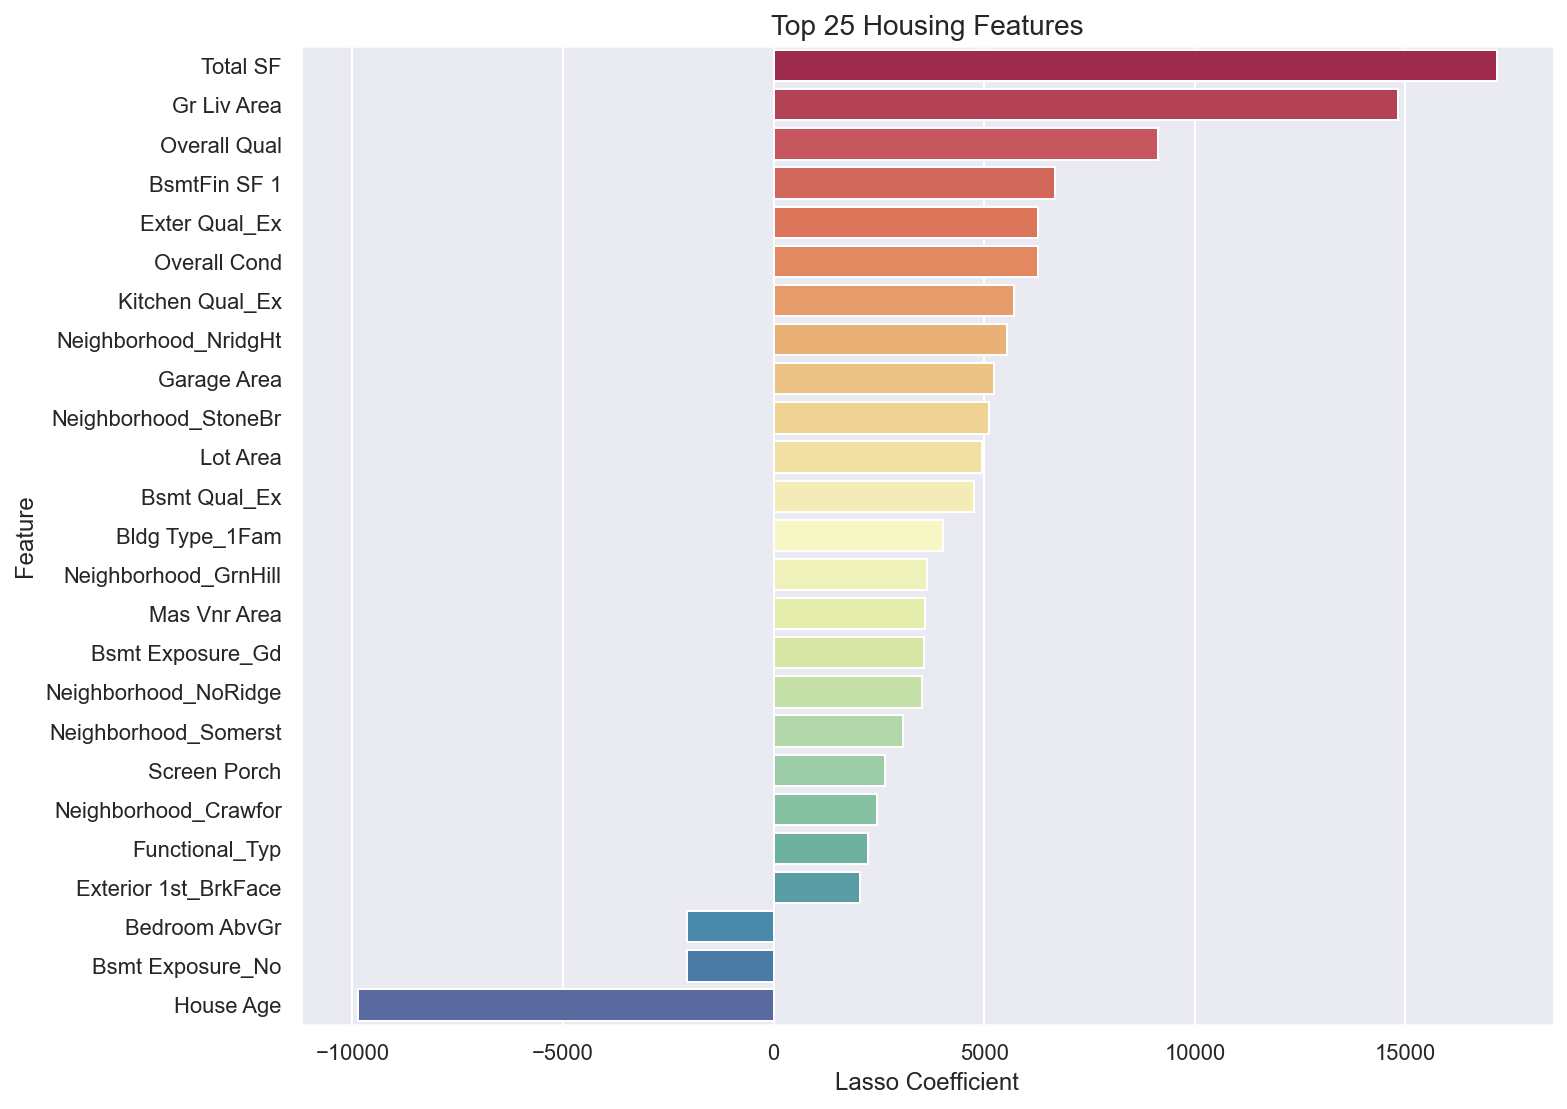

In [2048]:
# Create dataframe of features, coefficients and absolute coefficients
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lassocv.coef_)
lasso_df['Coef'] = lassocv.coef_
lasso_df['Feature'] = X.columns

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(10,9))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(25)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_yticklabels(data['Feature'])
ax.set_xlabel('Lasso Coefficient')
plt.title('Top 25 Housing Features', fontsize=14)


In [2049]:
top_25 = ["Total SF", "Gr Liv Area", "Overall Qual", "BsmtFin SF 1", "Overall Cond", "Exter Qual_Ex",\
          "Neighborhood_NridgHt", "Kitchen Qual_Ex", "Neighborhood_StoneBr", "Lot Area", "Garage Area",\
          "Bldg Type_1Fam", "Bsmt Qual_Ex", "Neighborhood_GrnHill", "Mas Vnr Area", "Neighborhood_Somerst",\
         "Bsmt Exposure_Gd", "Bsmt Exposure_No" ,"Neighborhood_NoRidge", "Screen Porch", "Neighborhood_Crawfor", \
          "Exterior 1st_BrkFace","Functional_Typ", "Bedroom AbvGr", "House Age"]


### After viewing the top 25 features, I will try to recreate a model with just the top 25 features highlighted. Afterwhich, I will  rerun the model for the RMSE score on Kaggle. 

I will be going through the entire process again before running the data. 

1) loading data 

2) data cleaning 

3) one - hot encoding 

4) removing features with low variance 

5) train test split 

6) feature scaling 

7) lasso cv modelling 

In [2050]:
#Import train and test data CSV for prediction 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")                                                      

In [2051]:
train_data.shape

(2051, 81)

In [2052]:
test_data.shape

(878, 80)

In [2053]:
#Training Data cleaning 

#drop rows
train_data.dropna(subset=remove_row, inplace=True)

#Input 0 
train_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[train_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
train_data["House Age"] = train_data["Yr Sold"] - train_data["Year Built"]
train_data["Total SF"] = (train_data["Total Bsmt SF"] + train_data["1st Flr SF"] + train_data["2nd Flr SF"]) 

#Remove outliers
train_data.drop(train_data.loc[train_data['Gr Liv Area']>5000].index, inplace=True)
train_data.drop(train_data.loc[train_data['Total SF']>10000].index, inplace=True)

#drop columns 
train_data = train_data[train_data.columns[~train_data.columns.isin(drop_col)]]

In [2054]:
#Test data cleaning
#The test data will also be cleaned as well but the outliers and rows will not be removed as 
#Kaggle submission requires a certain number of rows for submission

#Input 0 
test_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[test_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
test_data["House Age"] = test_data["Yr Sold"] - test_data["Year Built"]
test_data["Total SF"] = (test_data["Total Bsmt SF"] + test_data["1st Flr SF"] + test_data["2nd Flr SF"]) 

#drop columns 
test_data = test_data[test_data.columns[~test_data.columns.isin(drop_col)]]

In [2055]:
print(test_data.shape, train_data.shape)

(878, 71) (2046, 72)


In [2056]:
categorical_cols = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature']

In [2057]:
#one-hot encoding 
train_dummies = pd.get_dummies(train_data, columns = categorical_cols)
test_dummies = pd.get_dummies(test_data, columns = categorical_cols)

In [2058]:
#removing features with low variance 
low_variance = train_dummies.var().sort_values(ascending=False)
low_variance = low_variance[low_variance.values < 0.002]

In [2059]:
low_variance.index

Index(['Roof Matl_WdShake', 'Misc Feature_Gar2', 'Heating QC_Po',
       'Condition 2_PosN', 'Misc Feature_Othr', 'Exterior 2nd_AsphShn',
       'Condition 1_RRNe', 'Exterior 1st_BrkComm', 'Roof Style_Shed',
       'Pool QC_Gd', 'Garage Qual_Ex', 'Neighborhood_Greens',
       'Condition 2_PosA', 'Bsmt Cond_Ex', 'MS Zoning_A (agr)',
       'Utilities_AllPub', 'Pool QC_Fa', 'Foundation_Wood', 'Heating_OthW',
       'Exterior 1st_Stone', 'Exterior 1st_CBlock', 'Condition 2_RRNn',
       'Exter Cond_Po', 'Garage Cond_Ex', 'Functional_Sal', 'Garage Qual_Po',
       'Neighborhood_GrnHill', 'Functional_Sev', 'Pool QC_TA',
       'Exterior 2nd_CBlock', 'Utilities_NoSeWa', 'Utilities_NoSewr',
       'Exterior 1st_ImStucc', 'Pool QC_Ex', 'Bsmt Qual_Po',
       'Neighborhood_Landmrk', 'Exterior 1st_AsphShn', 'Roof Matl_Membran',
       'MS Zoning_I (all)', 'Condition 2_RRAn', 'Condition 2_RRAe',
       'Electrical_Mix', 'Misc Feature_TenC'],
      dtype='object')

In [2060]:
#43 columns will be dropped
len(low_variance)

43

In [2061]:
#columns with low varaiance dropped
train_dummmies = train_dummies.drop(columns = low_variance.index)

In [2062]:
#Align final_train and final_test
final_train, final_test = train_dummies.align(test_dummies, join='left', axis=1)

In [2063]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 287)


In [2064]:
# drop sale price from final_test
final_test = final_test.drop(columns = 'SalePrice')

In [2065]:
# fill null dummy variables
final_test = final_test.fillna(0)


In [2066]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 286)


In [2067]:
#train dataset includes saleprice

top_25_train = ["Total SF", "Gr Liv Area", "Overall Qual", "BsmtFin SF 1", "Overall Cond", "Exter Qual_Ex",\
          "Neighborhood_NridgHt", "Kitchen Qual_Ex", "Neighborhood_StoneBr", "Lot Area", "Garage Area",\
          "Bldg Type_1Fam", "Bsmt Qual_Ex", "Neighborhood_GrnHill", "Mas Vnr Area", "Neighborhood_Somerst",\
         "Bsmt Exposure_Gd", "Bsmt Exposure_No" ,"Neighborhood_NoRidge", "Screen Porch", "Neighborhood_Crawfor", \
          "Exterior 1st_BrkFace","Functional_Typ", "Bedroom AbvGr", "House Age", "SalePrice"]

top_25_test = ["Total SF", "Gr Liv Area", "Overall Qual", "BsmtFin SF 1", "Overall Cond", "Exter Qual_Ex",\
          "Neighborhood_NridgHt", "Kitchen Qual_Ex", "Neighborhood_StoneBr", "Lot Area", "Garage Area",\
          "Bldg Type_1Fam", "Bsmt Qual_Ex", "Neighborhood_GrnHill", "Mas Vnr Area", "Neighborhood_Somerst",\
         "Bsmt Exposure_Gd", "Bsmt Exposure_No" ,"Neighborhood_NoRidge", "Screen Porch", "Neighborhood_Crawfor", \
          "Exterior 1st_BrkFace","Functional_Typ", "Bedroom AbvGr", "House Age"]


In [2068]:
final_train = final_train[top_25_train]

In [2069]:
final_test = final_test[top_25_test]

In [2070]:
print(final_train.shape, final_test.shape)

(2046, 26) (878, 25)


In [2071]:
#train-test-split, test size(0.2)
X = final_train.drop(columns = 'SalePrice')
y = final_train[['SalePrice']]

print(X.shape)
print(y.shape)

# train test split
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)   

(2046, 25)
(2046, 1)
(1636, 25)
(1636, 1)
(410, 25)
(410, 1)


In [2072]:
test_df=final_test.copy()
test_df.shape

(878, 25)

In [2073]:
#Create the standardization scaling object
ss = StandardScaler()

#Fit the standardization parameters and scale the data.
ss.fit(X_train)

StandardScaler()

In [2074]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
X_sub = ss.transform(test_df)

In [2075]:
print(X_train_sc.shape, X_test_sc.shape, X_sub.shape)

(1636, 25) (410, 25) (878, 25)


In [2076]:
# Lasso CV 
lassocv = LassoCV(n_alphas = 66, max_iter = 100)
# Fit model using optimal alpha.
lassocv.fit(X_train_sc, y_train)

LassoCV(max_iter=100, n_alphas=66)

In [2077]:
#optimasl alpha
lassocv.alpha_

66.26867302034901

In [2078]:
# Generate predictions
y_pred_lassocv_train = lassocv.predict(X_train_sc)
y_pred_lassocv = lassocv.predict(X_test_sc)


In [2079]:

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lassocv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lassocv_train))
print('\n')
# Testing on unseen data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lassocv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lassocv))

Training Set
Predicted Train RMSE: 22210.907525198454
Predicted Train r2: 0.9219704134831815


Test Set
Predicted Test RMSE: 21554.335734756456
Predicted Test r2: 0.9241011469114538


In [2080]:
cv=RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
#r2

#abs
abs(cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean())

22738.657924812112

In [2081]:
lasso_predictions = pd.DataFrame(lassocv.predict(X_sub))


# Generate csv
lasso_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lasso_predictions[0]})

lasso_submission.to_csv('./final_dataset/lasso_submission_imprved.csv', index=False)



__Kaggle RMSE score : 25861.19202__


# 6 Conclusions and Recommendations

### Four different models were tested on training data:

1) linear regression

2) Ridge CV

3) lasso CV

4) elastic net regression


Looking at the Kaggle score of the different models, we can see that the RMSE score is lowest for Lasso. The lowest score was produced by playing around with the max_iter and alpha. By setting the alpha to 200 and the max_iter to 30000, I was able to come up with the lowest Kaggle RMSE score. 

Improvements were made to improve the model in two areas. 

1) Hyperparameter tuning  

Improved the model by selecting the best configurations of the hyperparameters that give us the best model performance output. 

2) Feature Selection 

After determining the important features in the LassoCV model, I decided to run another model with just the important features identified in the initial model, discarding the other features to see if there was an improvement in the results. 


After rerunning the model, it was noticed that the LassoCV results improved after hyperparameter tuning with a R2 of 0.93.This model will be used to predict the housing prices in Ames based on the characteristics of the house. This model will support out in-house real estate agents support the clients (buyers & sellers) by looking at the key factors affecting housing prices in areas of Area, Condition/Quality, Building Type, External Feature and Location. With better pricing estimates, the real estate agents can advice buys on the estimate selling price and how they are able to improve their property features to push for a higher selling price. Furthermore for buyers, real estate agents will be able to work with buyers in determining the fair value of a house price in relation to the features of the house. 

###  Recommendations

More time will be required to drop more features to improve the model, testing across other machine learning models before the solution will be able to be released for implementation to help the real estate agents in predicting the Sale Prices depending on the features of the house. If the model is continually worked on, collecting more data from different cities within the USA with a longer time frame, this dataset will serve more purpose beyond Iowa, benefitting more individuals and also showing more valuable trends between housing prices in different cities. Furthermore, there are also some limitations with the model as the model currently only considers the features of the property only, it does not take into account other factors including econommic indicators, government policies, mortgage and interest rates. 



